In [1]:
# ignoring some warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df = pd.read_csv('Patients_Dataset.csv')
df.head()

id           name  gender   age  weight_kg  height_cm  \
0  62632   Samual Sipes    male  29.0      168.0      186.0   
1  63150      Beau Dach    male  19.0       90.0      200.0   
2  71366  Youlanda Metz  female  20.0       75.0      174.0   
3  63734  Deandre Walsh    male  43.0      102.0      181.0   
4  65619  Rhett Douglas    male  20.0       91.0      170.0   

                 education        marital  income insurance  ... insulin  \
0              preparatory  never married     5.0        no  ...  106.48   
1                      NaN            NaN    15.0       yes  ...     NaN   
2    college or equivalent  never married     3.0       yes  ...     NaN   
3    college or equivalent       divorced     2.0        no  ...     NaN   
4  secondary or equivalent  never married     8.0        no  ...     NaN   

    iron  u_acid  s_cotinine    cpk    ldh     fvc    fev1 fev1_fvc_ratio  \
0   63.0     7.2     159.000  251.0  170.0  5426.0  4434.0       0.817177   
1   83.0     7.3      14.700   99.0  102.0  7175.0  5786.0       0.806411   
2  118.0     4.1       0.011  211.0  142.0  5120.0  4570.0       0.892578   
3   55.0     4.7       0.766  312.0  109.0     NaN     NaN            NaN   
4   62.0     5.7       0.376  163.0  123.0  3870.0  3297.0       0.851938   

  memory  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

[5 rows x 66 columns]

In [4]:
df.drop(['name'], axis=True, inplace=True)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'weight_kg', 'height_cm', 'education', 'marital',
       'income', 'insurance', 'gen_health', 'smoker', 'days_active', 'bmi',
       'waist_cm', 'drinks_day', 'asthma', 'chf', 'cad', 'mi', 'cva', 'copd',
       'cancer', 'hypertension', 'diabetes', 'pulse', 'sys_bp', 'dia_bp',
       'medicines', 'wbc', 'hgb', 'hct', 'platelets', 'alt', 'ast', 'alk_phos',
       'bun', 'cr', 'sodium', 'potassium', 'chloride', 'bicarb', 'ca', 'phos',
       't_bilirubin', 'alb', 't_protein', 'glob', 'glucose', 'glucose.1',
       'alb_cr_ratio', 'trigs', 't_chol', 'hdl', 'ldl_chol', 'a1c', 'insulin',
       'iron', 'u_acid', 's_cotinine', 'cpk', 'ldh', 'fvc', 'fev1',
       'fev1_fvc_ratio', 'memory'],
      dtype='object')

In [6]:
cols = ['id', 'gender', 'age', 'weight_kg', 'height_cm', 'education', 'marital',
       'income', 'insurance', 'gen_health', 'smoker', 'days_active', 'bmi',
       'waist_cm', 'drinks_day']
df = df[cols]

In [7]:
df.head()

id  gender   age  weight_kg  height_cm                education  \
0  62632    male  29.0      168.0      186.0              preparatory   
1  63150    male  19.0       90.0      200.0                      NaN   
2  71366  female  20.0       75.0      174.0    college or equivalent   
3  63734    male  43.0      102.0      181.0    college or equivalent   
4  65619    male  20.0       91.0      170.0  secondary or equivalent   

         marital  income insurance gen_health smoker  days_active   bmi  \
0  never married     5.0        no  excellent    yes          NaN  48.3   
1            NaN    15.0       yes  excellent    NaN          NaN  22.5   
2  never married     3.0       yes  very good     no          NaN  24.8   
3       divorced     2.0        no       fair     no          NaN  31.1   
4  never married     8.0        no       good     no          NaN  31.5   

   waist_cm  drinks_day  
0     155.0        82.0  
1      84.0        64.0  
2      79.0        30.0  
3     114.0        30.0  
4     103.0        24.0

In [12]:
df.shape

(7821, 15)

# Data wrangling

## 1- replacing null cells in categorical features with unknown:

In [8]:
#gender
df['gender'][df.gender.isna()] = 'unknown'

#education
df['education'][df.education.isna()] = 'unknown'

#marital
df['marital'][df.marital.isna()] = 'unknown'

# income
df['income'][df.income.isna()] = 'unknown'
df['income'][df.income == 1] = '$0 to $4,999'
df['income'][df.income == 2] = '$5k to $9,999'
df['income'][df.income == 3] = '$10k to $14,999'
df['income'][df.income == 4] = '$15k to $19,999'
df['income'][df.income == 5] = '$20k to $24,999'
df['income'][df.income == 6] = '$25k to $34,999'
df['income'][df.income == 7] = '$35k to $44,999'
df['income'][df.income == 8] = '$45k to $54,999'
df['income'][df.income == 9] = '$55k to $64,999'
df['income'][df.income == 10] = '$65k to $74,999'
df['income'][df.income == 14] = '$75k to $99,999'
df['income'][df.income == 15] = '$100k and Over'

#insurance
df['insurance'][df.insurance.isna()] = 'unknown'

#gen_health
df['gen_health'][df.gen_health.isna()] = 'unknown'

#smoker
df['smoker'][df.smoker.isna()] = 'unknown'

#days_active
df['days_active'][df.days_active == 0.0] = '0'
df['days_active'][df.days_active == 1.0] = '1'
df['days_active'][df.days_active == 2.0] = '2'
df['days_active'][df.days_active == 3.0] = '3'
df['days_active'][df.days_active == 4.0] = '4'
df['days_active'][df.days_active == 5.0] = '5'
df['days_active'][df.days_active == 6.0] = '6'
df['days_active'][df.days_active == 7.0] = '7'
df['days_active'][df.days_active.isna()] = 'unknown'

## 2- Changing categorical ordinal data to type categoricalDtype:

In [9]:
#gender
Gend_levels = ['female', 'male', 'unknown']
gend_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Gend_levels)
df.gender = df.gender.astype(gend_levels)

#education
Edu_levels = ['postgraduate education', 'college or equivalent', 'secondary or equivalent',
             'preparatory', 'less than preparatory', 'unknown']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Edu_levels)
df.education = df.education.astype(edu_levels)

#marital
Mari_levels = ['married', 'widowed', 'divorced', 'separated', 'never married', 'unknown']
mari_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Mari_levels)
df.marital = df.marital.astype(mari_levels)

#income
Incm_levels = ['unknown', '$0 to $4,999', '$5k to $9,999', '$10k to $14,999', '$15k to $19,999', 
               '$20k to $24,999','$25k to $34,999', '$35k to $44,999', '$45k to $54,999', 
               '$55k to $64,999', '$65k to $74,999', '$75k to $99,999', '$100k and Over']
incm_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Incm_levels)
df.income = df.income.astype(incm_levels)

#insurance
Insur_levels = ['yes', 'no', 'unknown']
insur_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Insur_levels)
df.insurance = df.insurance.astype(insur_levels)

#gen_health
Genh_levels = ['excellent', 'very good', 'good', 'fair', 'poor', 'unknown']
genh_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Genh_levels)
df.gen_health = df.gen_health.astype(genh_levels)

#smoker
Smok_levels = ['yes', 'no', 'unknown']
smok_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Smok_levels)
df.smoker = df.smoker.astype(smok_levels)

#days_active
Dact_levels = ['0', '1', '2', '3', '4', '5', '6', '7', 'unknown']
dact_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Dact_levels)
df.days_active = df.days_active.astype(dact_levels)

## 3- Clearing all wrong entries in the numerical features of the data

### 1- personal data

In [10]:
# nulling all bmi cells with value greater than 110 or less than 12
df['bmi'][df.bmi > 110] = np.nan
df['bmi'][df.bmi < 12] = np.nan

# nulling all waist_cm cells with value greater than 180 or less than 30
df['waist_cm'][df.waist_cm > 180] = np.nan
df['waist_cm'][df.waist_cm < 30] = np.nan

# nulling all drinks_day cells with value greater than 100 or less than 0
df['drinks_day'][df.drinks_day > 100] = np.nan
df['drinks_day'][df.drinks_day < 0] = np.nan

# nulling all weight_kg cells with value greater than 210 or less than 40
df['weight_kg'][df.weight_kg > 250] = np.nan
df['weight_kg'][df.weight_kg < 0] = np.nan

# nulling all height_cm cells with value greater than 210 or less than 40
df['height_cm'][df.height_cm > 210] = np.nan
df['height_cm'][df.height_cm < 40] = np.nan

# 
# Personal Data Analytics:

## 1- single variable analysis

### a- gender

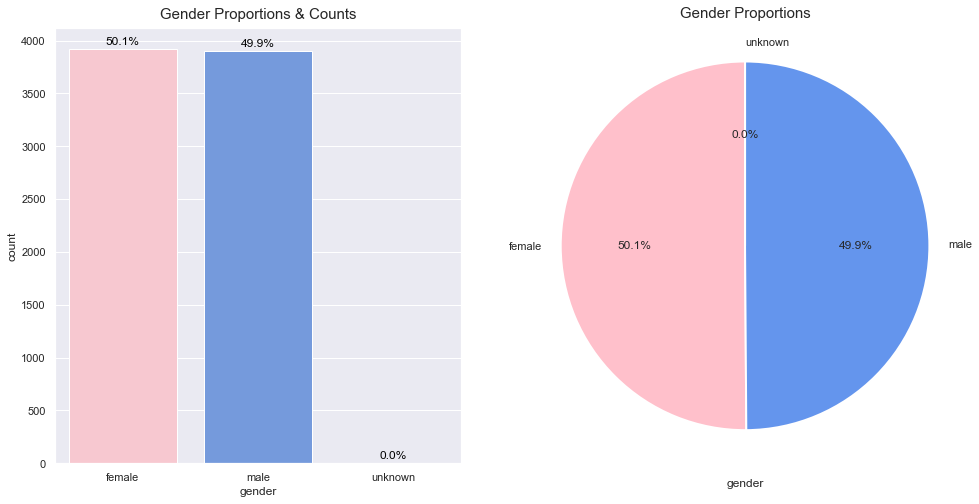

In [18]:
plt.figure(figsize=[16,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='gender', palette = ['pink', 'cornflowerblue']);
sorted_counts = df.gender.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = sorted_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just above the top of the bar
    plt.text(loc, count+(sorted_counts[0]/100), pct_string, ha = 'center', color = 'black')

plt.title('Gender Proportions & Counts', fontsize= 15, pad=10)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = ['pink', 'cornflowerblue']

plt.pie(x=sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.axis('square')
plt.xlabel('gender', labelpad=30)
plt.title('Gender Proportions', fontsize= 15, pad= 25);

### b- age

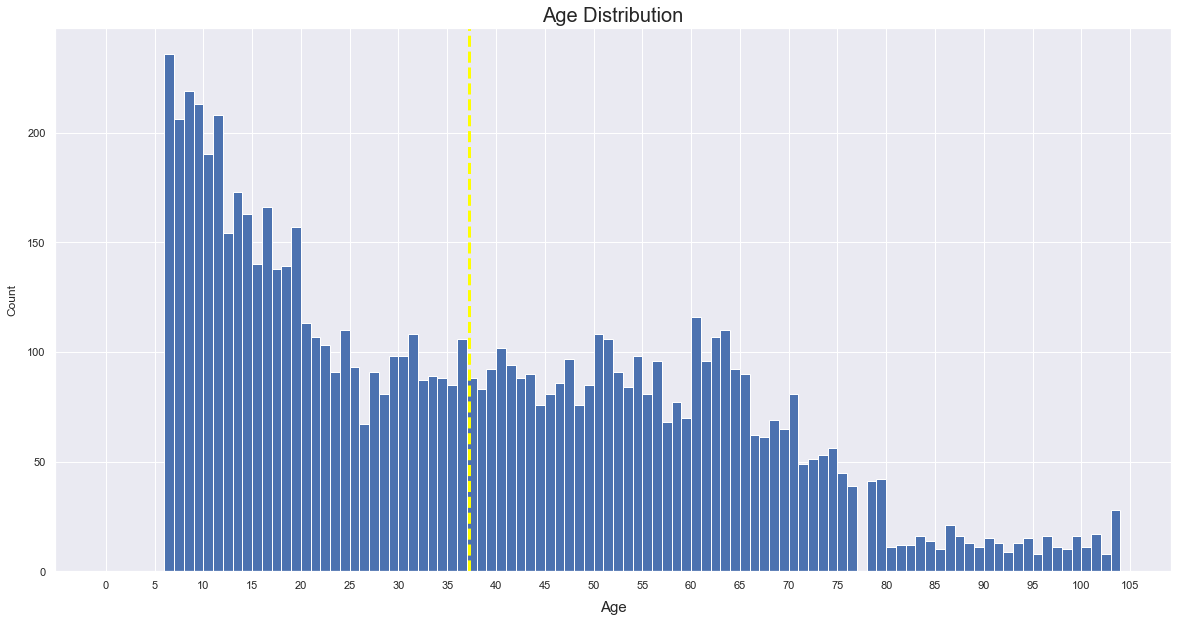

In [27]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+1, 1)
ticks = np.arange(0, df.age.max()+5, 5)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df, x='age', bins= bins)
plt.xticks(ticks, labels)

plt.axvline(x=df.age.mean(), linestyle='--', linewidth=3, color='yellow')

plt.title('Age Distribution', fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', fontsize=15, labelpad=10);

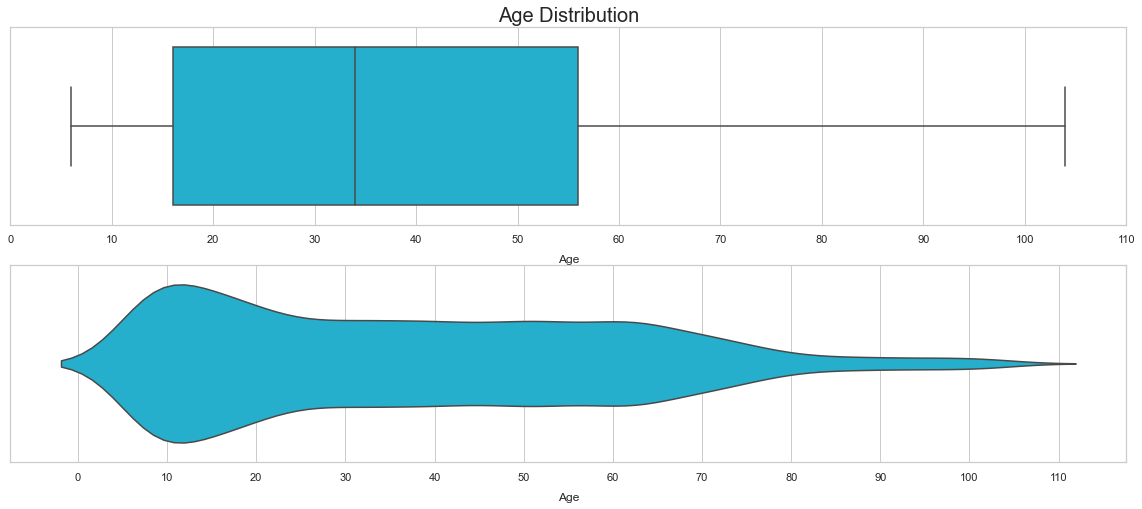

In [28]:
plt.figure(figsize=[20, 8])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
sb.boxplot(data=df, x='age',  color=sb.color_palette('rainbow', 10)[2])

ticks = np.arange(0,120,10)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Age Distribution', fontsize= 20)
plt.xlabel('Age', fontsize=12, labelpad=10);


#_______________________________second plot____________________________________
plt.subplot(2,1,2)
sb.violinplot(data=df, x='age', orient='horizontal', color=sb.color_palette('rainbow', 10)[2], inner= None)

plt.xticks(ticks, labels)
plt.title('', fontsize= 15)
plt.xlabel('Age', fontsize=12, labelpad=10);
plt.ylabel('', fontsize=12, labelpad=10);

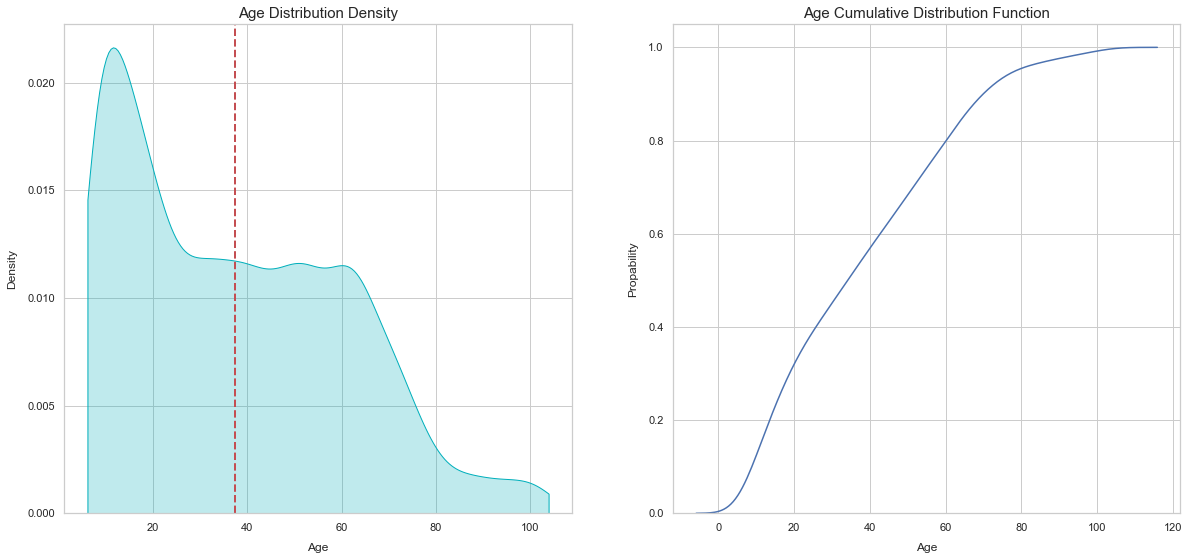

In [29]:
plt.figure(figsize=[20,9])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)
sb.kdeplot(data=df, x='age', cut=0, fill= True, color="#00AFBB");
plt.title('Age Distribution Density', fontsize= 15)
plt.ylabel('Density', labelpad=10)
plt.xlabel('Age', labelpad=10);
plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

#_______________________________second plot____________________________________
plt.subplot(1,2,2)
sb.kdeplot(data=df, x='age', cumulative=True);
plt.title('Age Cumulative Distribution Function', fontsize= 15)
plt.ylabel('Propability', labelpad=10)
plt.xlabel('Age', labelpad=10);

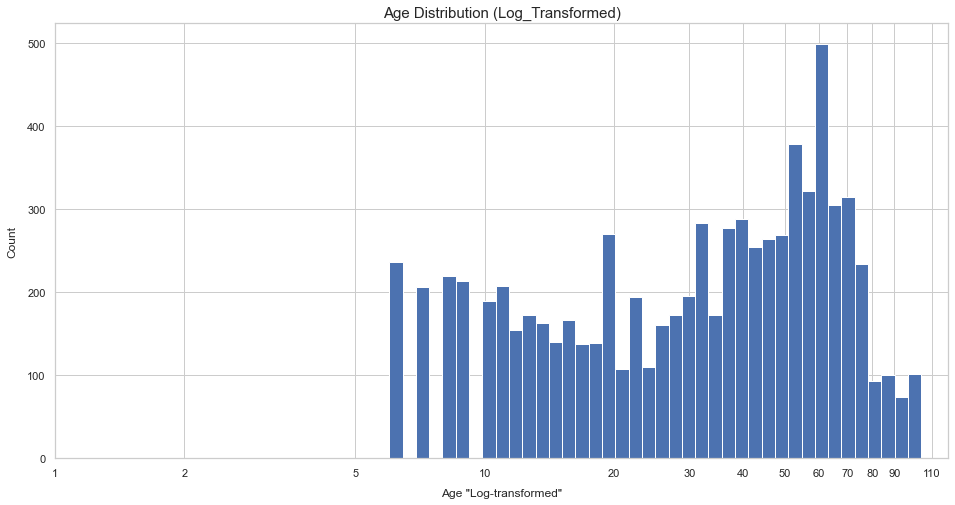

In [30]:
age_max_log = np.log10(df.age.max())
age_min_log = np.log10(df.age.min())
step = (age_max_log - age_min_log) / 40

plt.figure(figsize=[16, 8])
sb.set_theme(style="whitegrid")

bins= 10 ** np.arange(age_min_log, age_max_log + step, step)
#ticks = 10 ** np.arange(age_min_log, age_max_log + step, step * 4)
ticks = [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 110]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df, x='age', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)

plt.title('Age Distribution (Log_Transformed)', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age "Log-transformed"', labelpad=10);



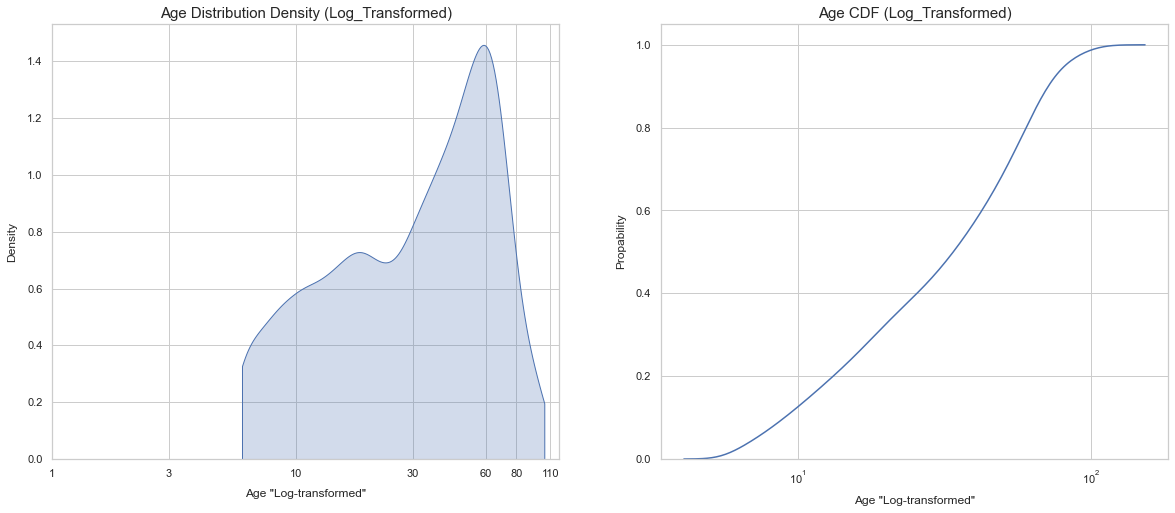

In [31]:
plt.figure(figsize=[20,8])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)
sb.kdeplot(data=df, x='age', cut=0, fill= True, log_scale=True);
ticks = [1, 3, 10, 30, 60,  80, 110]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Age Distribution Density (Log_Transformed)', fontsize= 15)
plt.ylabel('Density', labelpad=10)
plt.xlabel('Age "Log-transformed"', labelpad=10);


#_______________________________second plot____________________________________
plt.subplot(1,2,2)
sb.kdeplot(data=df, x='age', cumulative=True, log_scale=True);
plt.title('Age CDF (Log_Transformed)', fontsize= 15)
plt.ylabel('Propability', labelpad=10)
plt.xlabel('Age "Log-transformed"', labelpad=10);

### c- Education

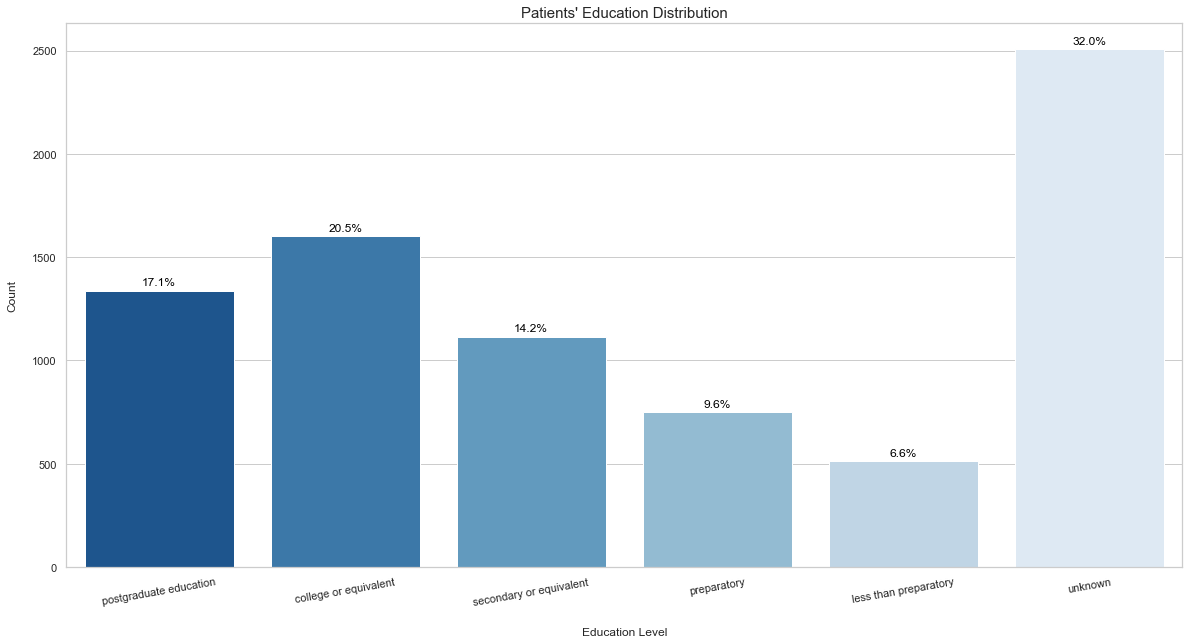

In [34]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='education', palette='Blues_r')

education_counts = df.education.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = education_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just above the top of the bar
    plt.text(loc, count+(education_counts[0]/100), pct_string, ha = 'center', color = 'black')

plt.xticks(rotation=10)
plt.title("Patients' Education Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=15)
plt.xlabel('Education Level', labelpad=20);

### d- Marital status

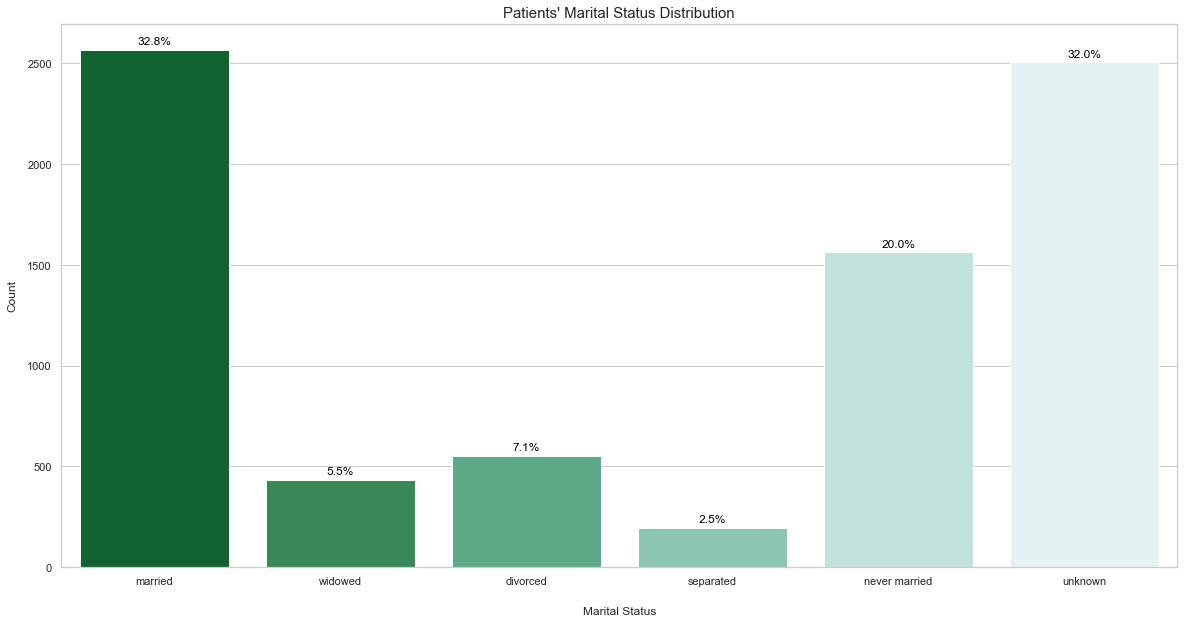

In [37]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='marital', palette='BuGn_r')

marital_counts = df.marital.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = marital_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just above the top of the bar
    plt.text(loc, count+(marital_counts[0]/100), pct_string, ha = 'center', color = 'black')
    
plt.xticks(rotation=0);
plt.title("Patients' Marital Status Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Marital Status', labelpad=20);


### e- Income

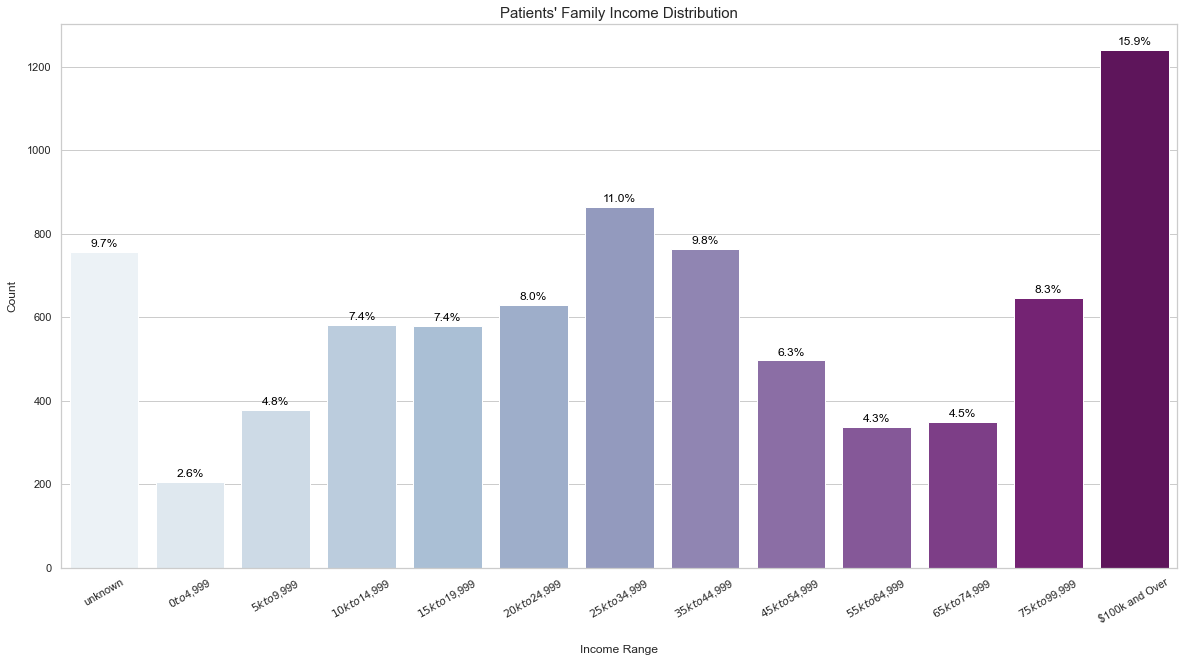

In [38]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='income', palette='BuPu')

income_counts = df.income.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = income_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just above the top of the bar
    plt.text(loc, count+(income_counts[0]/100), pct_string, ha = 'center', color = 'black')
    
plt.xticks(rotation=30);
plt.title("Patients' Family Income Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Income Range', labelpad=20);

### f- Insurance

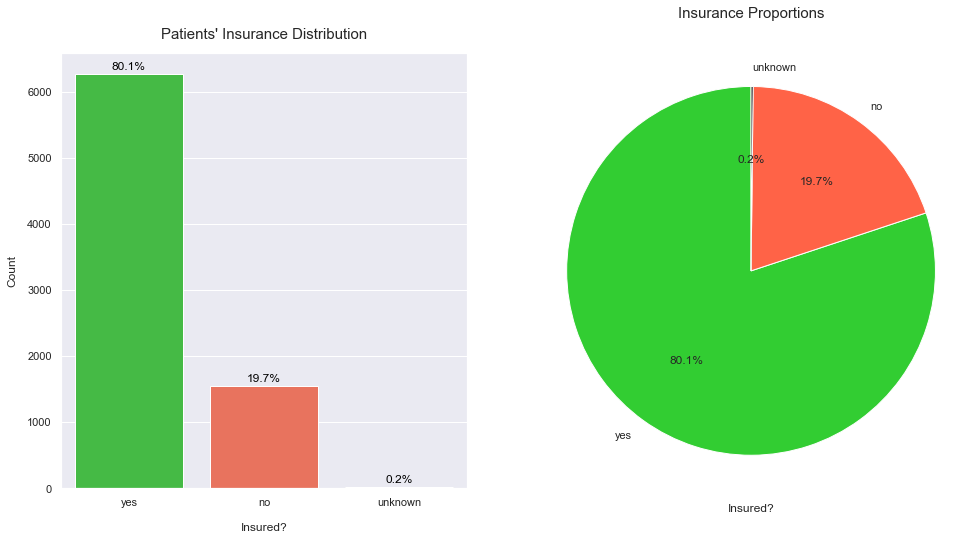

In [39]:
sorted_counts = df.insurance.value_counts()

#to manage plot size
plt.figure(figsize=[16,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='insurance', order=sorted_counts.index,
             palette = ['limegreen', 'tomato', 'black']);
insurance_counts = df.insurance.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = insurance_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+(sorted_counts[0]/100), pct_string, ha = 'center', color = 'black')

plt.xlabel('Insured?', labelpad=15)
plt.ylabel('Count', labelpad=10)
plt.title("Patients' Insurance Distribution", fontsize= 15, pad=15)


#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = ['limegreen', 'tomato', 'black']

plt.pie(x=sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=True, 
        colors=colors, autopct=lambda p: '{:.1f}%'.format(p))
plt.axis('square')
plt.xlabel('Insured?', labelpad=30)
plt.title("Insurance Proportions", fontsize= 15, pad=50);

### g- General Health

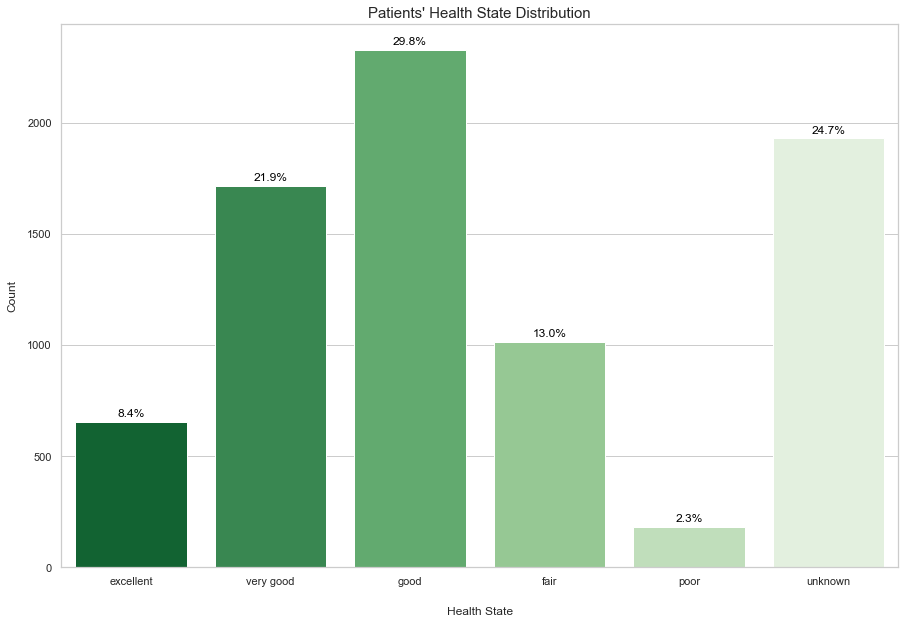

In [41]:
plt.figure(figsize=[15, 10])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='gen_health', palette='Greens_r')

health_counts = df.gen_health.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = health_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just above the top of the bar
    plt.text(loc, count+(health_counts[0]/100), pct_string, ha = 'center', color = 'black')
    
plt.xticks(rotation=0);
plt.title("Patients' Health State Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Health State', labelpad=20);

### h- Smoker

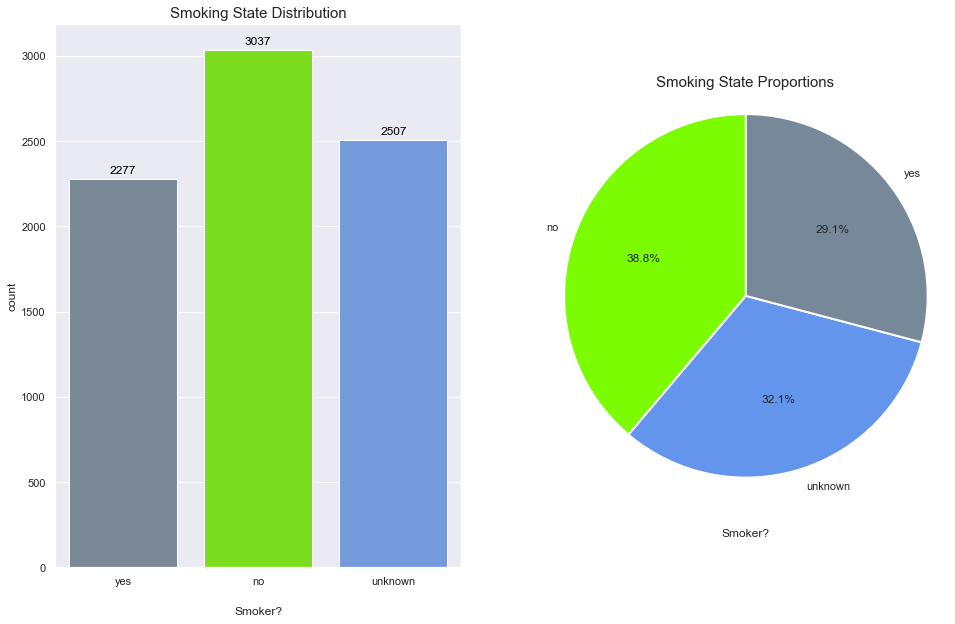

In [42]:
plt.figure(figsize=[16,10])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='smoker', palette = ['lightslategray', 'lawngreen', 'cornflowerblue']);
smok_counts = df.smoker.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = smok_counts[label.get_text()]
    pct_string = '{:.0f}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(smok_counts[0]/100), pct_string, ha = 'center', color = 'black')

plt.title('Smoking State Distribution', fontsize= 15)
plt.xlabel('Smoker?', labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = ['lawngreen', 'cornflowerblue', 'lightslategray']

plt.pie(x=smok_counts, labels=smok_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })

plt.axis('square')
plt.xlabel('Smoker?', labelpad=30)
plt.title('Smoking State Proportions', fontsize= 15);

### i- days_active

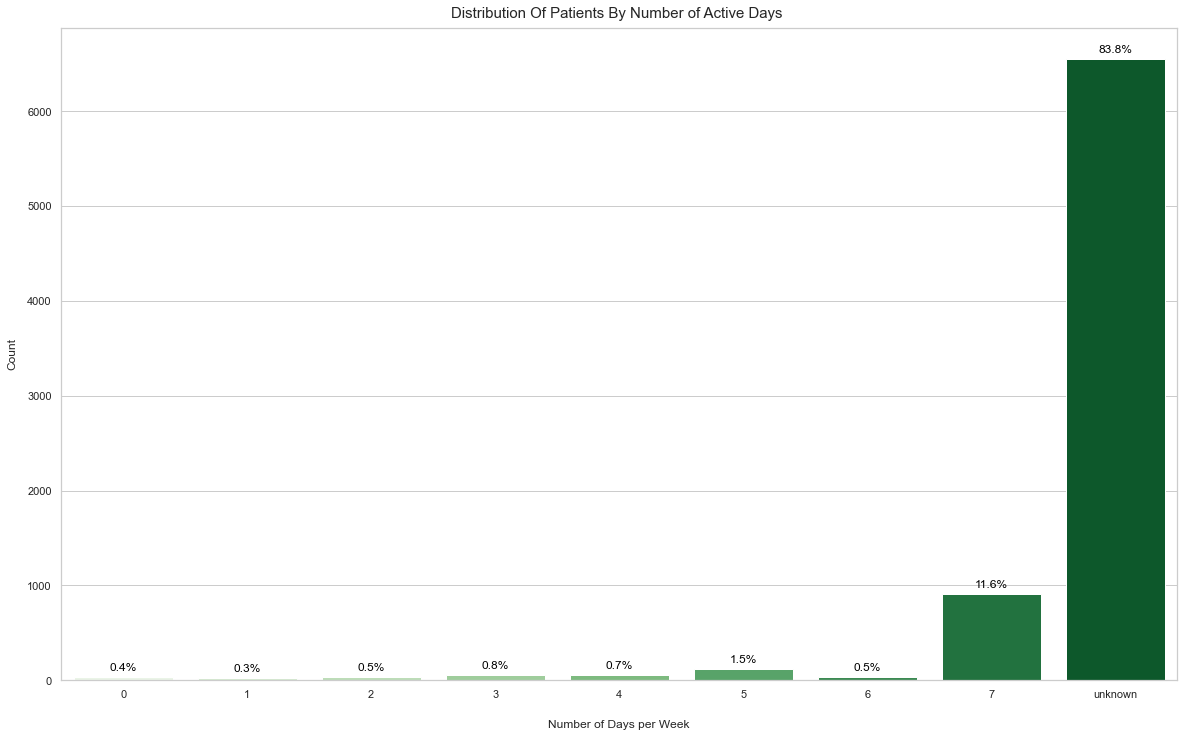

In [44]:
plt.figure(figsize=[20, 12])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='days_active', palette='Greens')

days_counts = df.days_active.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = days_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just above the top of the bar
    plt.text(loc, count+(days_counts[0]/100), pct_string, ha = 'center', color = 'black')
    
plt.xticks(rotation=0);
plt.title("Distribution Of Patients By Number of Active Days ", fontsize= 15, pad=10)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Number of Days per Week', labelpad=20);

### j- Body Mass Index (bmi)

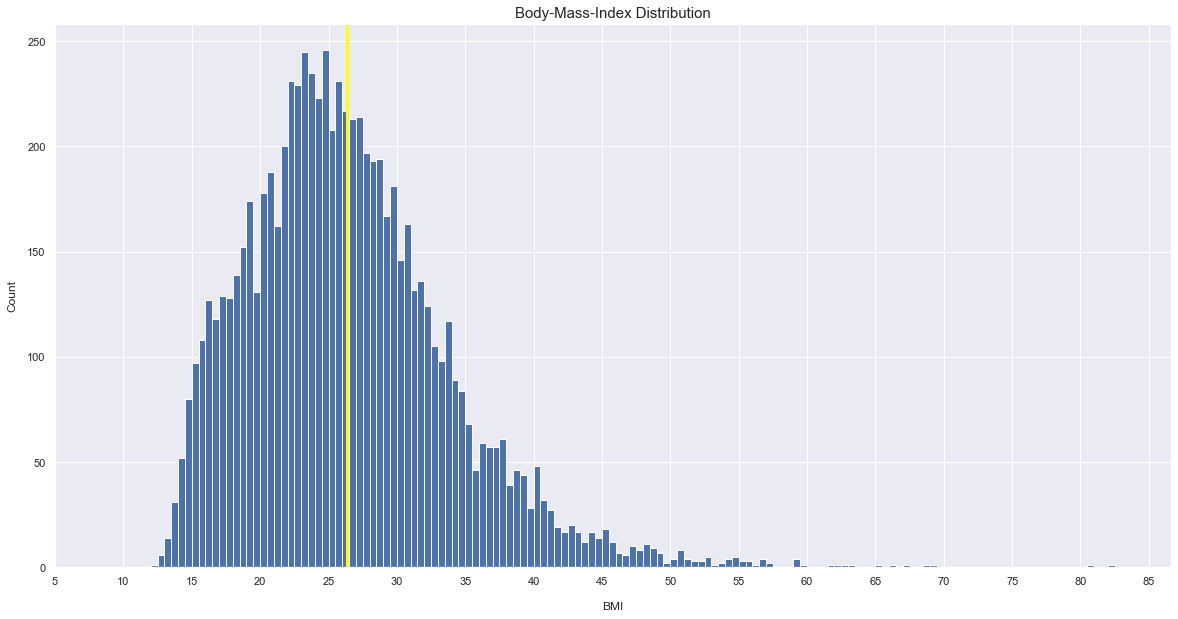

In [46]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.bmi.max()+.5, .5)
plt.hist(data=df, x='bmi', bins= bins)
ticks = np.arange(0, df.bmi.max()+5, 5)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(5,)
plt.axvline(x=df.bmi.mean(), linestyle='-', linewidth=3, color='yellow')

plt.title('Body-Mass-Index Distribution', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('BMI', labelpad=15);

### k- waist_cm

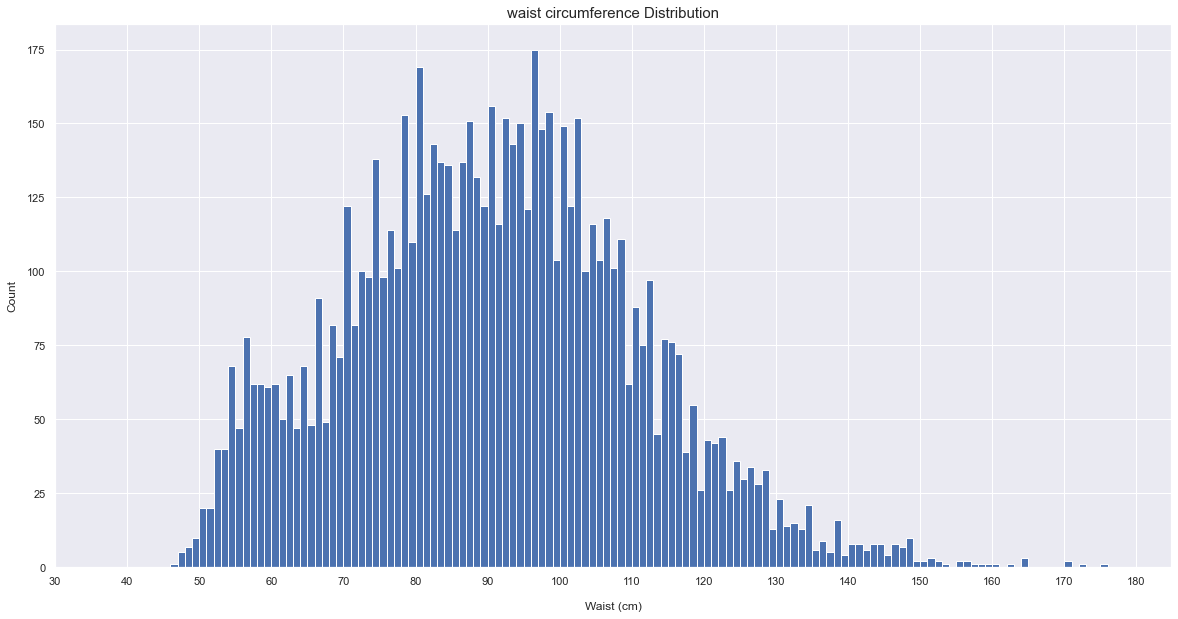

In [48]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.waist_cm.max()+1, 1)
ticks = np.arange(0, df.waist_cm.max()+10, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df, x='waist_cm', bins= bins)
plt.xticks(ticks, labels)
plt.xlim(30,)

plt.title('waist circumference Distribution', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Waist (cm)', labelpad=15);

### l- drinks_day

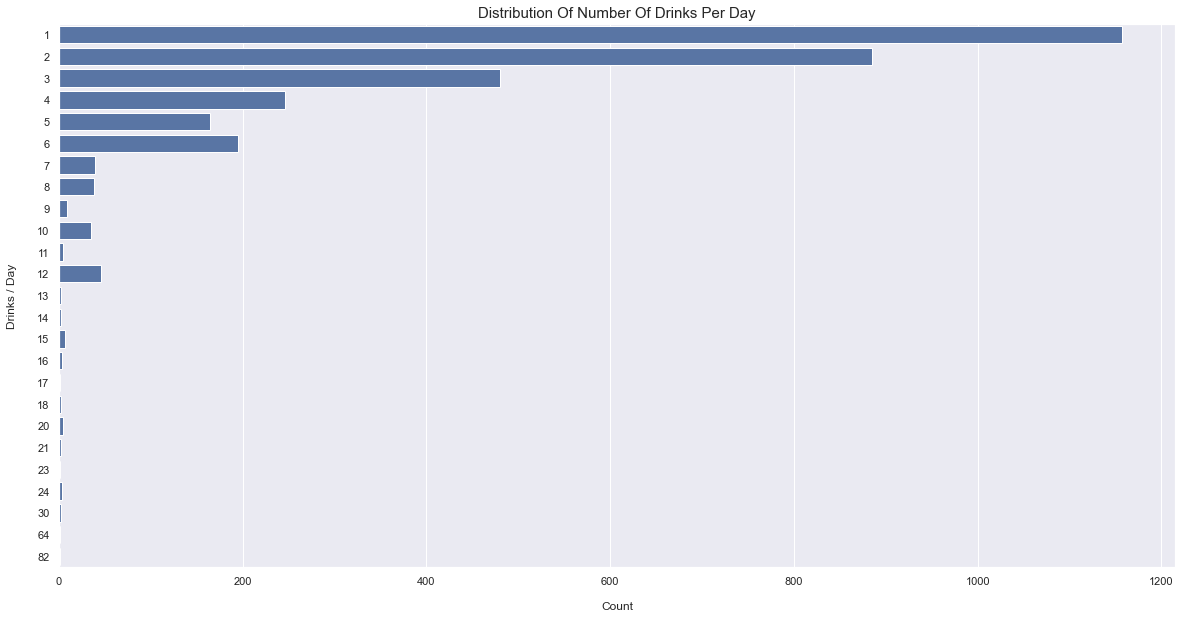

In [50]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="darkgrid")

index_ordered = df.drinks_day.value_counts().index.sort_values()
index_ordered = index_ordered.astype('int32')

sb.countplot(data=df, y='drinks_day', order=index_ordered, color=sb.color_palette()[0])
plt.title('Distribution Of Number Of Drinks Per Day', fontsize= 15)
plt.ylabel('Drinks / Day', labelpad=20)
plt.xlabel('Count', labelpad=15);

### m- weight_kg

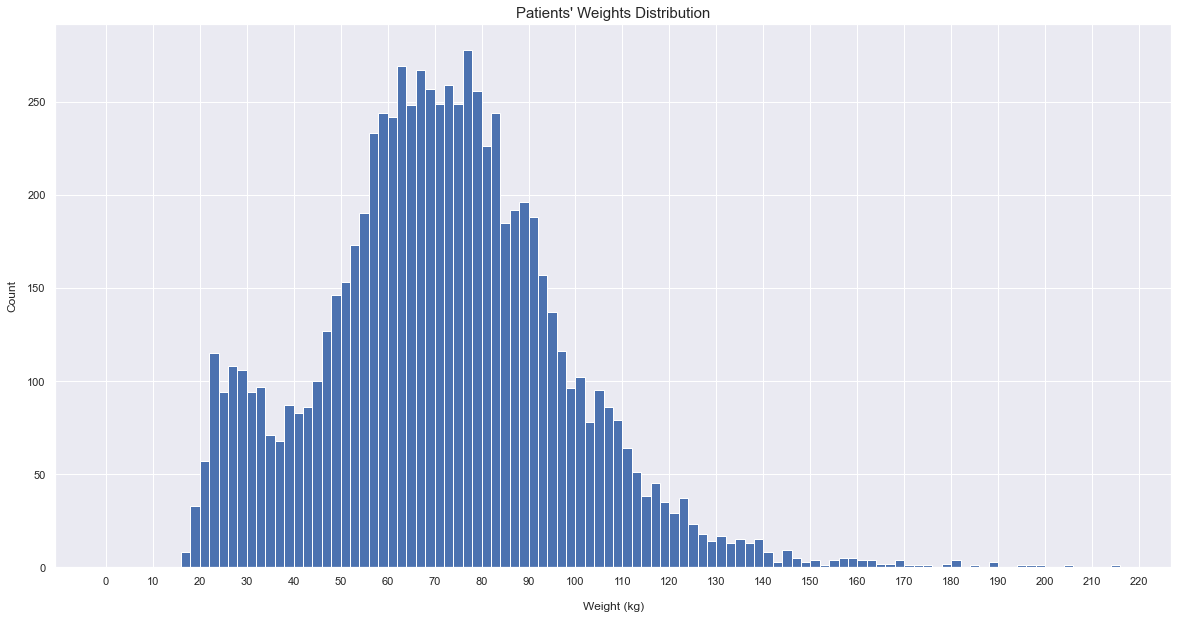

In [51]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="darkgrid")

bins = np.arange(0, df.weight_kg.max()+2, 2)
ticks = np.arange(0, df.weight_kg.max()+10, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df, x='weight_kg', bins= bins)
plt.xticks(ticks, labels)

plt.title("Patients' Weights Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Weight (kg)', labelpad=15);

### n- height_cm

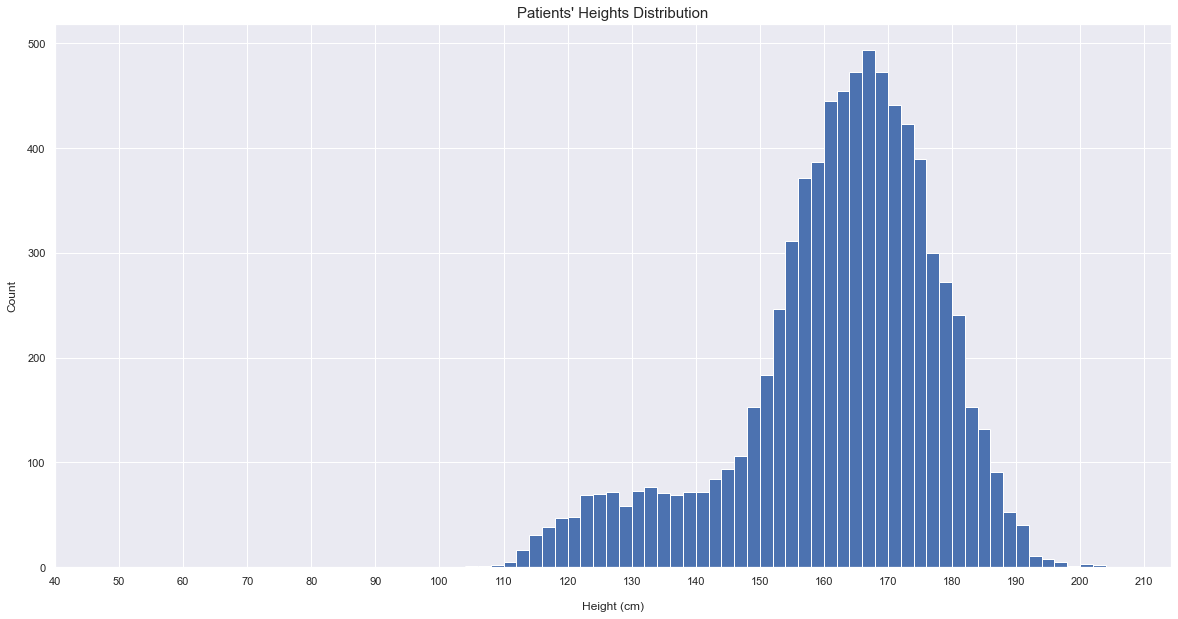

In [52]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.height_cm.max()+2, 2)
ticks = np.arange(40, df.height_cm.max()+10, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df, x='height_cm', bins= bins)
plt.xticks(ticks, labels)
plt.xlim(40,)

plt.title("Patients' Heights Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Height (cm)', labelpad=15);

## 2- Bivariate personal Data Analytics:

### gender

#### gender with age

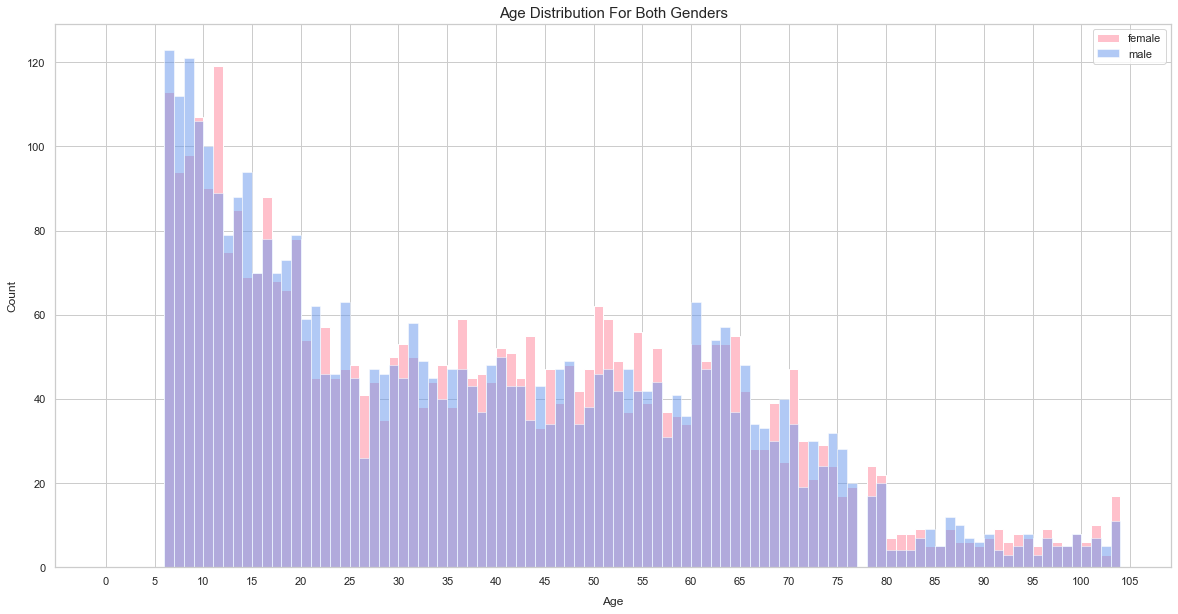

In [53]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+1, 1)
ticks = np.arange(0, df.age.max()+5, 5)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df[df.gender == 'female'], x='age', bins= bins, color='pink')
#_______________________________first plot____________________________________

plt.hist(data=df[df.gender == 'male'], x='age', bins= bins, color='cornflowerblue', alpha=.5)
plt.legend(['female','male']);

plt.xticks(ticks, labels)

plt.title('Age Distribution For Both Genders', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

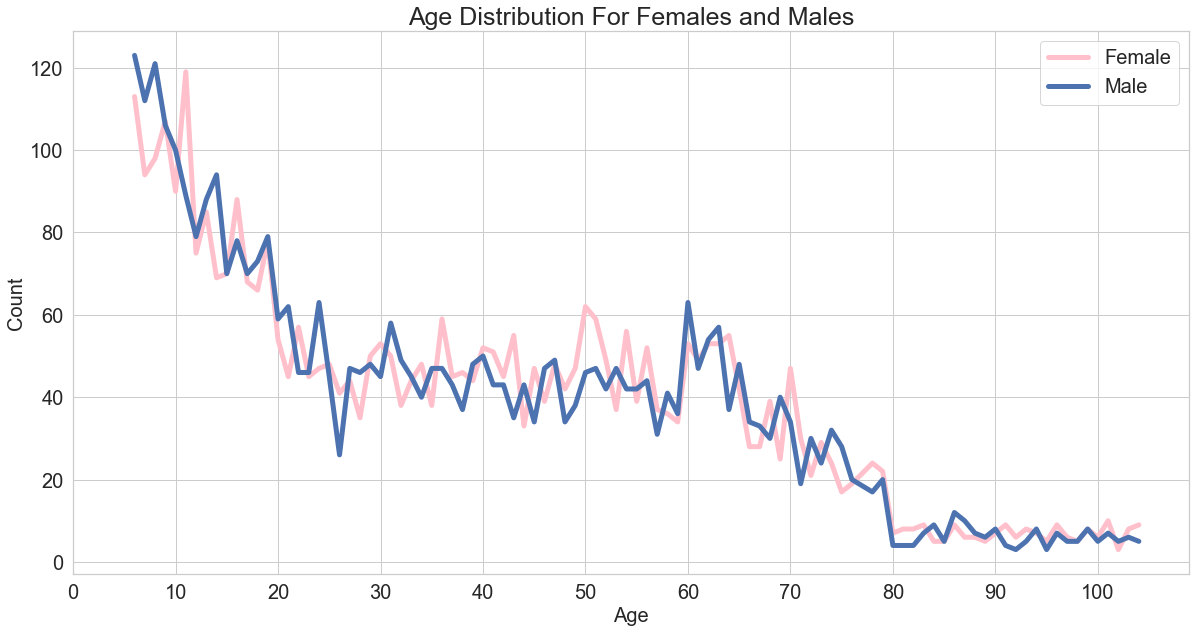

In [54]:
sb.set_theme(style="whitegrid")

df['age'][df.gender == 'female'].value_counts().sort_index().plot(kind='line', figsize=(20,10), 
                                                                    linewidth = '5', fontsize=20, 
                                                                    color='pink');
df['age'][df.gender == 'male'].value_counts().sort_index().plot(kind='line', figsize=(20,10),
                                                                  linewidth = '5', fontsize=20);

ticks = np.arange(0, 110, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Age Distribution For Females and Males', fontsize= 25)
plt.xlabel('Age', fontsize= 20)
plt.ylabel('Count', fontsize= 20)
plt.legend(['Female','Male'],fontsize=20);

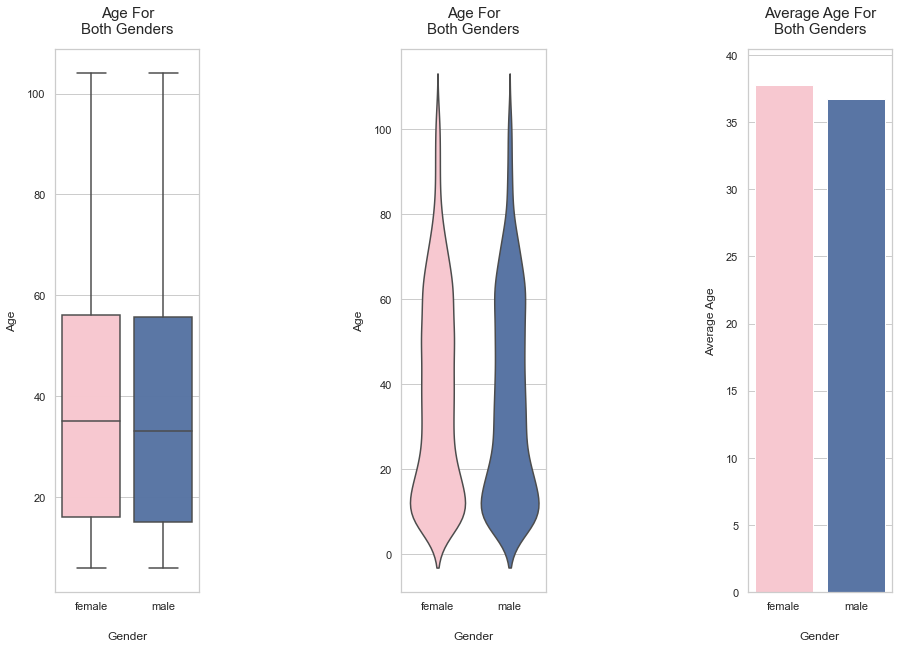

In [90]:
plt.figure(figsize=[15, 10])
sb.set_theme(style="whitegrid")
 
#_______________________________first plot____________________________________
plt.subplot(1,5,1)
sb.boxplot(data=df, x='gender', y='age', order=['female', 'male'], palette=['pink', 'b'], boxprops=dict(alpha=.99))
plt.title('Age For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Age', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,5,3)
sb.violinplot(data=df, x='gender', y='age', inner=None, order=['female', 'male'], palette=['pink', 'b'])
plt.title('Age For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Age', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,5,5)
sb.barplot(data=df, x='gender', y='age', errwidth=0, order=['female', 'male'], palette=['pink', 'b'])

plt.title('Average Age For\nBoth Genders', fontsize= 15, pad=15)
plt.xlabel('Gender', fontsize=12, labelpad=20)
plt.ylabel('Average Age', fontsize=12, labelpad=10);

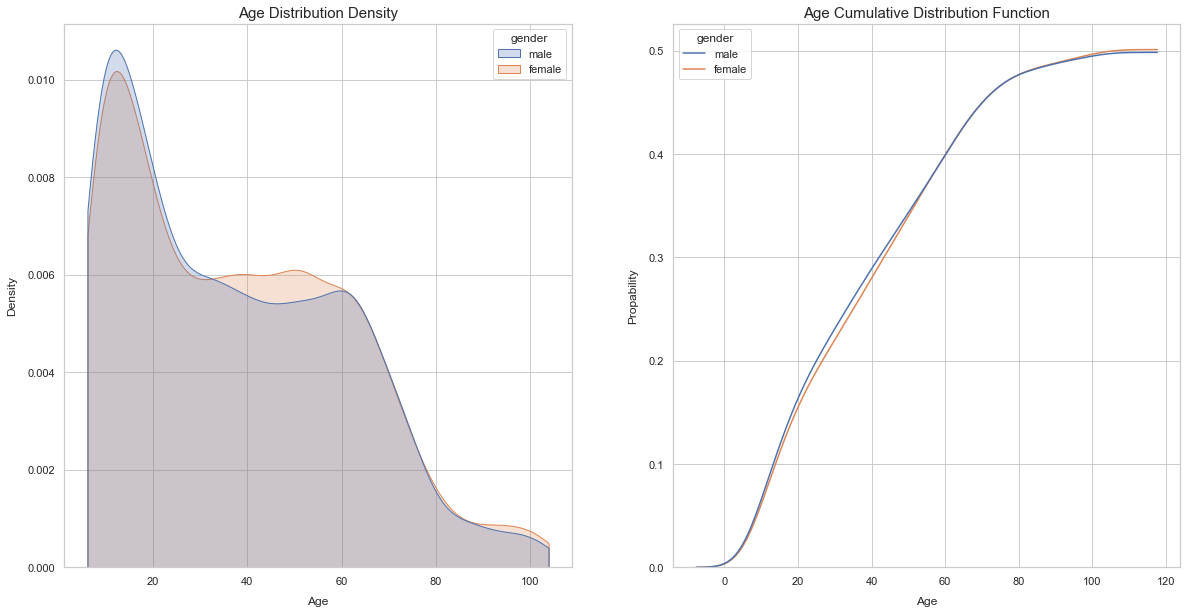

In [56]:
plt.figure(figsize=[20,10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)
sb.kdeplot(data=df, x='age', hue='gender', hue_order=['male', 'female'], cut=0, fill= True);
plt.title('Age Distribution Density', fontsize= 15)
plt.ylabel('Density', labelpad=10)
plt.xlabel('Age', labelpad=10);

#_______________________________second plot____________________________________
plt.subplot(1,2,2)
sb.kdeplot(data=df, hue='gender', hue_order=['male', 'female'], x='age', cumulative=True);
plt.title('Age Cumulative Distribution Function', fontsize= 15)
plt.ylabel('Propability', labelpad=10)
plt.xlabel('Age', labelpad=10);

#### gender with weight

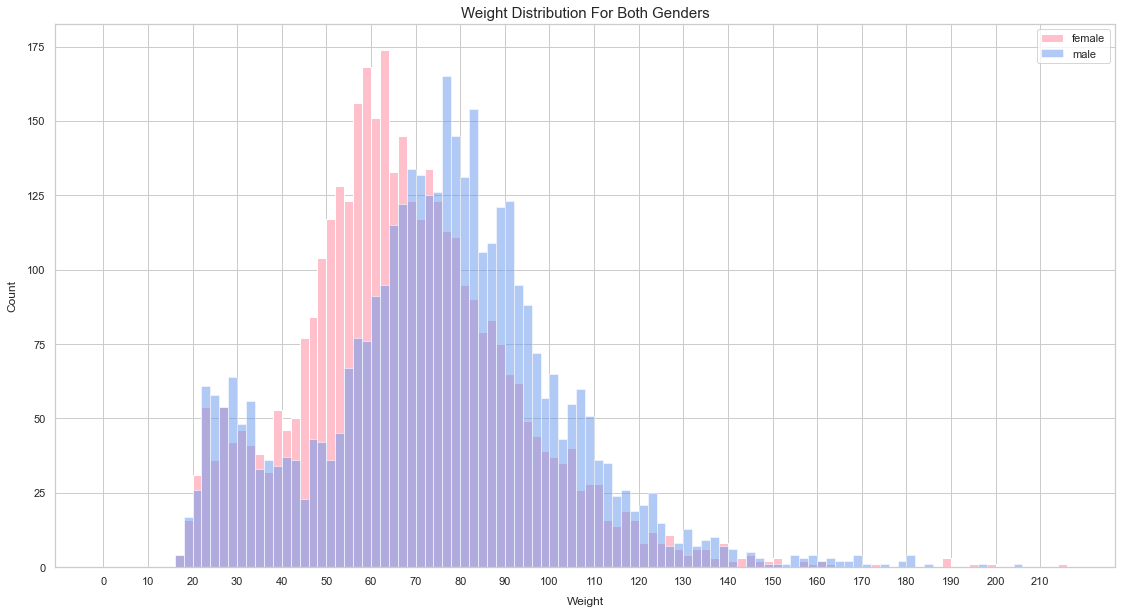

In [57]:
plt.figure(figsize=[19, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.weight_kg.max()+2, 2)
ticks = np.arange(0, df.weight_kg.max()+1, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df[df.gender == 'female'], x='weight_kg', bins= bins, color='pink')
#_______________________________first plot____________________________________

plt.hist(data=df[df.gender == 'male'], x='weight_kg', bins= bins, color='cornflowerblue', alpha=.5)
plt.legend(['female','male']);

plt.xticks(ticks, labels)

plt.title('Weight Distribution For Both Genders', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Weight', labelpad=10);

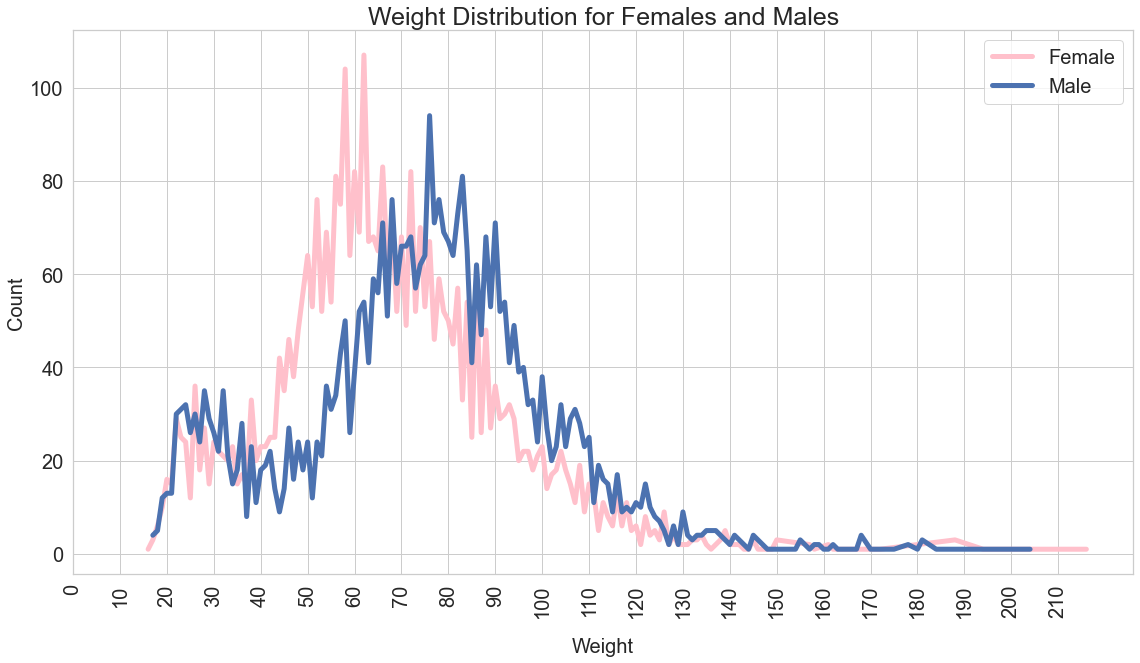

In [58]:
sb.set_theme(style="whitegrid")

df['weight_kg'][df.gender == 'female'].value_counts().sort_index().plot(kind='line', figsize=(19,10), 
                                                                    linewidth = '5', fontsize=20, 
                                                                    color='pink');
df['weight_kg'][df.gender == 'male'].value_counts().sort_index().plot(kind='line', figsize=(19,10),
                                                                  linewidth = '5', fontsize=20);

ticks = np.arange(0, df.weight_kg.max()+1, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)

plt.title('Weight Distribution for Females and Males', fontsize= 25)
plt.xlabel('Weight', fontsize= 20, labelpad=20)
plt.ylabel('Count', fontsize= 20)
plt.legend(['Female','Male'],fontsize=20);

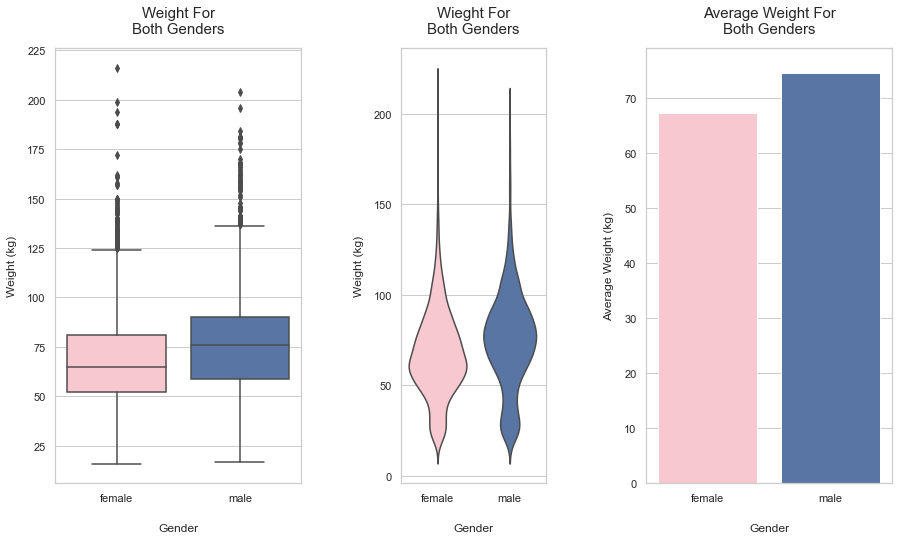

In [89]:
plt.figure(figsize=[15, 8])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,3,1)
sb.boxplot(data=df, x='gender', y='weight_kg', order=['female', 'male'], palette=['pink', 'b'])
plt.title('Weight For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Weight (kg)', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,5,3)
sb.violinplot(data=df, x='gender', y='weight_kg', inner=None, order=['female', 'male'], palette=['pink', 'b'])
plt.title('Wieght For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Weight (kg)', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,3,3)
sb.barplot(data=df, x='gender', y='weight_kg', errwidth=0, order=['female', 'male'], palette=['pink', 'b'])

plt.title('Average Weight For\nBoth Genders', fontsize= 15, pad=15)
plt.xlabel('Gender', fontsize=12, labelpad=20)
plt.ylabel('Average Weight (kg)', fontsize=12, labelpad=10);

#### gender with height

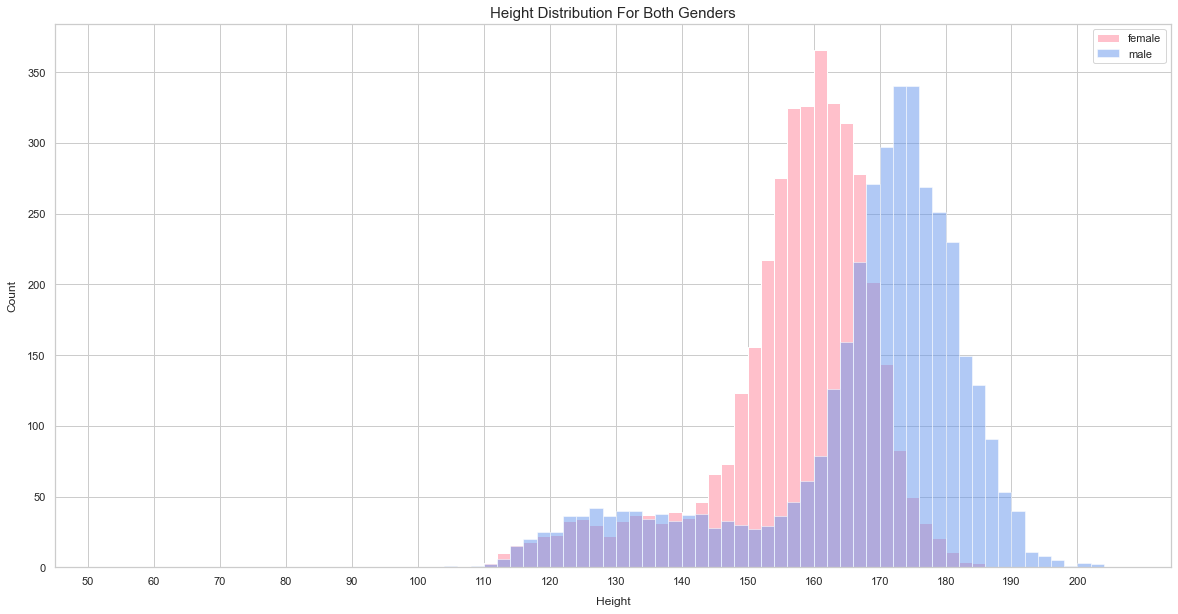

In [60]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.height_cm.max()+2, 2)
ticks = np.arange(0, df.height_cm.max()+1, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df[df.gender == 'female'], x='height_cm', bins= bins, color='pink')


#_______________________________second plot____________________________________

plt.hist(data=df[df.gender == 'male'], x='height_cm', bins= bins, color='cornflowerblue', alpha=.5)
plt.legend(['female','male']);

plt.xticks(ticks, labels)
plt.xlim(45,)

plt.title('Height Distribution For Both Genders', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Height', labelpad=10);

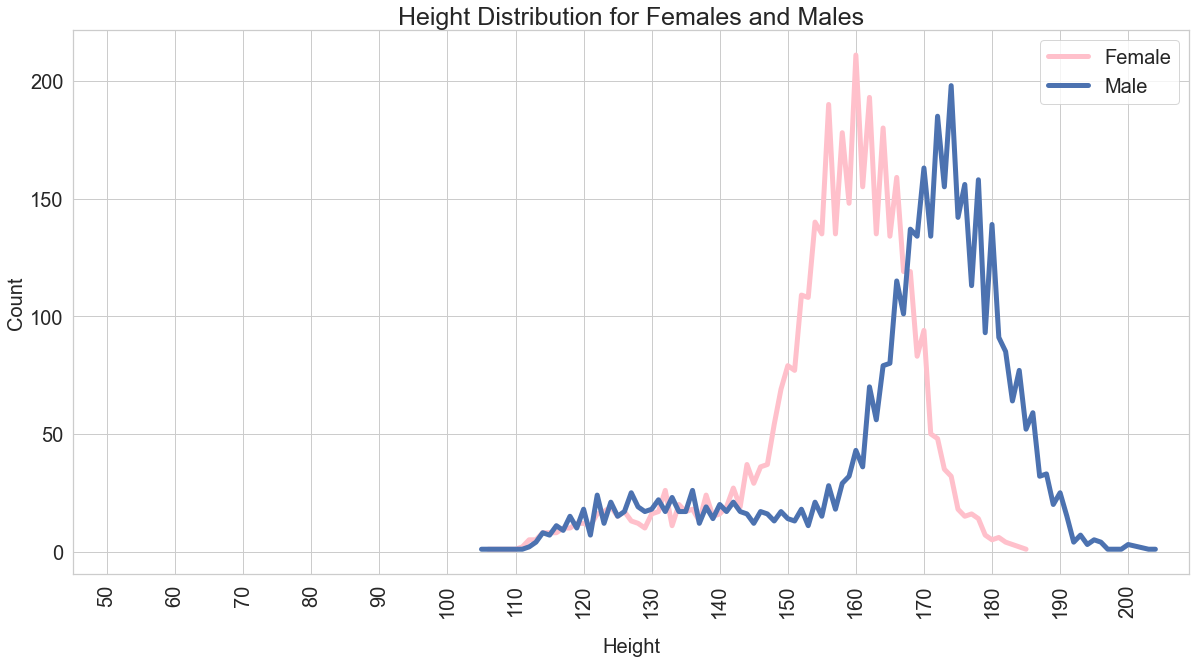

In [61]:
sb.set_theme(style="whitegrid")

df['height_cm'][df.gender == 'female'].value_counts().sort_index().plot(kind='line', figsize=(20,10), 
                                                                    linewidth = '5', fontsize=20, 
                                                                    color='pink');
df['height_cm'][df.gender == 'male'].value_counts().sort_index().plot(kind='line', figsize=(20,10),
                                                                  linewidth = '5', fontsize=20);

ticks = np.arange(0, df.height_cm.max()+1, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.xlim(45,)


plt.title('Height Distribution for Females and Males', fontsize= 25)
plt.xlabel('Height', fontsize= 20, labelpad=20)
plt.ylabel('Count', fontsize= 20)
plt.legend(['Female','Male'],fontsize=20);

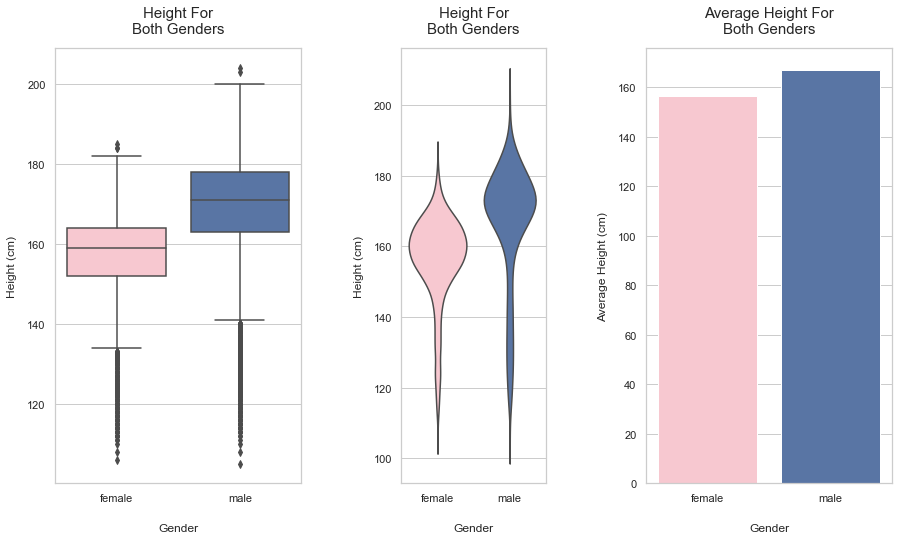

In [88]:
plt.figure(figsize=[15, 8])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,3,1)
sb.boxplot(data=df, x='gender', y='height_cm', order=['female', 'male'], palette=['pink', 'b'])
plt.title('Height For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Height (cm)', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,5,3)
sb.violinplot(data=df, x='gender', y='height_cm', inner=None, order=['female', 'male'], palette=['pink', 'b'])
plt.title('Height For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Height (cm)', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,3,3)
sb.barplot(data=df, x='gender', y='height_cm', errwidth=0, order=['female', 'male'], palette=['pink', 'b'])

plt.title('Average Height For\nBoth Genders', fontsize= 15, pad=15)
plt.xlabel('Gender', fontsize=12, labelpad=20)
plt.ylabel('Average Height (cm)', fontsize=12, labelpad=10);

#### gender with education

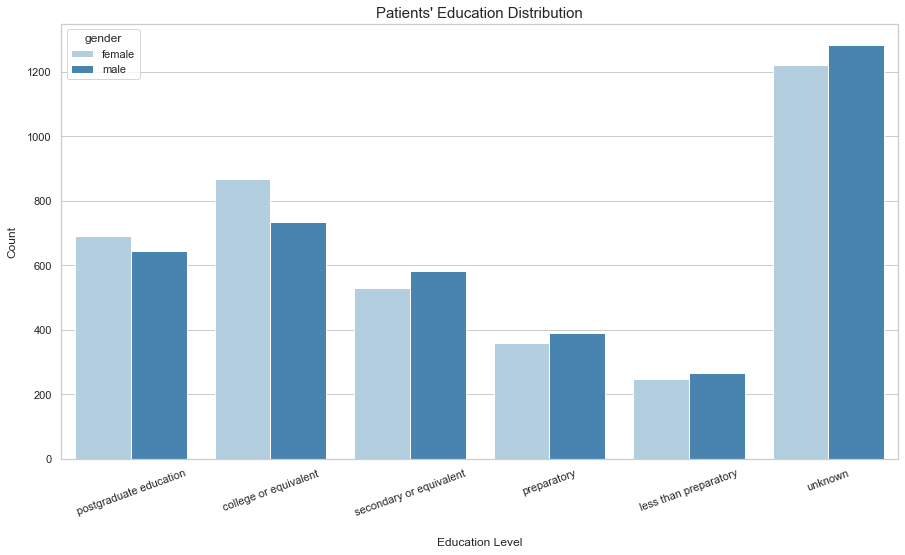

In [63]:
plt.figure(figsize=[15, 8])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='education', hue='gender', hue_order=['female', 'male'], palette='Blues')

plt.xticks(rotation=20)
plt.title("Patients' Education Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Education Level', labelpad=20);

#### gender with marital

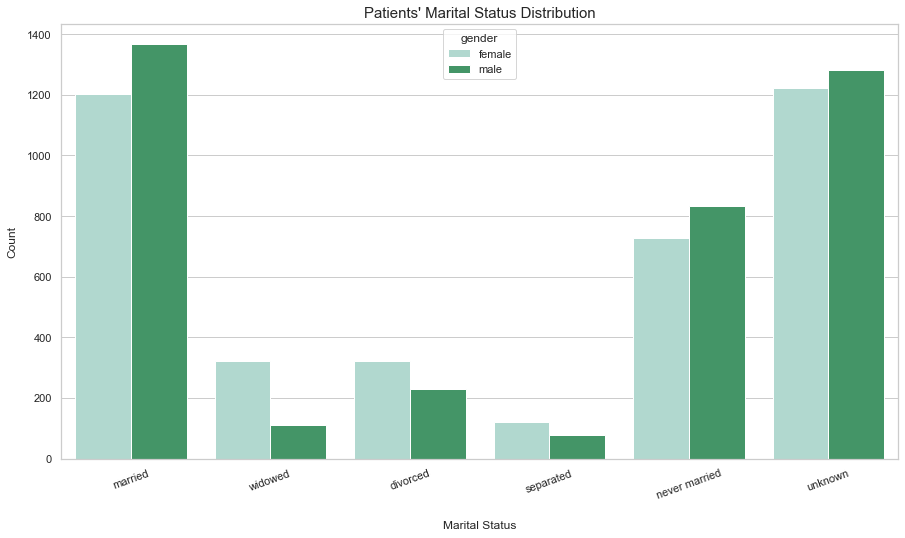

In [64]:
plt.figure(figsize=[15, 8])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='marital', hue='gender', hue_order=['female', 'male'], palette='BuGn')
    
plt.xticks(rotation=20);
plt.title("Patients' Marital Status Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Marital Status', labelpad=20);

#### gender with income

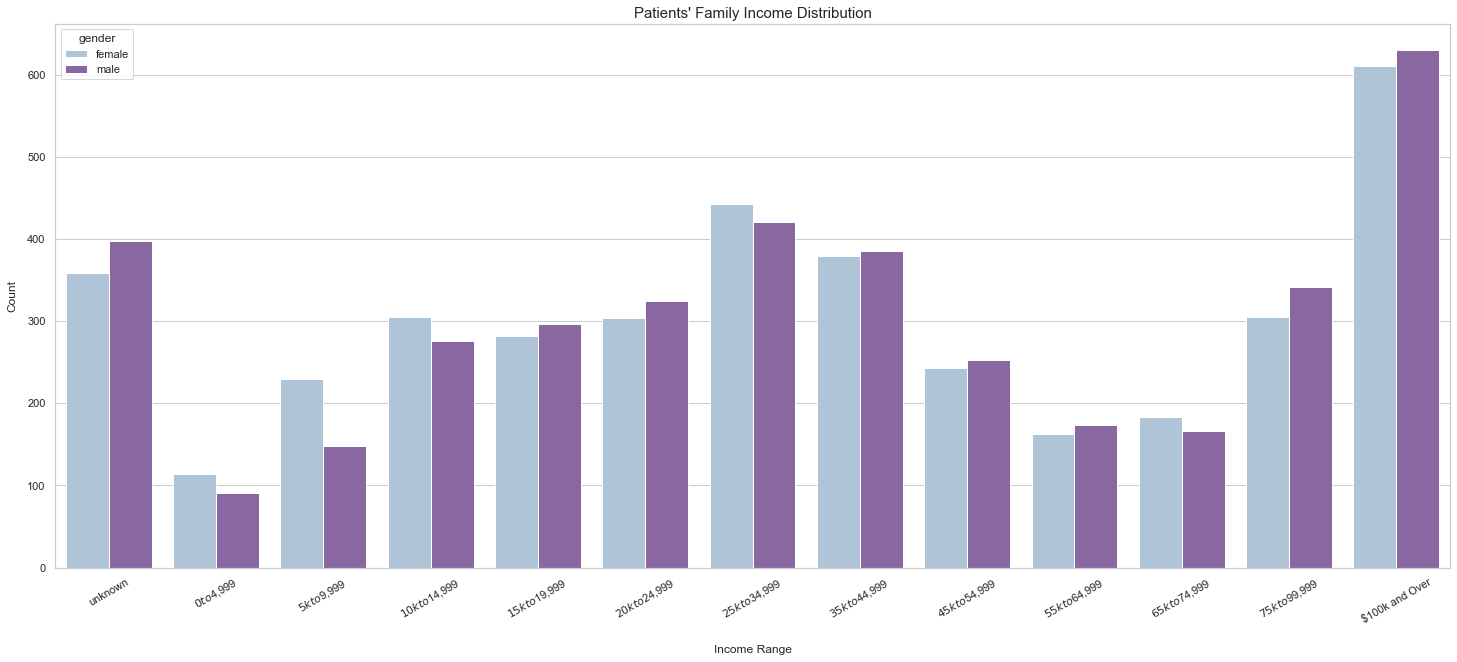

In [66]:
plt.figure(figsize=[25, 10])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='income', hue='gender', hue_order=['female', 'male'], palette='BuPu')
    
plt.xticks(rotation=30);
plt.title("Patients' Family Income Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Income Range', labelpad=20);

#### gender with insurance

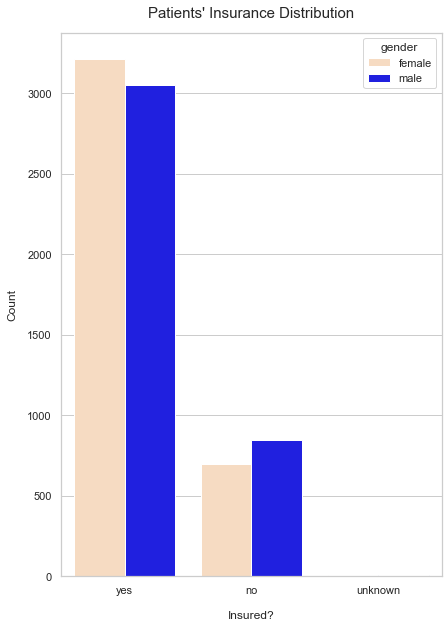

In [69]:
sorted_counts = df.insurance.value_counts()

plt.figure(figsize=[15,10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='insurance', order=sorted_counts.index, hue='gender', hue_order=['female', 'male'],
             palette = ['peachpuff', 'blue']);

plt.xlabel('Insured?', labelpad=15)
plt.ylabel('Count', labelpad=10)
plt.title("Patients' Insurance Distribution", fontsize= 15, pad=15);

#### gender with general health

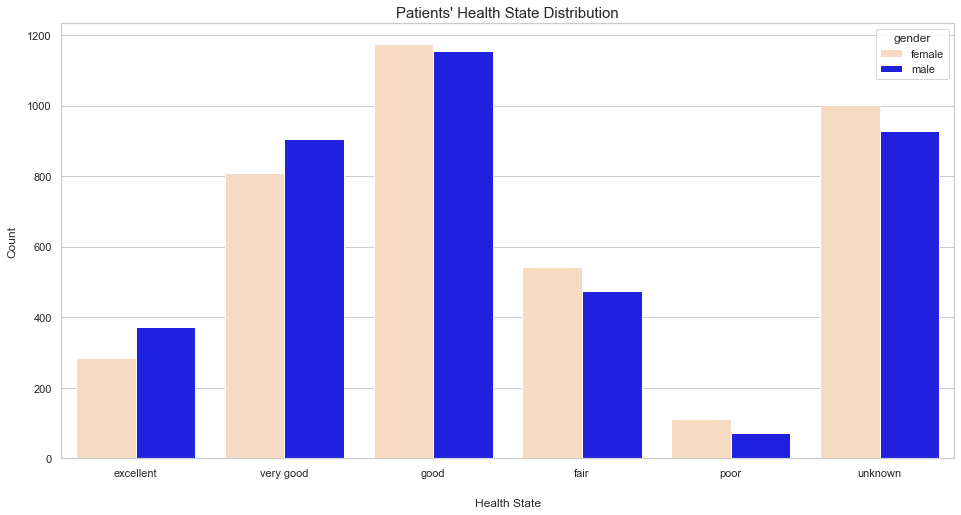

In [70]:
plt.figure(figsize=[16, 8])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='gen_health', hue='gender', hue_order=['female', 'male'], palette=['peachpuff', 'blue'])
    
plt.xticks(rotation=0);
plt.title("Patients' Health State Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Health State', labelpad=20);

#### gender with smoke

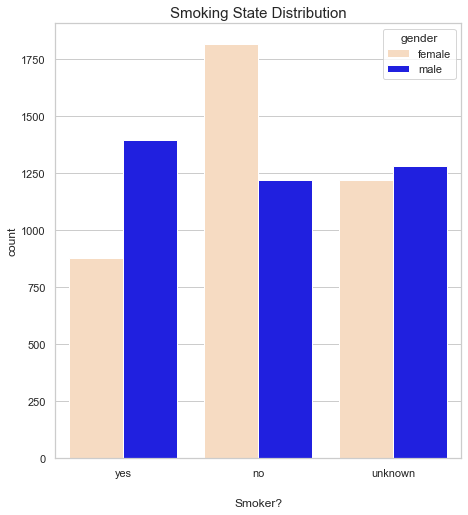

In [71]:
plt.figure(figsize=[16,8])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='smoker', hue='gender', hue_order=['female', 'male'], palette=['peachpuff', 'blue']);

plt.title('Smoking State Distribution', fontsize= 15)
plt.xlabel('Smoker?', labelpad=20);

#### gender with active days

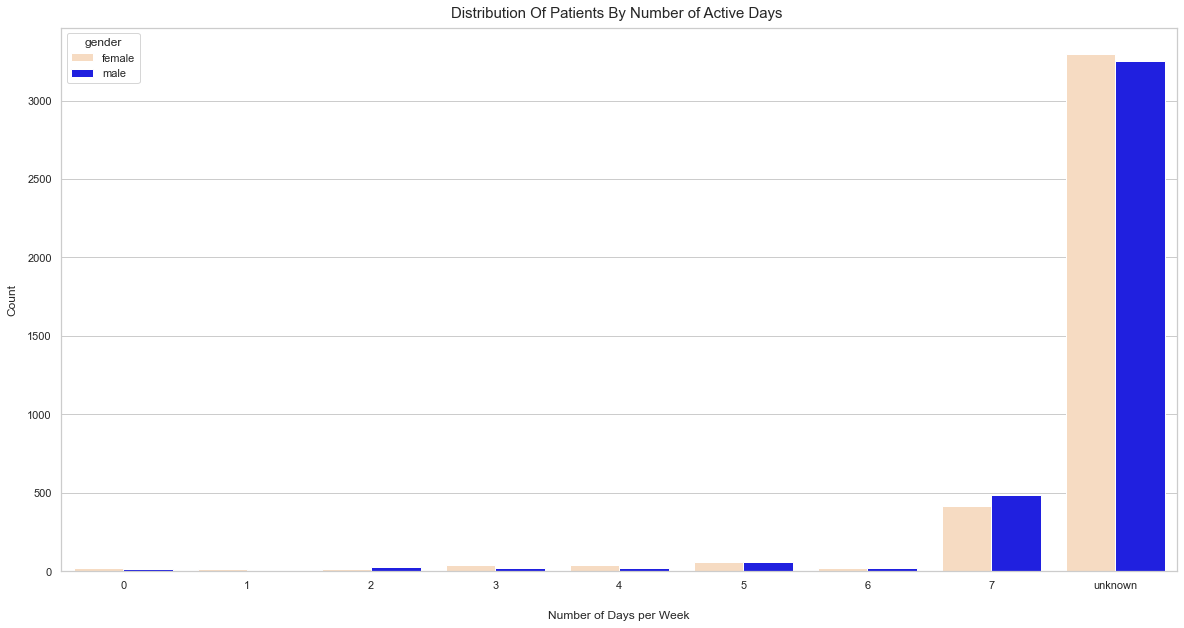

In [72]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

sb.countplot(data=df, x='days_active', hue='gender', hue_order=['female', 'male'], palette=['peachpuff', 'blue'])
    
plt.xticks(rotation=0);
plt.title("Distribution Of Patients By Number of Active Days ", fontsize= 15, pad=10)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Number of Days per Week', labelpad=20);

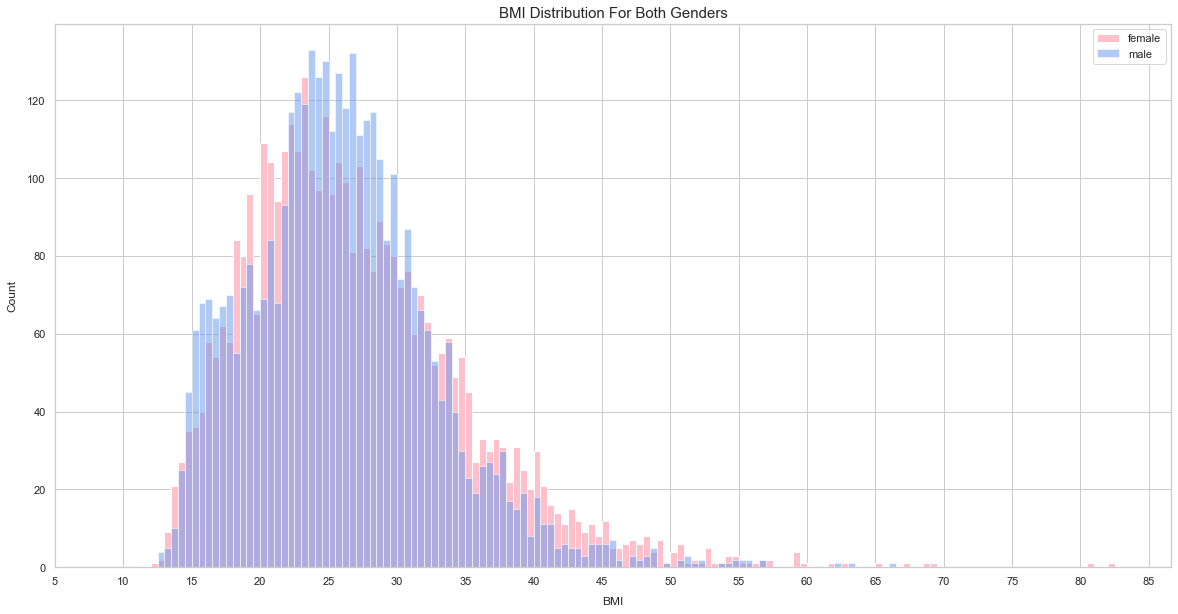

In [73]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.bmi.max()+.5, .5)
ticks = np.arange(0, df.bmi.max()+5, 5)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df[df.gender == 'female'], x='bmi', bins= bins, color='pink')
#_______________________________first plot____________________________________

plt.hist(data=df[df.gender == 'male'], x='bmi', bins= bins, color='cornflowerblue', alpha=.5)
plt.legend(['female','male']);

plt.xticks(ticks, labels)
plt.xlim(5,)

plt.title('BMI Distribution For Both Genders', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('BMI', labelpad=10);

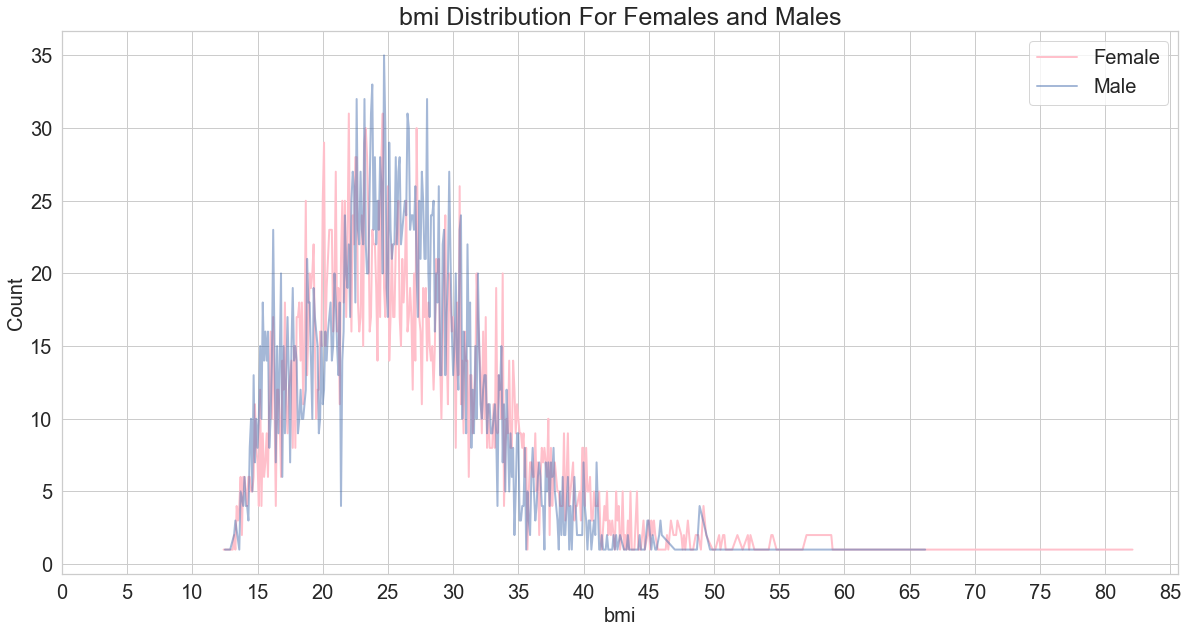

In [75]:
sb.set_theme(style="whitegrid")

df['bmi'][df.gender == 'female'].value_counts().sort_index().plot(kind='line', figsize=(20,10), 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='pink');
df['bmi'][df.gender == 'male'].value_counts().sort_index().plot(kind='line', figsize=(20,10),
                                                                  linewidth = '2', fontsize=20
                                                               , alpha =.5);

ticks = np.arange(0, df.bmi.max()+5, 5)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('bmi Distribution For Females and Males', fontsize= 25)
plt.xlabel('bmi', fontsize= 20)
plt.ylabel('Count', fontsize= 20)
plt.legend(['Female','Male'],fontsize=20);

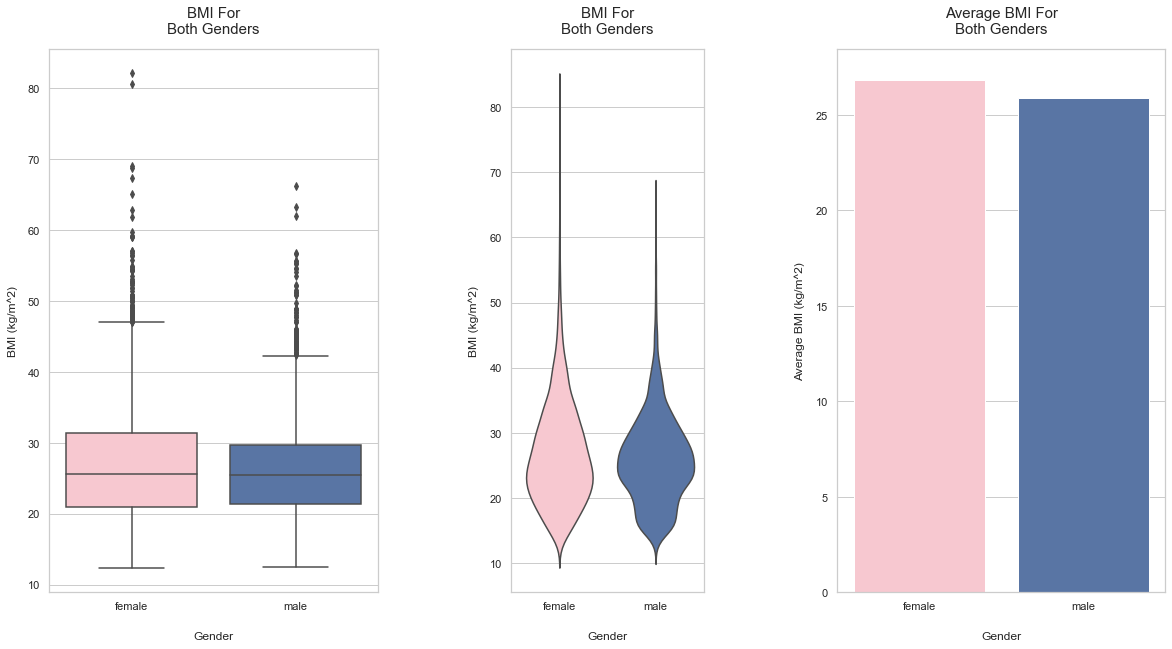

In [87]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,3,1)
sb.boxplot(data=df, x='gender', y='bmi', order=['female', 'male'], palette=['pink', 'b'])
plt.title('BMI For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('BMI (kg/m^2)', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,5,3)
sb.violinplot(data=df, x='gender', y='bmi', inner=None, order=['female', 'male'], palette=['pink', 'b'])
plt.title('BMI For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('BMI (kg/m^2)', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,3,3)
sb.barplot(data=df, x='gender', y='bmi', errwidth=0, order=['female', 'male'], palette=['pink', 'b'])

plt.title('Average BMI For\nBoth Genders', fontsize= 15, pad=15)
plt.xlabel('Gender', fontsize=12, labelpad=20)
plt.ylabel('Average BMI (kg/m^2)', fontsize=12, labelpad=10);

#### gender with waist

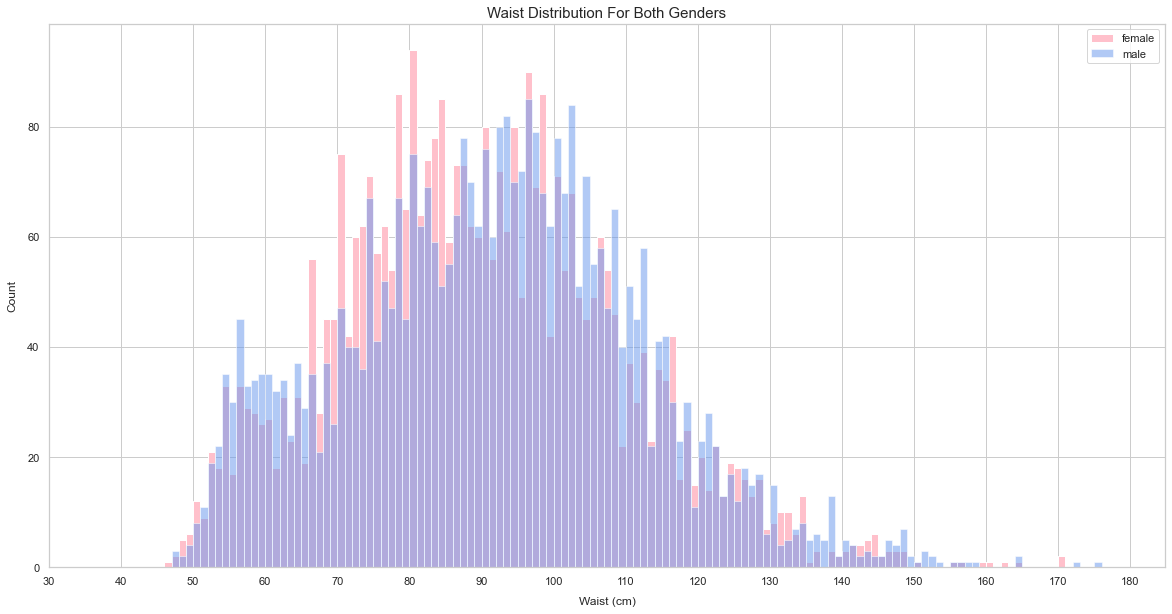

In [77]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.waist_cm.max()+1, 1)
ticks = np.arange(0, df.waist_cm.max()+10, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df[df.gender == 'female'], x='waist_cm', bins= bins, color='pink')
#_______________________________second plot____________________________________

plt.hist(data=df[df.gender == 'male'], x='waist_cm', bins= bins, color='cornflowerblue', alpha=.5)
plt.legend(['female','male']);

plt.xticks(ticks, labels)
plt.xlim(30,)

plt.title('Waist Distribution For Both Genders', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Waist (cm)', labelpad=10);

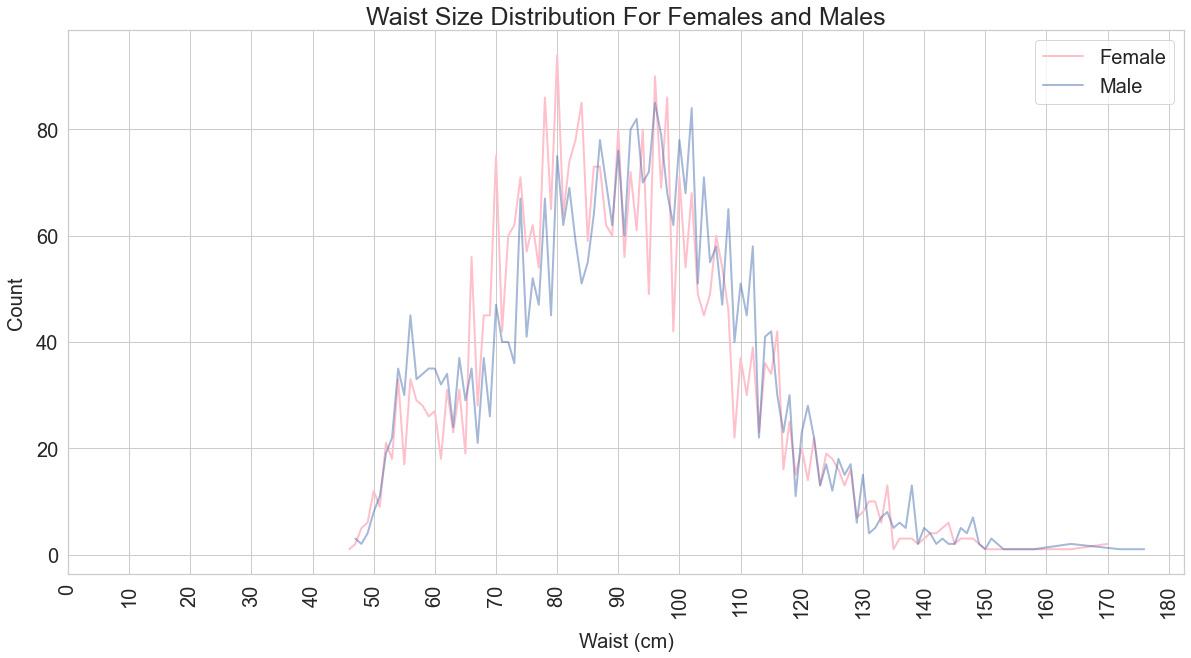

In [78]:
df['waist_cm'][df.gender == 'female'].value_counts().sort_index().plot(kind='line', figsize=(20,10), 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='pink');
df['waist_cm'][df.gender == 'male'].value_counts().sort_index().plot(kind='line', figsize=(20,10),
                                                                  linewidth = '2', fontsize=20
                                                               , alpha =.5);

ticks = np.arange(0, df.waist_cm.max()+10, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)


plt.title('Waist Size Distribution For Females and Males', fontsize= 25)
plt.xlabel('Waist (cm)', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 20, labelpad=10)
plt.legend(['Female','Male'],fontsize=20);

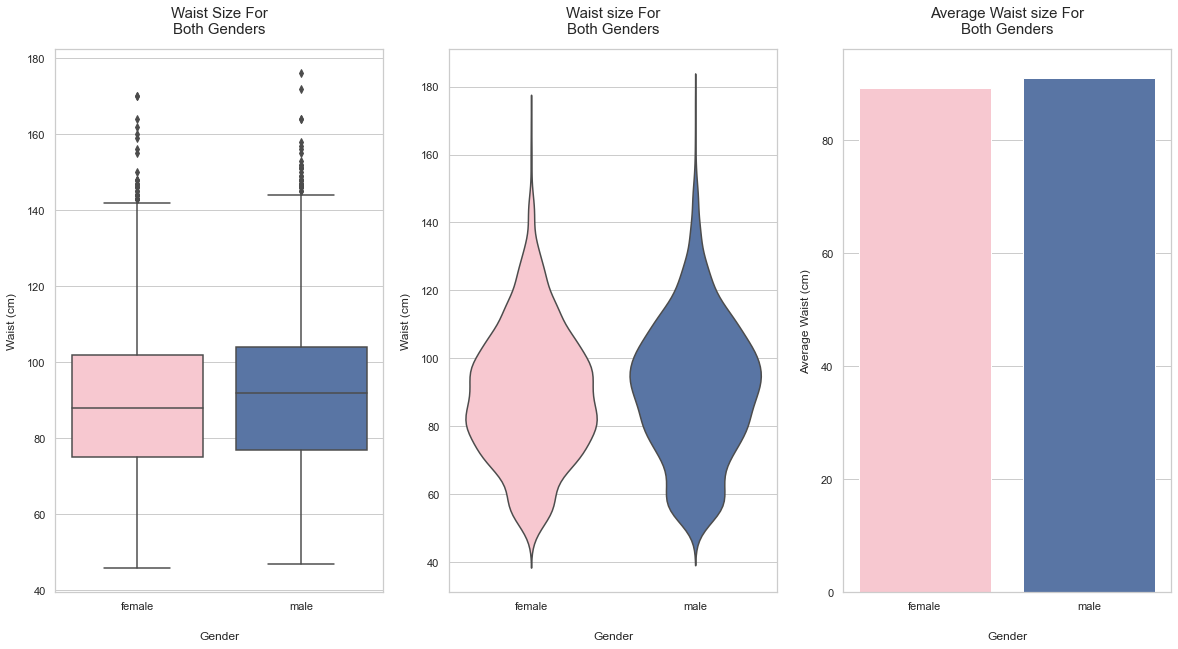

In [86]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,3,1)
sb.boxplot(data=df, x='gender', y='waist_cm', order=['female', 'male'], palette=['pink', 'b'])
plt.title('Waist Size For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Waist (cm)', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,3,2)
sb.violinplot(data=df, x='gender', y='waist_cm', inner=None, order=['female', 'male'], palette=['pink', 'b'])
plt.title('Waist size For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Waist (cm)', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,3,3)
sb.barplot(data=df, x='gender', y='waist_cm', errwidth=0, order=['female', 'male'], palette=['pink', 'b'])

plt.title('Average Waist size For\nBoth Genders', fontsize= 15, pad=15)
plt.xlabel('Gender', fontsize=12, labelpad=20)
plt.ylabel('Average Waist (cm)', fontsize=12, labelpad=10);

#### gender with drinks_day

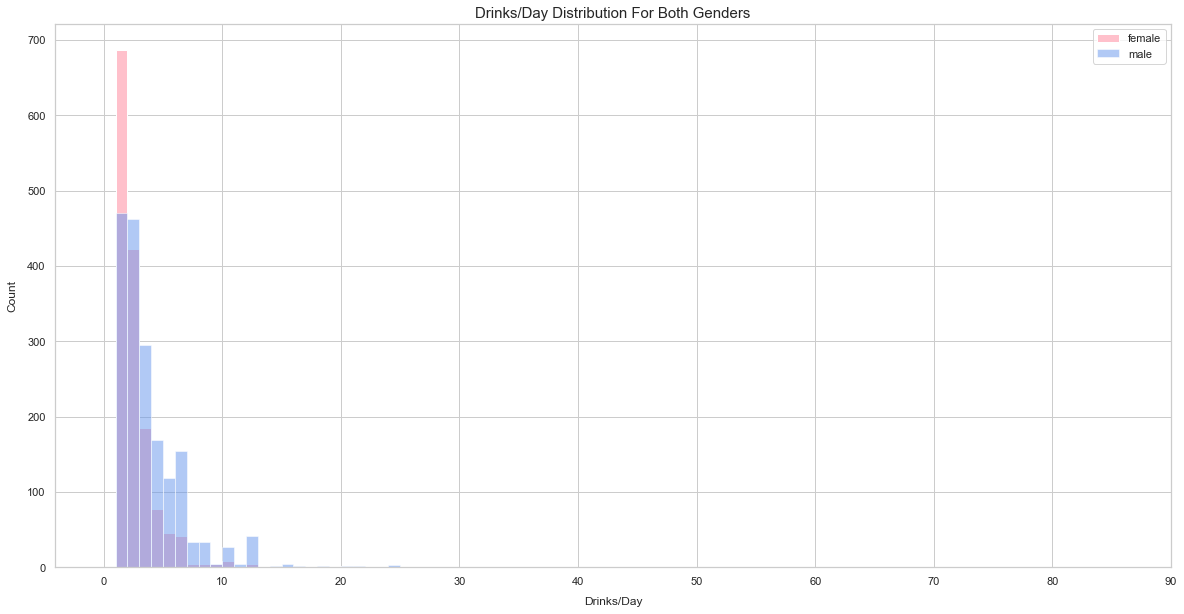

In [80]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
bins = np.arange(0, df.drinks_day.max()+1, 1)
ticks = np.arange(0, df.drinks_day.max()+10, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.hist(data=df[df.gender == 'female'], x='drinks_day', bins= bins, color='pink')
#_______________________________second plot____________________________________

plt.hist(data=df[df.gender == 'male'], x='drinks_day', bins= bins, color='cornflowerblue', alpha=.5)
plt.legend(['female','male']);

plt.xticks(ticks, labels)


plt.title('Drinks/Day Distribution For Both Genders', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Drinks/Day', labelpad=10);

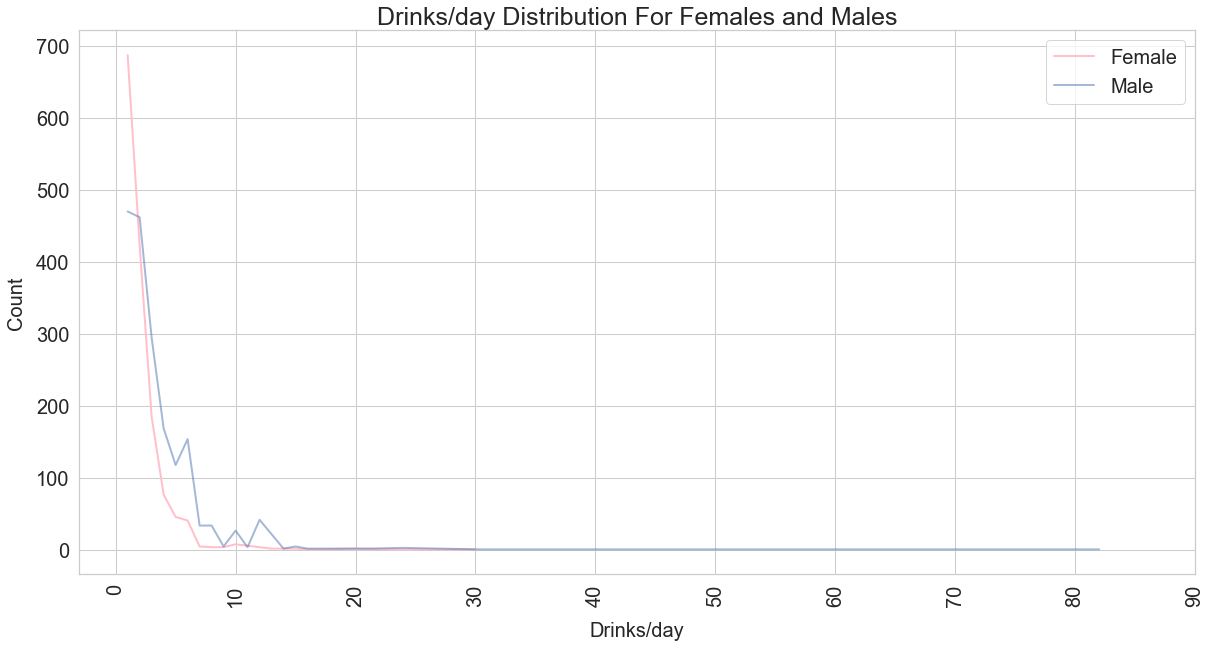

In [81]:
sb.set_theme(style="whitegrid")

df['drinks_day'][df.gender == 'female'].value_counts().sort_index().plot(kind='line', figsize=(20,10), 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='pink');
df['drinks_day'][df.gender == 'male'].value_counts().sort_index().plot(kind='line', figsize=(20,10),
                                                                  linewidth = '2', fontsize=20
                                                               , alpha =.5);

ticks = np.arange(0, df.drinks_day.max()+10, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)


plt.title('Drinks/day Distribution For Females and Males', fontsize= 25)
plt.xlabel('Drinks/day', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 20, labelpad=10)
plt.legend(['Female','Male'],fontsize=20);

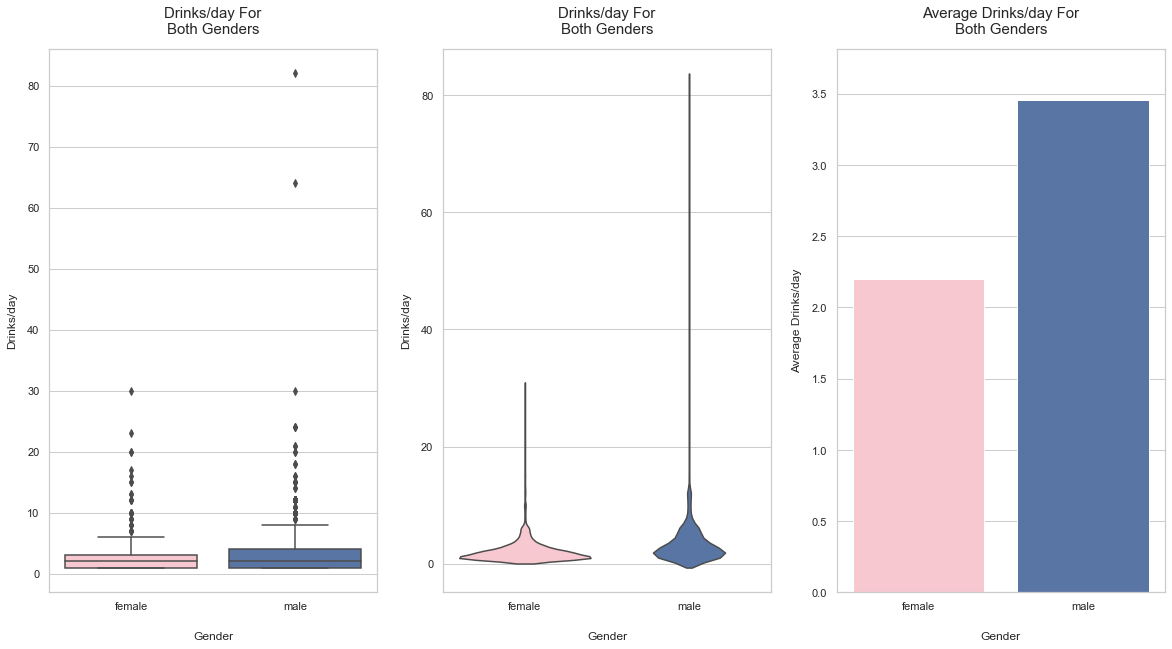

In [85]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

#_______________________________first plot____________________________________
plt.subplot(1,3,1)
sb.boxplot(data=df, x='gender', y='drinks_day', order=['female', 'male'], palette=['pink', 'b'])
plt.title('Drinks/day For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Drinks/day', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,3,2)
sb.violinplot(data=df, x='gender', y='drinks_day', inner=None, order=['female', 'male'], palette=['pink', 'b'])
plt.title('Drinks/day For\nBoth Genders', fontsize= 15, pad=15)
plt.ylabel('Drinks/day', fontsize=12, labelpad=10);
plt.xlabel('Gender', fontsize=12, labelpad=20)

#_______________________________second plot____________________________________
plt.subplot(1,3,3)
sb.barplot(data=df, x='gender', y='drinks_day', errwidth=0, order=['female', 'male'], palette=['pink', 'b'])

plt.title('Average Drinks/day For\nBoth Genders', fontsize= 15, pad=15)
plt.xlabel('Gender', fontsize=12, labelpad=20)
plt.ylabel('Average Drinks/day', fontsize=12, labelpad=10);

### Age

#### age with weight

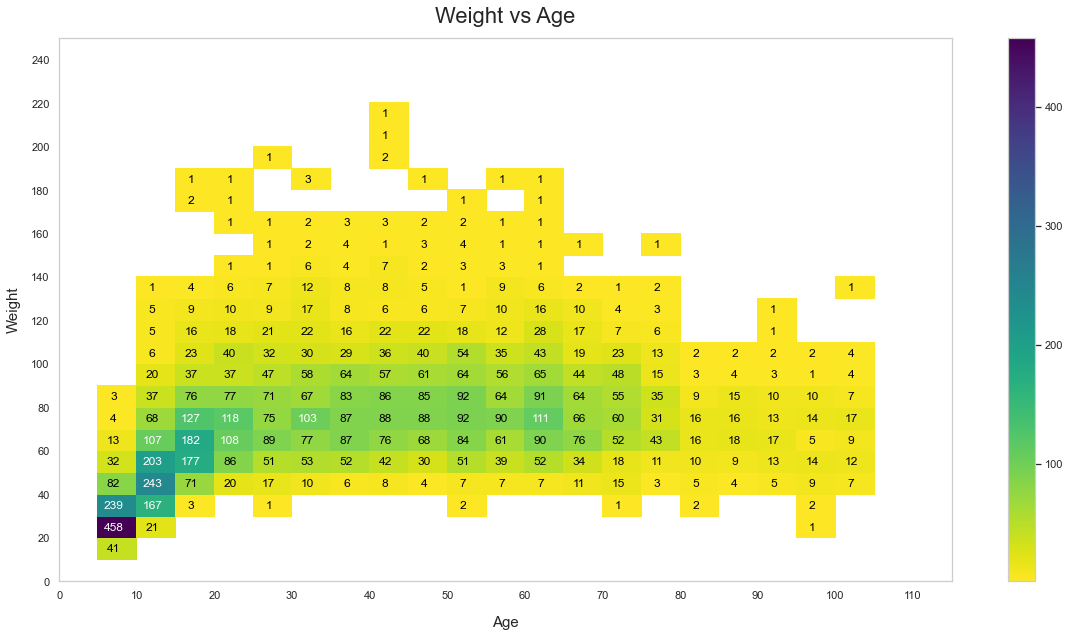

In [92]:
plt.figure(figsize=[20, 10])
sb.set_theme(style=None)

x_bins = np.arange(0, 120, 5)
y_bins = np.arange(0, 260, 10)

heat_map = plt.hist2d(data=df, x='age', y='weight_kg', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar()

counts = heat_map[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        
        c = counts[i,j]
        if c>= 100 :
            plt.text(x_bins[i]+2, y_bins[j]+5, int(c), ha='center', va='center', color='white');
            
        elif c>0 :
            plt.text(x_bins[i]+2, y_bins[j]+5, int(c), ha='center', va='center', color='black');
            

x_bins = np.arange(0, 120, 10)
labels_x = ['{:.0f}'.format(v) for v in x_bins]
y_bins = np.arange(0, 260, 20)
labels_y = ['{:.0f}'.format(v) for v in y_bins]
plt.xticks(x_bins, labels_x)
plt.yticks(y_bins, labels_y)

plt.title('Weight vs Age', fontsize= 22, pad=15)
plt.xlabel('Age', fontsize= 15, labelpad=15)
plt.ylabel('Weight', fontsize= 15, labelpad=10);

#### age with height

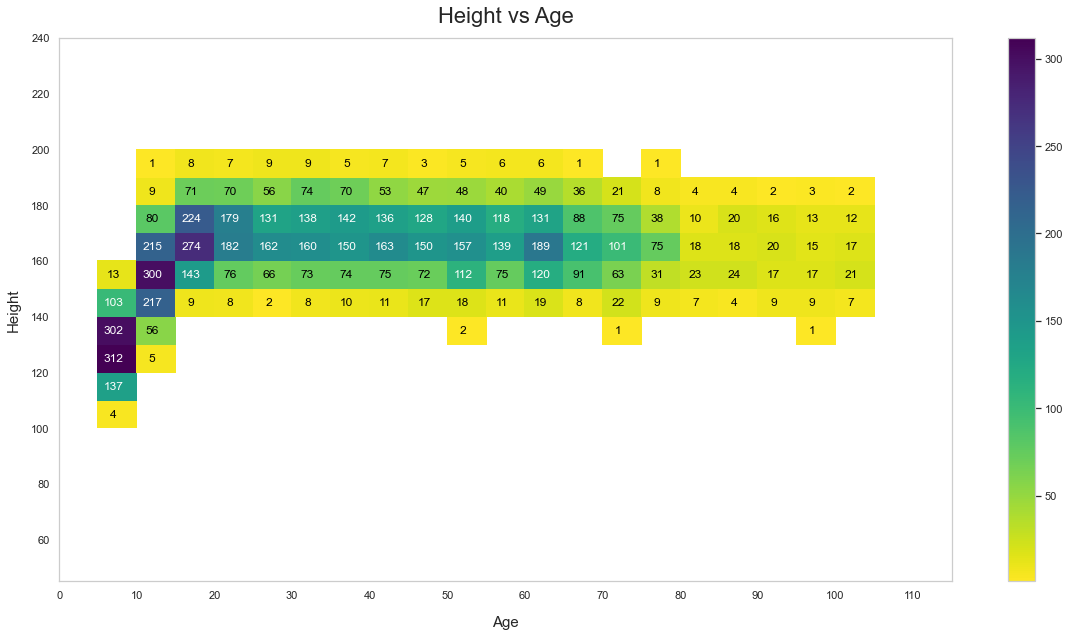

In [93]:
plt.figure(figsize=[20, 10])
sb.set_theme(style=None)

x_bins = np.arange(0, 120, 5)
y_bins = np.arange(0, 210, 10)

heat_map = plt.hist2d(data=df, x='age', y='height_cm', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar()

counts = heat_map[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        
        c = counts[i,j]
        if c>= 100 :
            plt.text(x_bins[i]+2, y_bins[j]+5, int(c), ha='center', va='center', color='white');
            
        elif c>0 :
            plt.text(x_bins[i]+2, y_bins[j]+5, int(c), ha='center', va='center', color='black');
            

x_bins = np.arange(0, 120, 10)
labels_x = ['{:.0f}'.format(v) for v in x_bins]
y_bins = np.arange(0, 260, 20)
labels_y = ['{:.0f}'.format(v) for v in y_bins]
plt.xticks(x_bins, labels_x)
plt.yticks(y_bins, labels_y)

plt.ylim(45,)

plt.title('Height vs Age', fontsize= 22, pad=15)
plt.xlabel('Age', fontsize= 15, labelpad=15)
plt.ylabel('Height', fontsize= 15, labelpad=10);

#### age with education

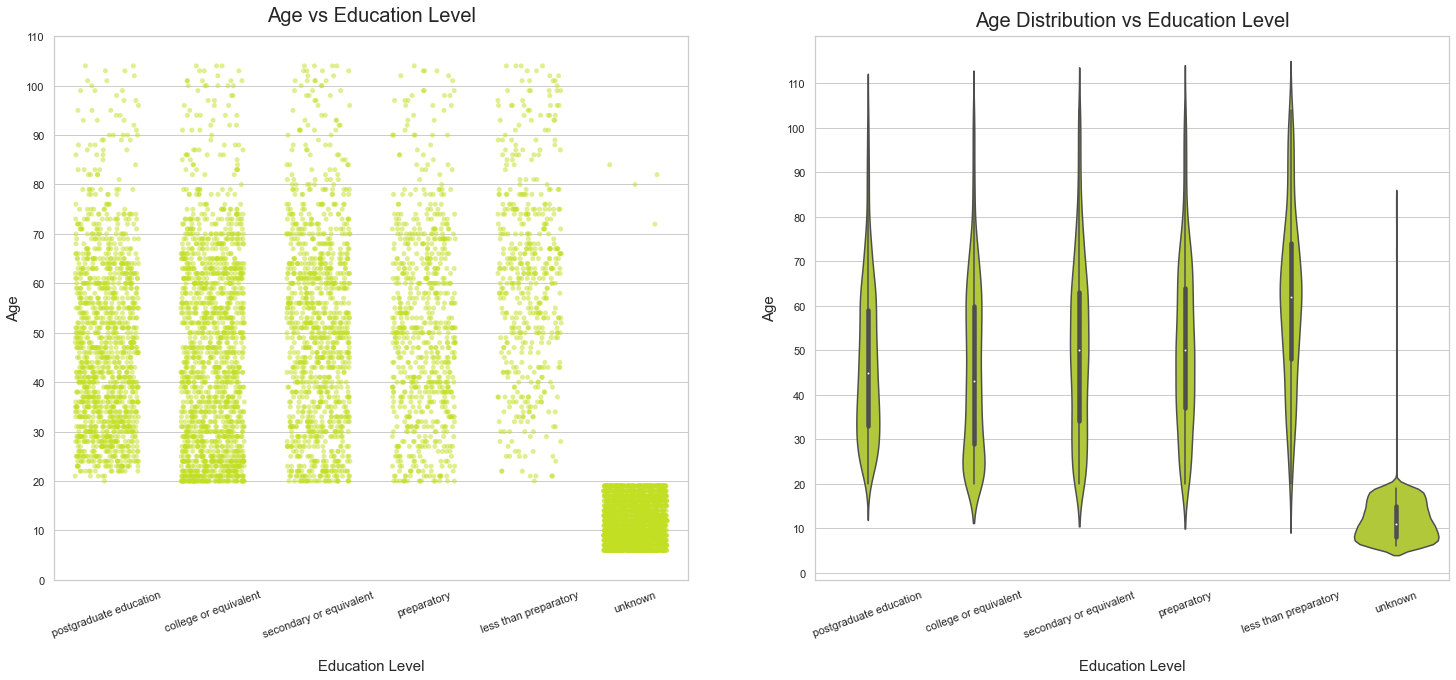

In [94]:
plt.figure(figsize=[25,10])
sb.set_theme(style="whitegrid")

plt.subplot(1,2,1)
sb.stripplot(x='education', y='age', data=df, jitter=0.3, color=sb.color_palette('viridis_r', 10)[0], alpha=.5)

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=20)

plt.title('Age vs Education Level', fontsize= 20, pad=15)
plt.xlabel('Education Level', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=5);

#_______________________________second plot____________________________________
plt.subplot(1,2,2)
sb.violinplot(data=df, x='education', y='age', color=sb.color_palette('viridis_r', 10)[0]) #color=sb.color_palette('viridis_r', 10)[0]

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=20)

plt.title('Age Distribution vs Education Level', fontsize= 20, pad=10)
plt.xlabel('Education Level', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);

#### age with marital

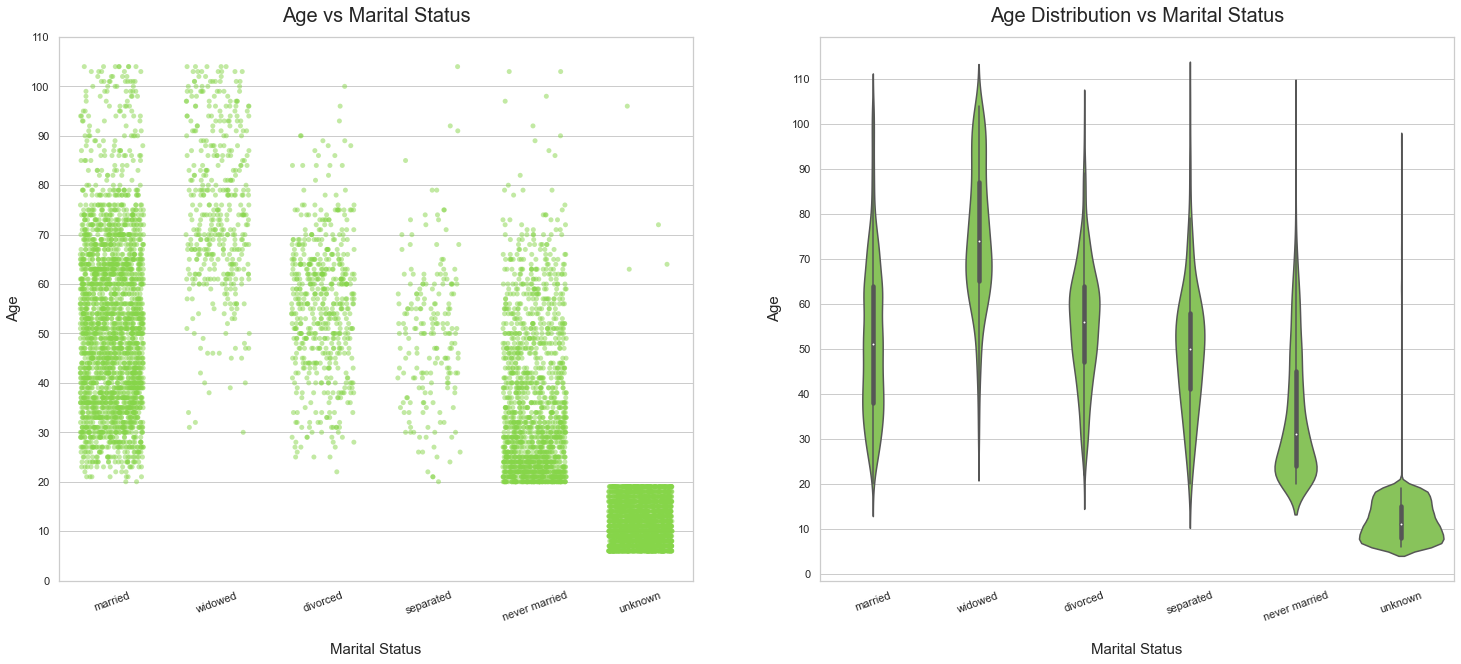

In [95]:
plt.figure(figsize=[25,10])
sb.set_theme(style="whitegrid")

plt.subplot(1,2,1)
sb.stripplot(x='marital', y='age', data=df, jitter=0.3, color=sb.color_palette('viridis_r', 10)[1], alpha=.5)

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=20)

plt.title('Age vs Marital Status', fontsize= 20, pad=15)
plt.xlabel('Marital Status', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);


plt.subplot(1,2,2)
sb.violinplot(data=df, x='marital', y='age', color=sb.color_palette('viridis_r', 10)[1]) #color=sb.color_palette('viridis_r', 10)[0]

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=20)

plt.title('Age Distribution vs Marital Status', fontsize= 20, pad=15)
plt.xlabel('Marital Status', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);

#### age with income

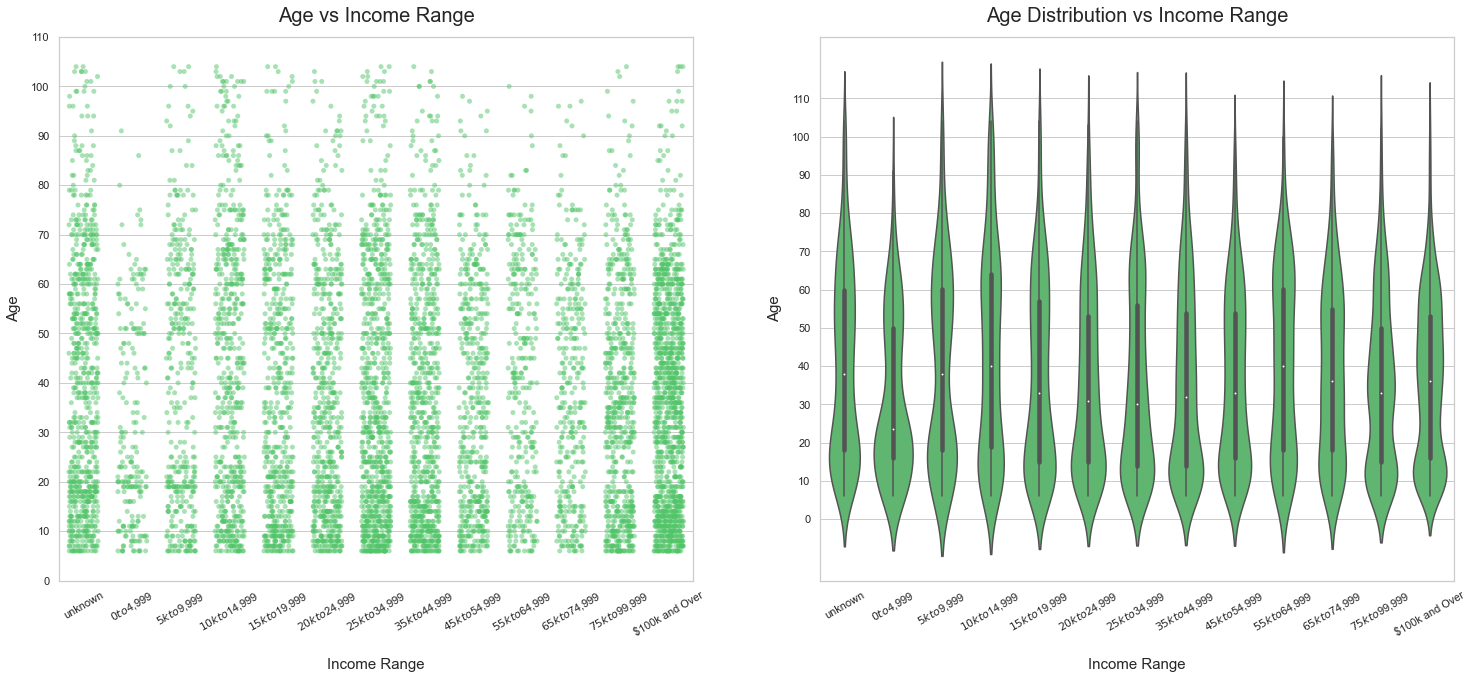

In [96]:
plt.figure(figsize=[25,10])
sb.set_theme(style="whitegrid")

plt.subplot(1,2,1)
sb.stripplot(x='income', y='age', data=df, jitter=0.3, color=sb.color_palette('viridis_r', 10)[2], alpha=.5)

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=30)

plt.title('Age vs Income Range', fontsize= 20, pad=15)
plt.xlabel('Income Range', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);


plt.subplot(1,2,2)
sb.violinplot(data=df, x='income', y='age', color=sb.color_palette('viridis_r', 10)[2]) #color=sb.color_palette('viridis_r', 10)[0]

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=30)

plt.title('Age Distribution vs Income Range', fontsize= 20, pad=15)
plt.xlabel('Income Range', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);

#### age with insurance

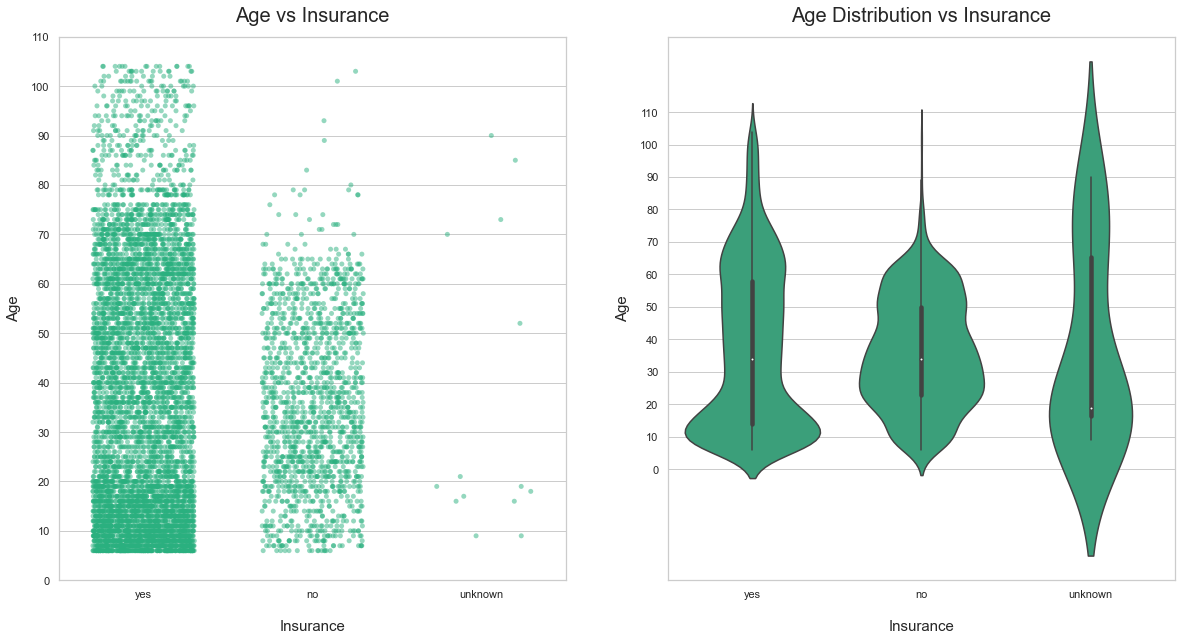

In [97]:
plt.figure(figsize=[20,10])
sb.set_theme(style="whitegrid")

plt.subplot(1,2,1)
sb.stripplot(x='insurance', y='age', data=df, jitter=0.3, color=sb.color_palette('viridis_r', 10)[3], alpha=.5)

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=0)

plt.title('Age vs Insurance', fontsize= 20, pad=15)
plt.xlabel('Insurance', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);


plt.subplot(1,2,2)
sb.violinplot(data=df, x='insurance', y='age', color=sb.color_palette('viridis_r', 10)[3]) #color=sb.color_palette('viridis_r', 10)[0]

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=0)

plt.title('Age Distribution vs Insurance', fontsize= 20, pad=15)
plt.xlabel('Insurance', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);

#### age with general health

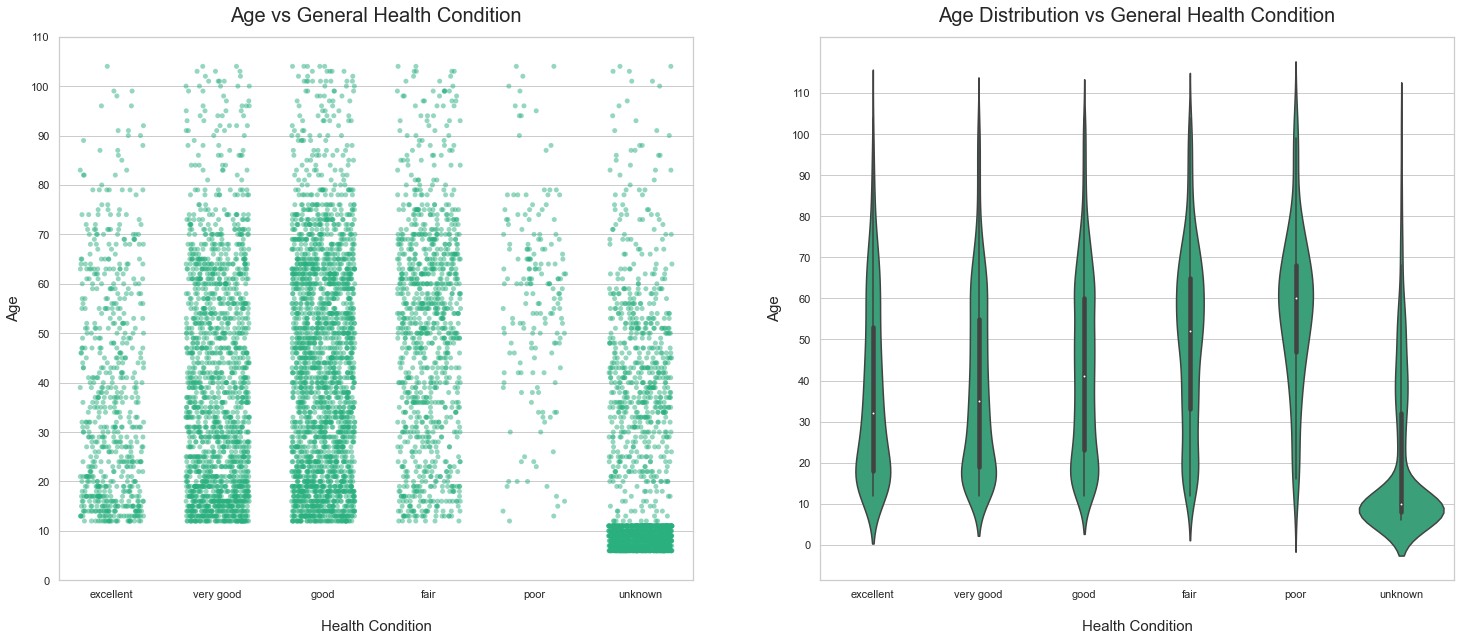

In [98]:
plt.figure(figsize=[25,10])
sb.set_theme(style="whitegrid")

plt.subplot(1,2,1)
sb.stripplot(x='gen_health', y='age', data=df, jitter=0.3, color=sb.color_palette('viridis_r', 10)[3], alpha=.5)

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)

plt.title('Age vs General Health Condition', fontsize= 20, pad=15)
plt.xlabel('Health Condition', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);


plt.subplot(1,2,2)
sb.violinplot(data=df, x='gen_health', y='age', color=sb.color_palette('viridis_r', 10)[3]) 
ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)

plt.title('Age Distribution vs General Health Condition', fontsize= 20, pad=15)
plt.xlabel('Health Condition', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);

#### age with smoker

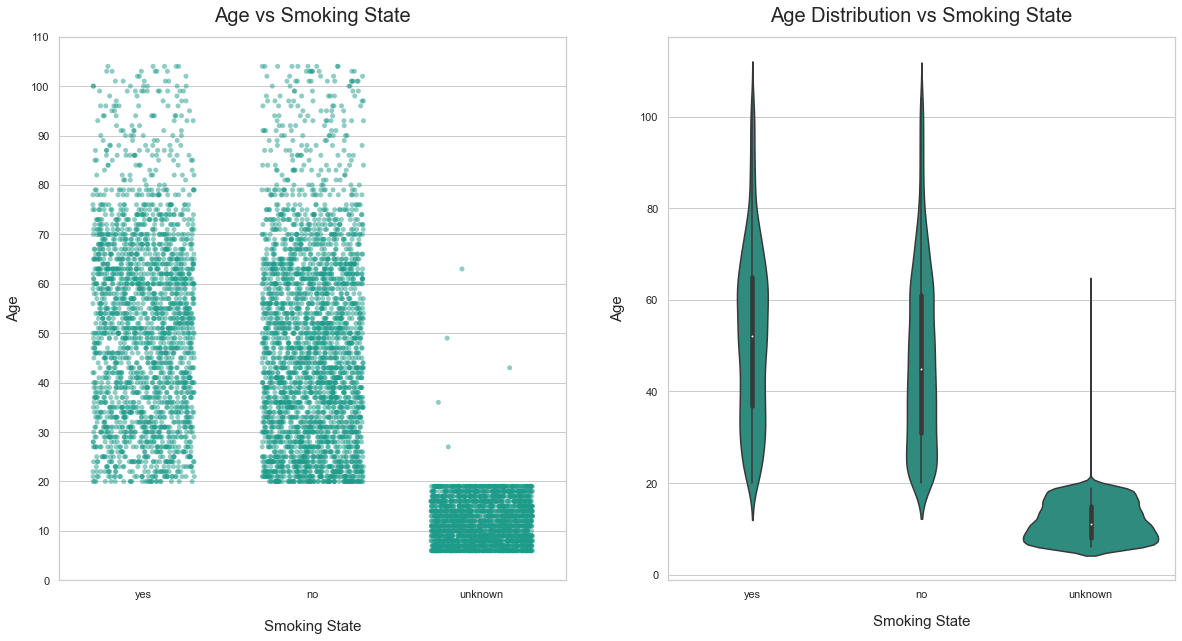

In [99]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

plt.subplot(1,2,1)
sb.stripplot(x='smoker', y='age', data=df, jitter=0.3, color=sb.color_palette('viridis_r', 10)[4], alpha=.5)

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=0)

plt.title('Age vs Smoking State', fontsize= 20, pad=15)
plt.xlabel('Smoking State', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);


plt.subplot(1,2,2)
sb.violinplot(data=df, x='smoker', y='age', color=sb.color_palette('viridis_r', 10)[4])

plt.title('Age Distribution vs Smoking State', fontsize= 20, pad=15)
plt.xlabel('Smoking State', fontsize= 15, labelpad=15)
plt.ylabel('Age', fontsize= 15, labelpad=15);

#### age with days active

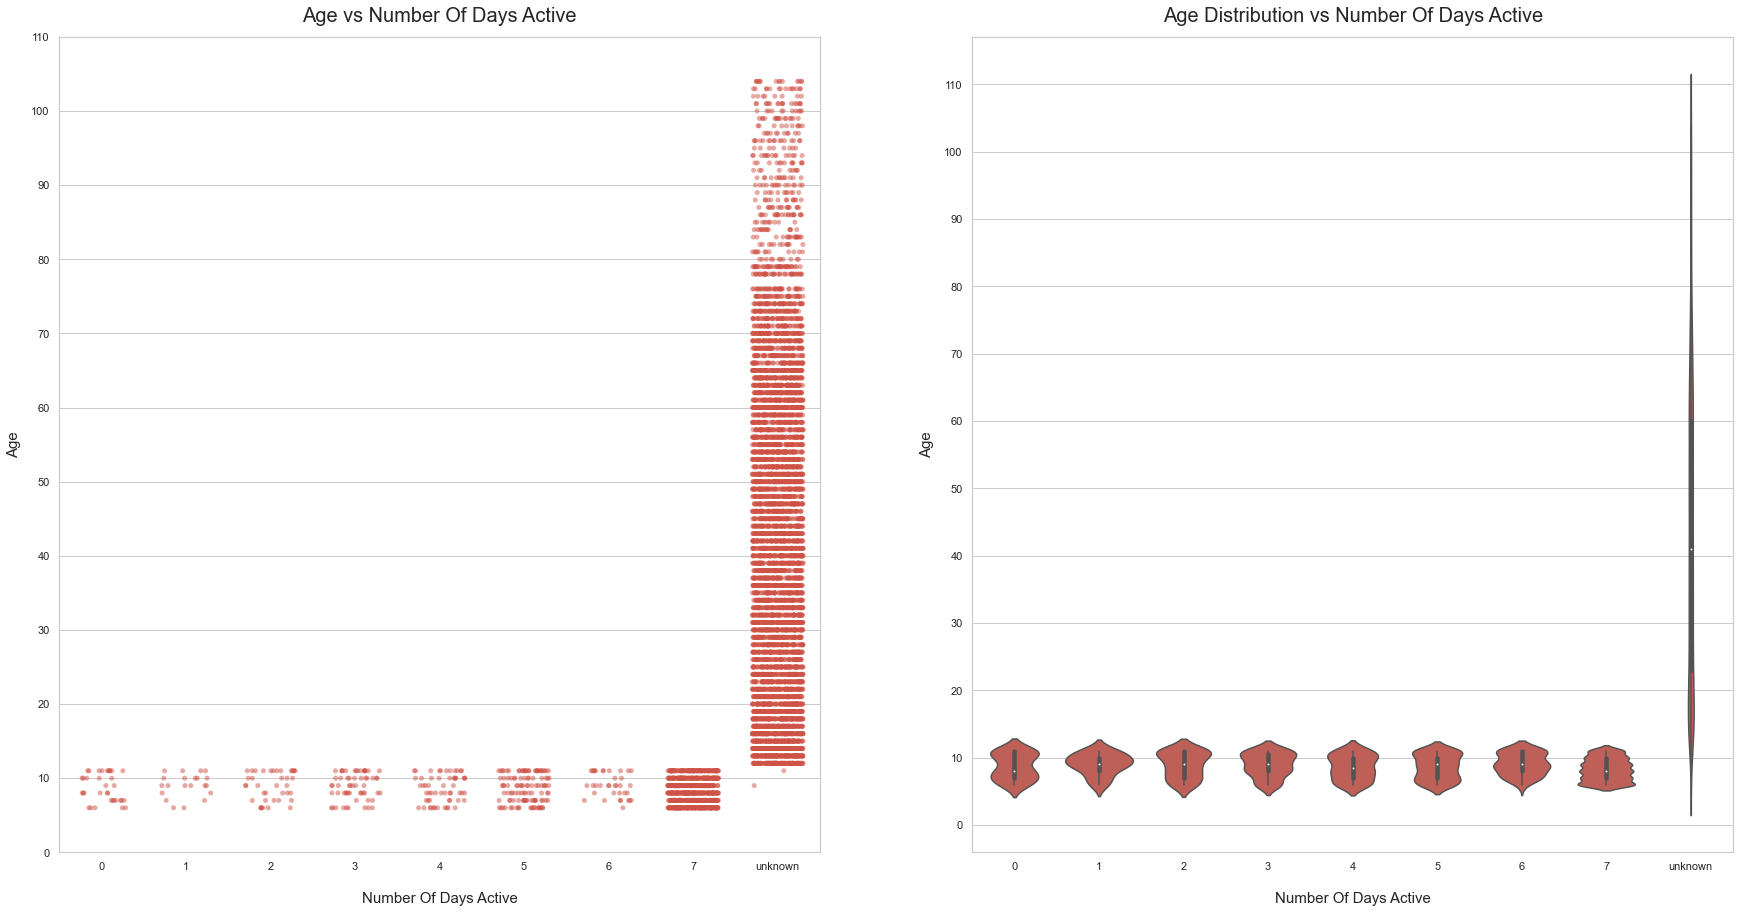

In [100]:
plt.figure(figsize=[30, 15])
sb.set_theme(style="whitegrid")

plt.subplot(1,2,1)
sb.stripplot(x='days_active', y='age', data=df, jitter=0.3, color=sb.color_palette('RdBu', 10)[1], alpha=.5)

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=0)

plt.title('Age vs Number Of Days Active', fontsize= 20, pad=15)
plt.xlabel('Number Of Days Active', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);


plt.subplot(1,2,2)
sb.violinplot(data=df, x='days_active', y='age', color=sb.color_palette('RdBu', 10)[1])

ticks = np.arange(0, 120, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=0)

plt.title('Age Distribution vs Number Of Days Active', fontsize= 20, pad=15)
plt.xlabel('Number Of Days Active', fontsize= 15, labelpad=20)
plt.ylabel('Age', fontsize= 15, labelpad=10);

#### age with BMI

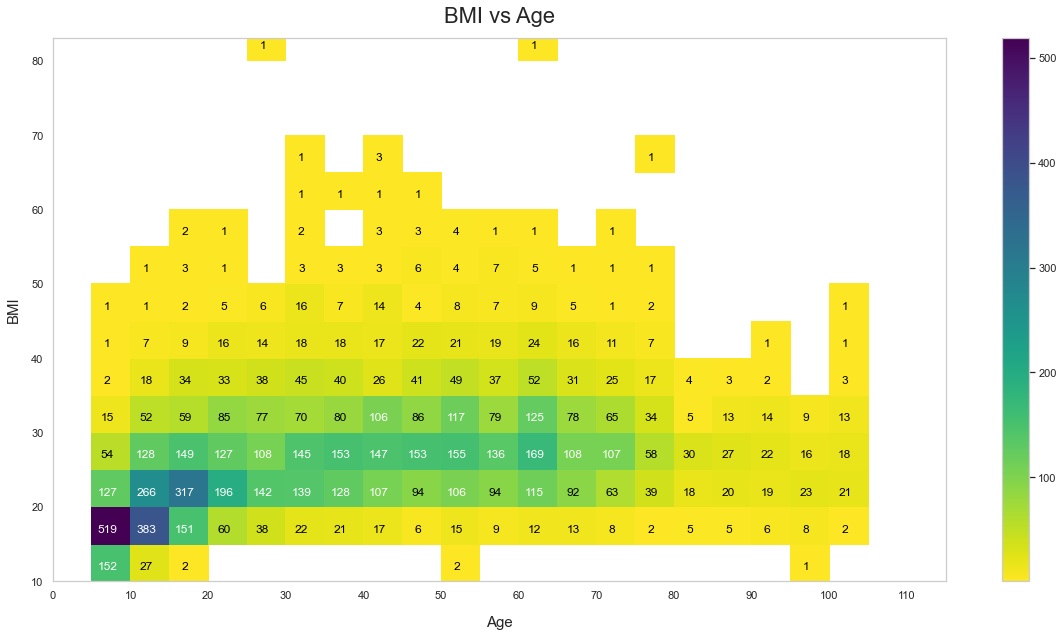

In [101]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

x_bins = np.arange(0, 120, 5)
y_bins = np.arange(10, 110, 5)

heat_map = plt.hist2d(data=df, x='age', y='bmi', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar()

counts = heat_map[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        
        c = counts[i,j]
        if c>= 100 :
            plt.text(x_bins[i]+2, y_bins[j]+2, int(c), ha='center', va='center', color='white');
            
        elif c>0 :
            plt.text(x_bins[i]+2, y_bins[j]+2, int(c), ha='center', va='center', color='black');
            

x_bins = np.arange(0, 120, 10)
labels_x = ['{:.0f}'.format(v) for v in x_bins]
y_bins = np.arange(10, df.bmi.max()+5, 10)
labels_y = ['{:.0f}'.format(v) for v in y_bins]
plt.xticks(x_bins, labels_x)
plt.yticks(y_bins, labels_y)
plt.ylim(10, df.bmi.max()+1)

plt.title('BMI vs Age', fontsize= 22, pad=15)
plt.xlabel('Age', fontsize= 15, labelpad=15)
plt.ylabel('BMI', fontsize= 15, labelpad=10);

#### age with Waist circumference

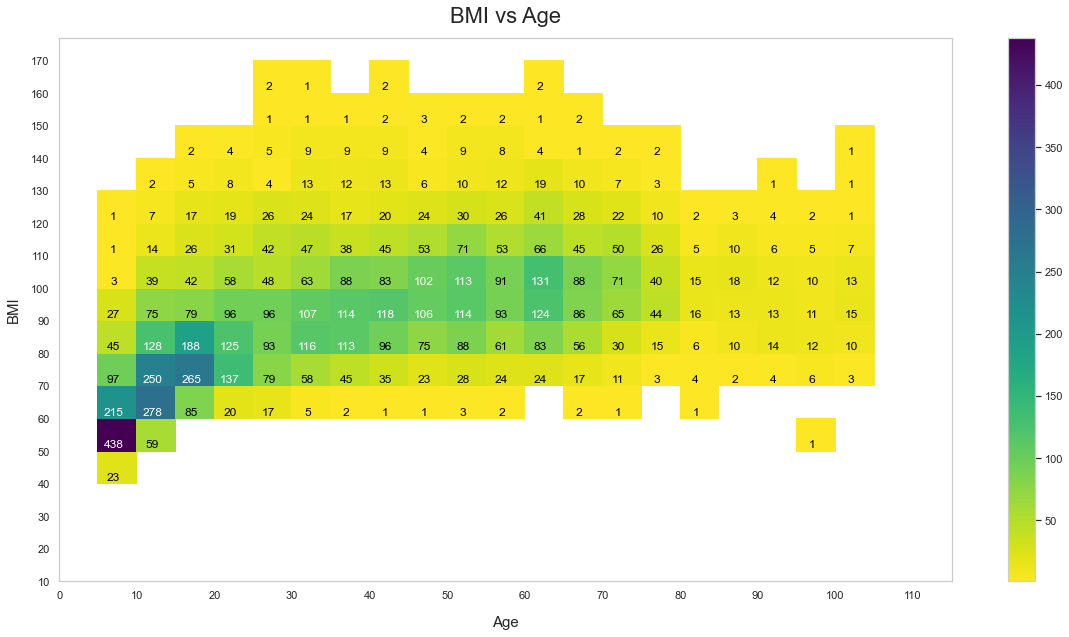

In [102]:
plt.figure(figsize=[20, 10])
sb.set_theme(style="whitegrid")

x_bins = np.arange(0, 120, 5)
y_bins = np.arange(0, 180, 10)

heat_map = plt.hist2d(data=df, x='age', y='waist_cm', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar()

counts = heat_map[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        
        c = counts[i,j]
        if c>= 100 :
            plt.text(x_bins[i]+2, y_bins[j]+2, int(c), ha='center', va='center', color='white');
            
        elif c>0 :
            plt.text(x_bins[i]+2, y_bins[j]+2, int(c), ha='center', va='center', color='black');
            

x_bins = np.arange(0, 120, 10)
labels_x = ['{:.0f}'.format(v) for v in x_bins]
y_bins = np.arange(10, df.waist_cm.max()+5, 10)
labels_y = ['{:.0f}'.format(v) for v in y_bins]
plt.xticks(x_bins, labels_x)
plt.yticks(y_bins, labels_y)
plt.ylim(10, df.waist_cm.max()+1)

plt.title('BMI vs Age', fontsize= 22, pad=15)
plt.xlabel('Age', fontsize= 15, labelpad=15)
plt.ylabel('BMI', fontsize= 15, labelpad=10);

#### age with drinks day

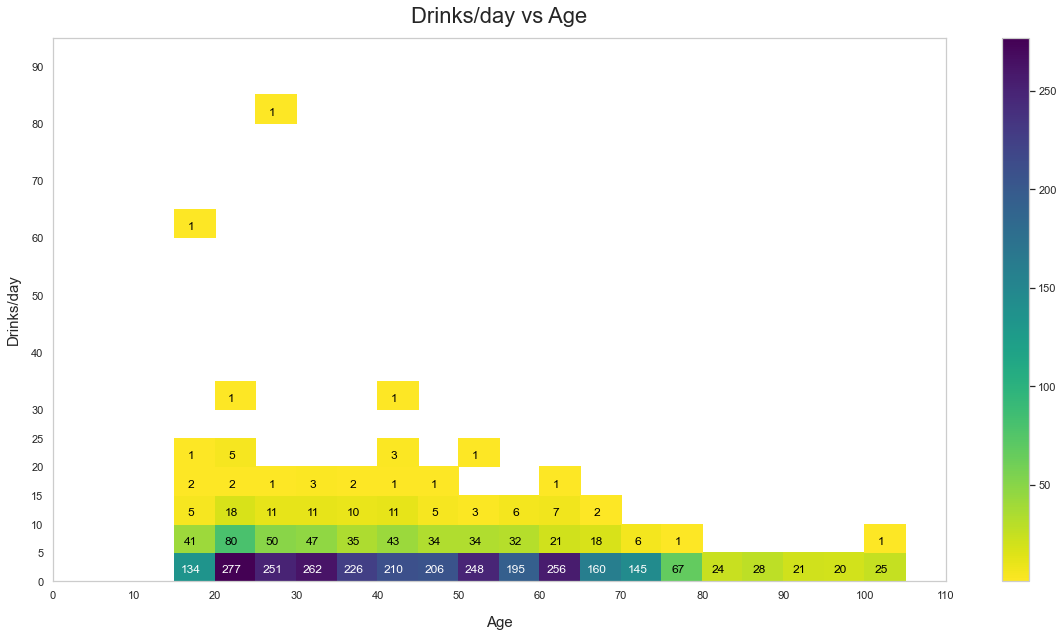

In [103]:
plt.figure(figsize=[20, 10])
#sb.set_theme(style='whitegrid')

x_bins = np.arange(0, 110, 5)
y_bins = np.arange(0, 100, 5)

heat_map = plt.hist2d(data=df, x='age', y='drinks_day', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar()

counts = heat_map[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        
        c = counts[i,j]
        if c>= 100 :
            plt.text(x_bins[i]+2, y_bins[j]+2, int(c), ha='center', va='center', color='white');
            
        elif c>0 :
            plt.text(x_bins[i]+2, y_bins[j]+2, int(c), ha='center', va='center', color='black');
            

x_bins = np.arange(0, 120, 10)
labels_x = ['{:.0f}'.format(v) for v in x_bins]
y_bins = [0,5,10,15,20,25,30,40,50,60,70,80,90]
labels_y = ['{:.0f}'.format(v) for v in y_bins]
plt.xticks(x_bins, labels_x)
plt.yticks(y_bins, labels_y)

plt.title('Drinks/day vs Age', fontsize= 22, pad=15)
plt.xlabel('Age', fontsize= 15, labelpad=15)
plt.ylabel('Drinks/day', fontsize= 15, labelpad=10);

### General relations between personal numeric features:

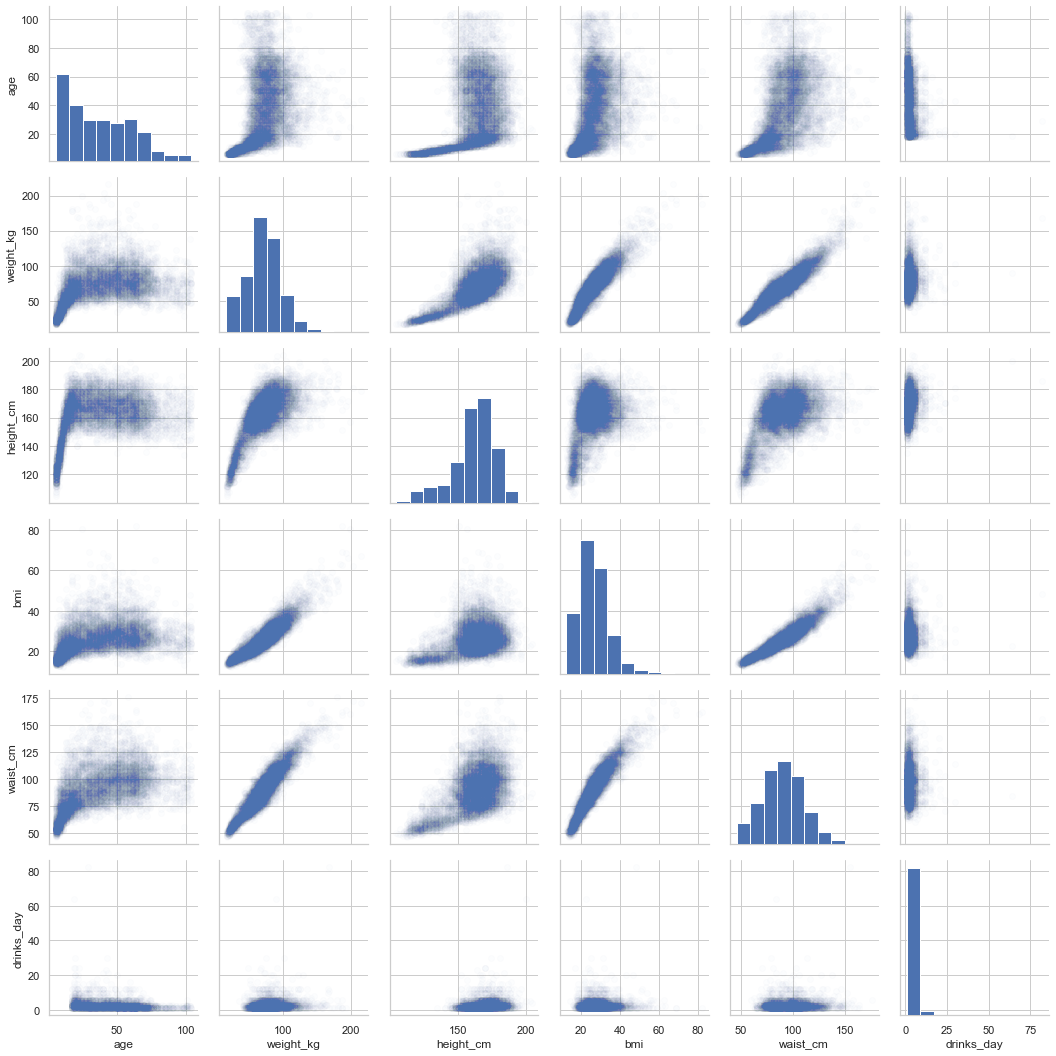

In [104]:
sb.set_theme(style=None)

personal_features = ['age', 'weight_kg', 'height_cm', 'bmi','waist_cm', 'drinks_day']
g = sb.PairGrid(data=df, vars=personal_features)
g.map_offdiag(plt.scatter, alpha=.01)
g.map_diag(plt.hist);

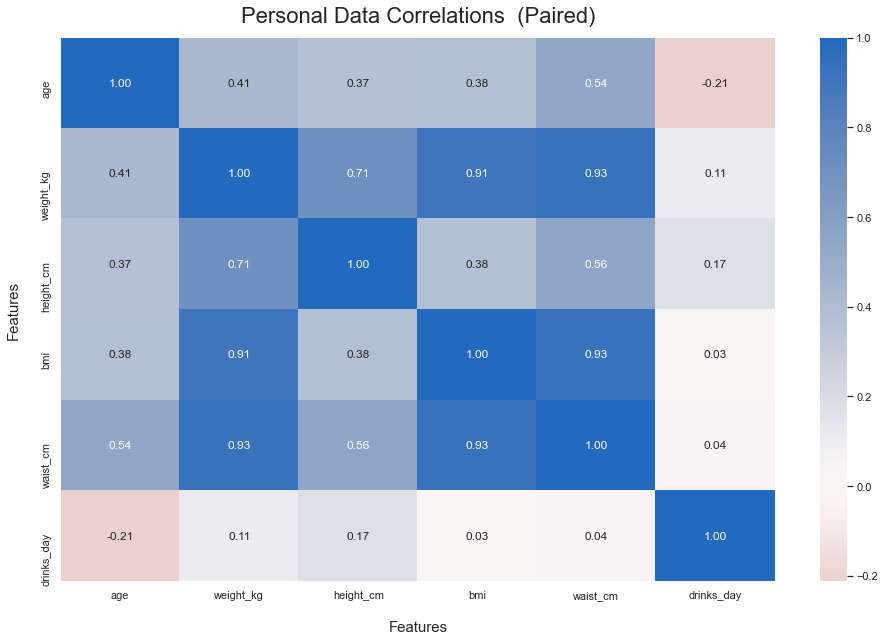

In [105]:
plt.figure(figsize= [16,10])

personal_features = ['age', 'weight_kg', 'height_cm', 'bmi','waist_cm', 'drinks_day']
correlations = df[personal_features].corr()

sb.heatmap(correlations, cmap='vlag_r', annot=True, fmt='.2f', center = 0)

plt.title('Personal Data Correlations  (Paired)', fontsize= 22, pad=15)
plt.xlabel('Features', fontsize= 15, labelpad=20)
plt.ylabel('Features', fontsize= 15, labelpad=20);

## 3- Multivariate personal data analytics

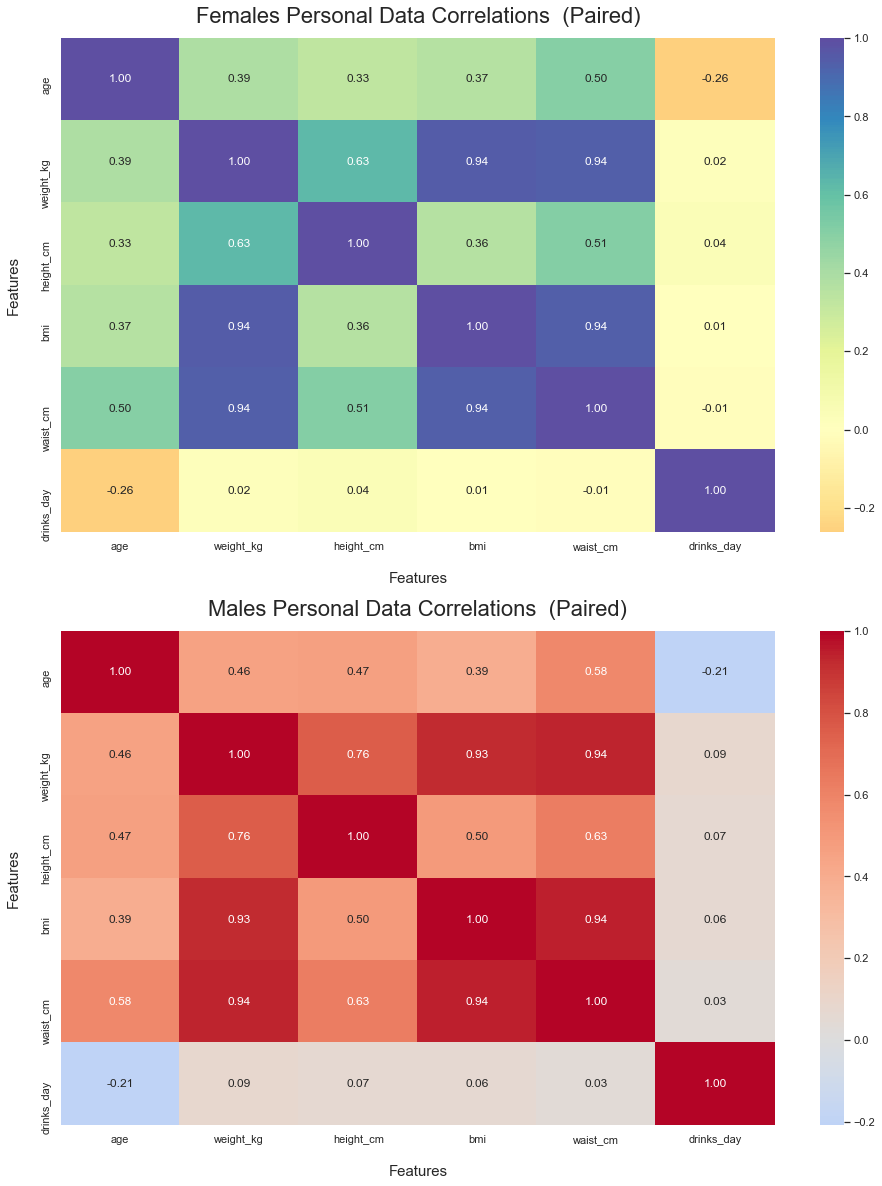

In [106]:
plt.figure(figsize= [16, 20])

personal_features = ['age', 'weight_kg', 'height_cm', 'bmi','waist_cm', 'drinks_day']

plt.subplot(2,1,1)
correlations = df[df.gender == 'female'][personal_features].corr()
sb.heatmap(correlations, cmap='Spectral', annot=True, fmt='.2f', center = 0)

plt.title('Females Personal Data Correlations  (Paired)', fontsize= 22, pad=15)
plt.xlabel('Features', fontsize= 15, labelpad=20)
plt.ylabel('Features', fontsize= 15, labelpad=20);

plt.subplot(2,1,2)
correlations = df[df.gender == 'male'][personal_features].corr()
sb.heatmap(correlations, cmap='coolwarm', annot=True, fmt='.2f', center = 0)

plt.title('Males Personal Data Correlations  (Paired)', fontsize= 22, pad=15)
plt.xlabel('Features', fontsize= 15, labelpad=20)
plt.ylabel('Features', fontsize= 15, labelpad=20);

### (3 cat, 0 num) : (gender, education, gen_health)

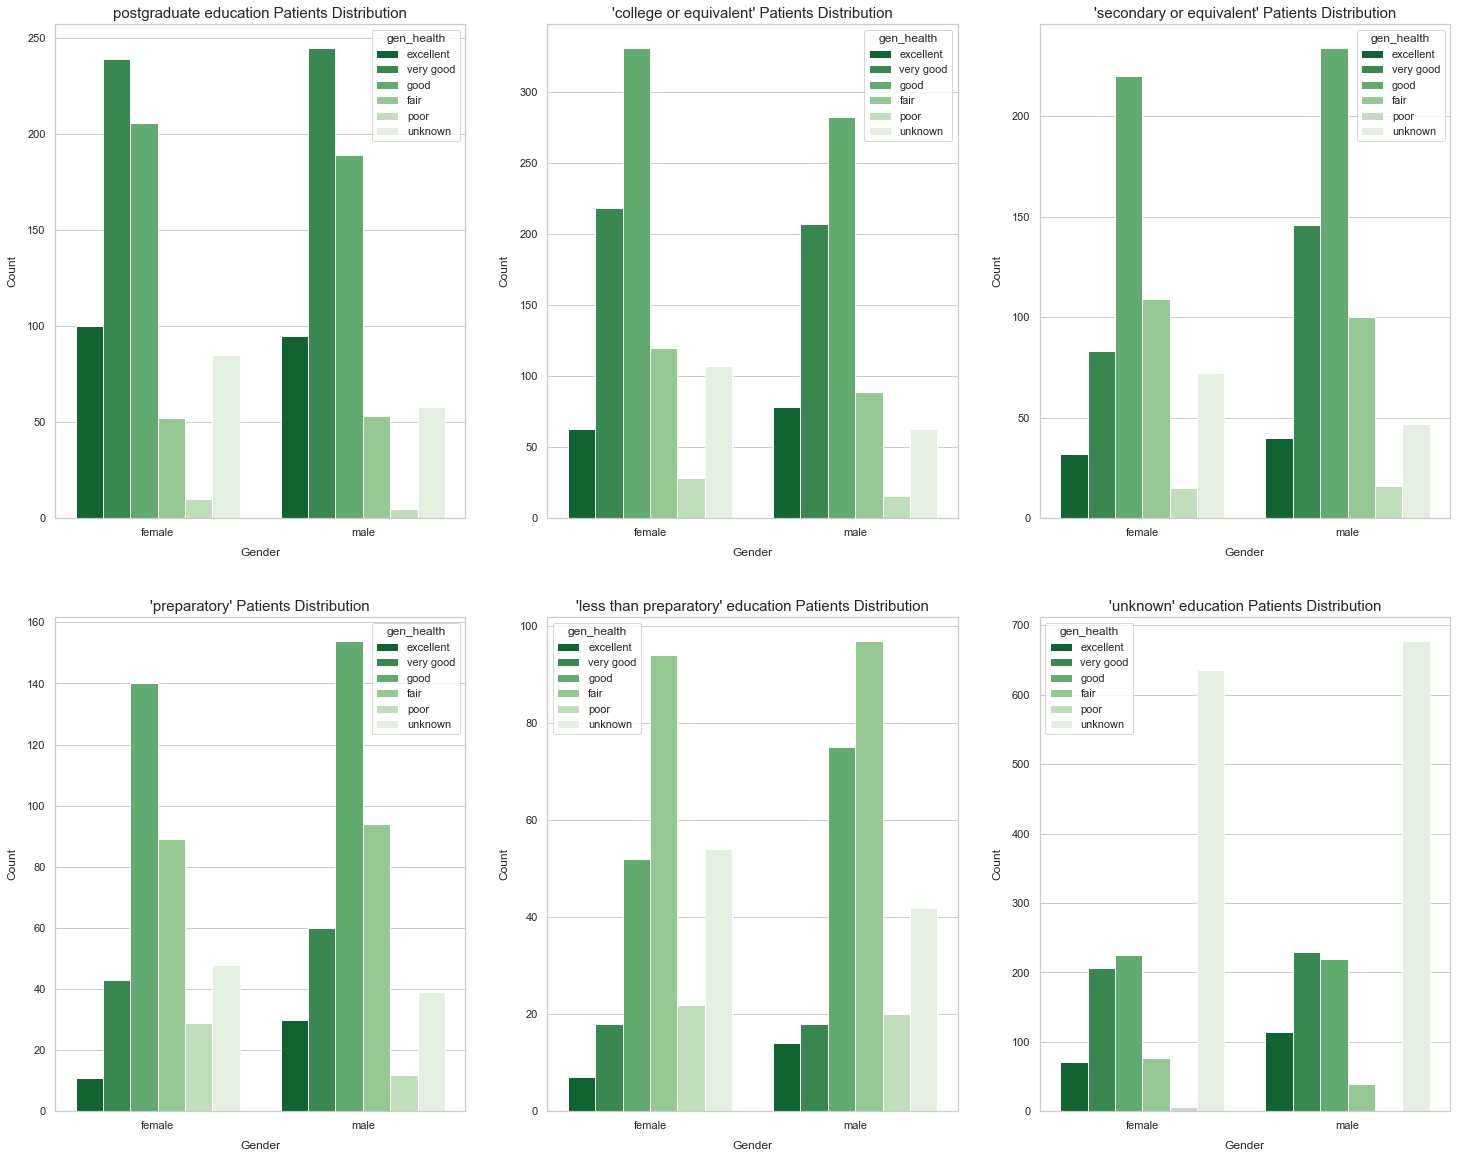

In [107]:
plt.figure(figsize=[25, 20])
sb.set_theme(style='whitegrid')

plt.subplot(2,3,1)
sb.countplot(data=df[(df.education == 'postgraduate education')], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='Greens_r')

plt.xticks(rotation=0)
plt.title("postgraduate education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(2,3,2)
sb.countplot(data=df[df.education == 'college or equivalent'], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='Greens_r')

plt.xticks(rotation=0)
plt.title("'college or equivalent' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(2,3,3)
sb.countplot(data=df[df.education == 'secondary or equivalent'], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='Greens_r')

plt.xticks(rotation=0)
plt.title("'secondary or equivalent' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(2,3,4)
sb.countplot(data=df[df.education == 'preparatory'], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='Greens_r')

plt.xticks(rotation=0)
plt.title("'preparatory' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(2,3,5)
sb.countplot(data=df[df.education == 'less than preparatory'], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='Greens_r')

plt.xticks(rotation=0)
plt.title("'less than preparatory' education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(2,3,6)
sb.countplot(data=df[df.education == 'unknown'], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='Greens_r')

plt.xticks(rotation=0)
plt.title("'unknown' education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

### (2 cat, 1 num) : (gender, gen_health, age)

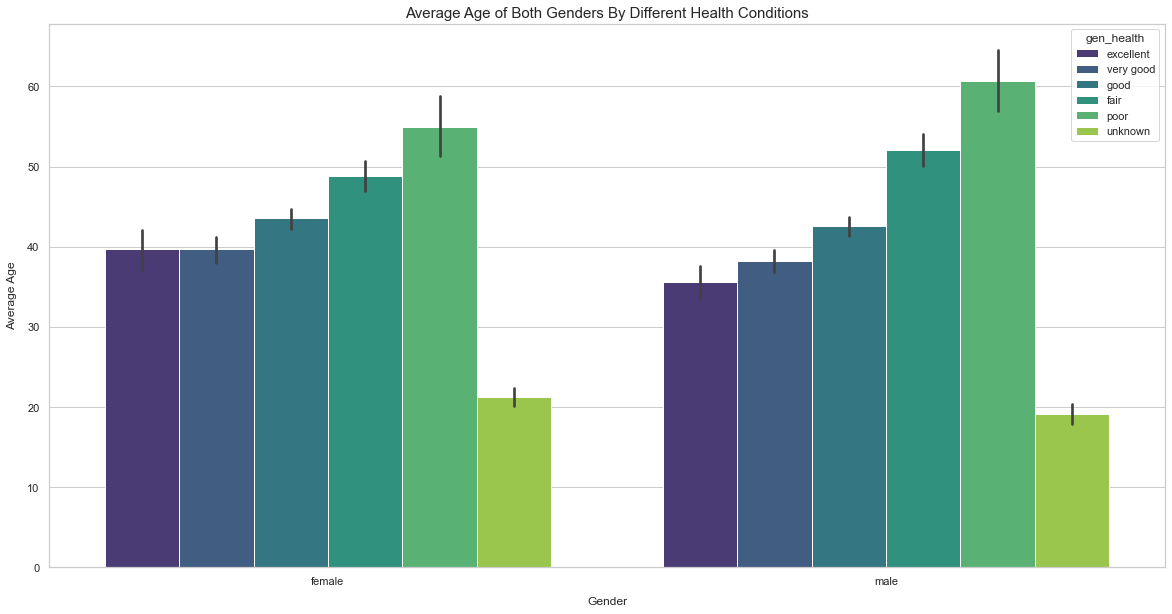

In [108]:
plt.figure(figsize=[20,10])

sb.barplot(data=df, x='gender', order=['female', 'male'], y='age', hue='gen_health', palette='viridis', alpha=1)

plt.title('Average Age of Both Genders By Different Health Conditions', fontsize= 15)
plt.ylabel('Average Age', labelpad=10)
plt.xlabel('Gender', labelpad=10);

### (1 cat, 2 num) : (gen_health, age, bmi)

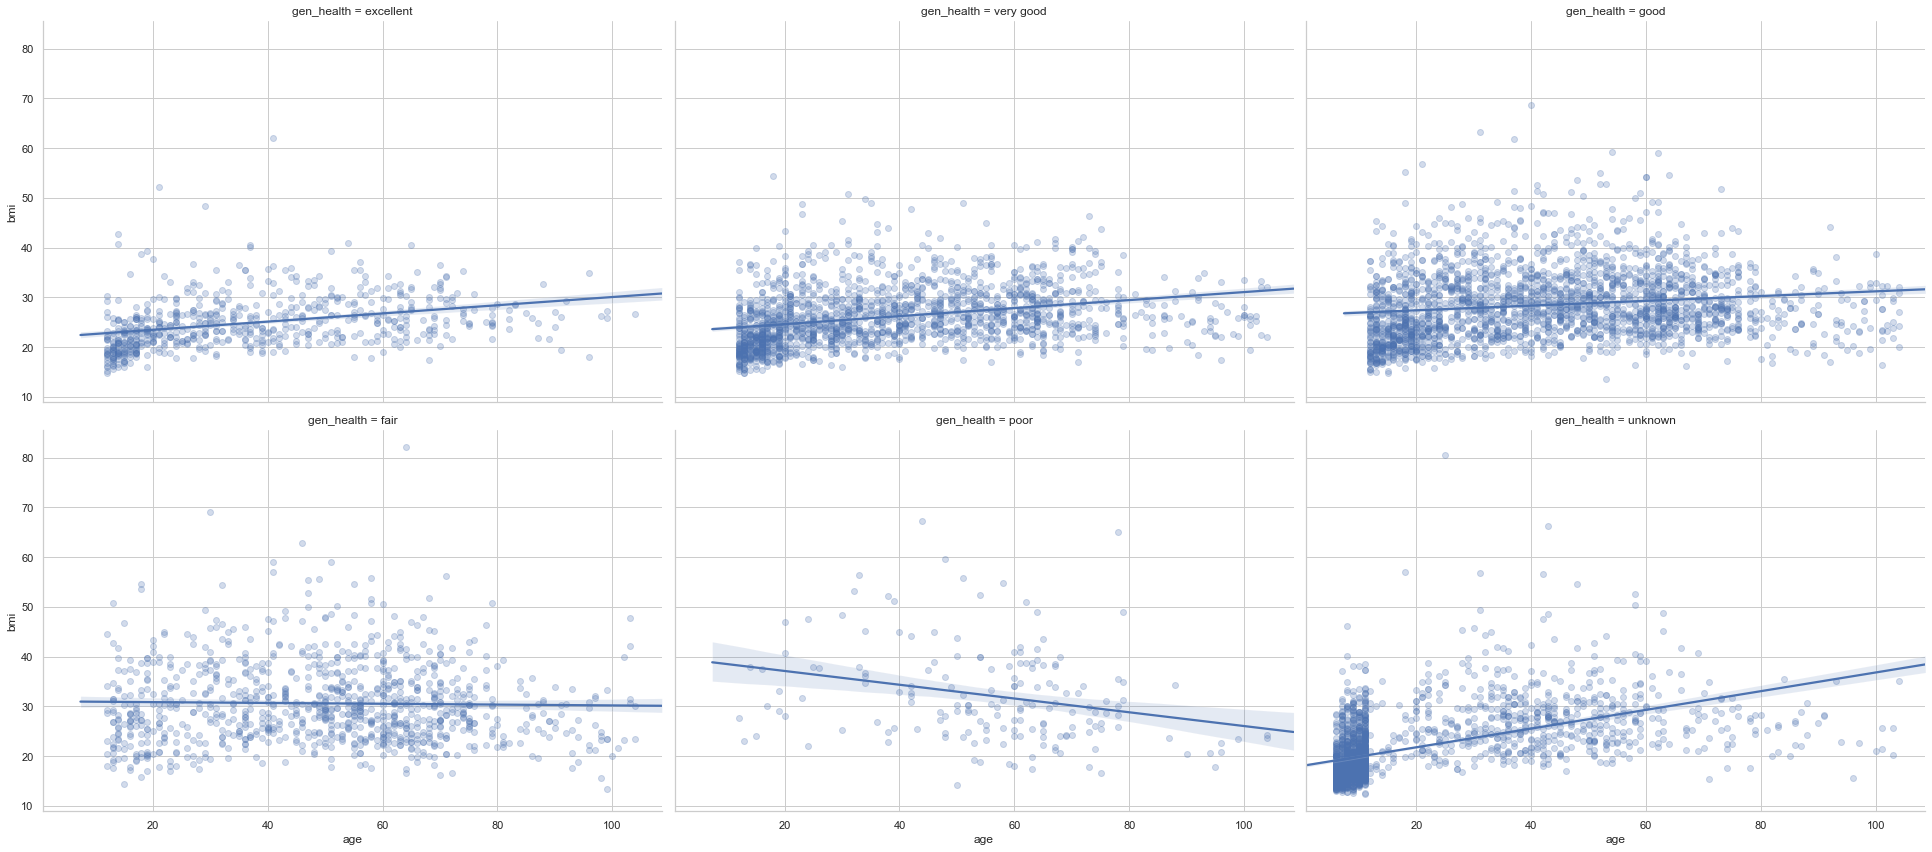

In [109]:
g = sb.FacetGrid(data=df, col='gen_health', 
                 col_order=['excellent', 'very good', 'good', 'fair', 'poor', 'unknown'], 
                 col_wrap=3, height=6, aspect=1.5)
g.map(sb.regplot, 'age', 'bmi', scatter_kws={'alpha':.25}, truncate=False);

### (0 cat, 3 num) : ( age, bmi, days_active)

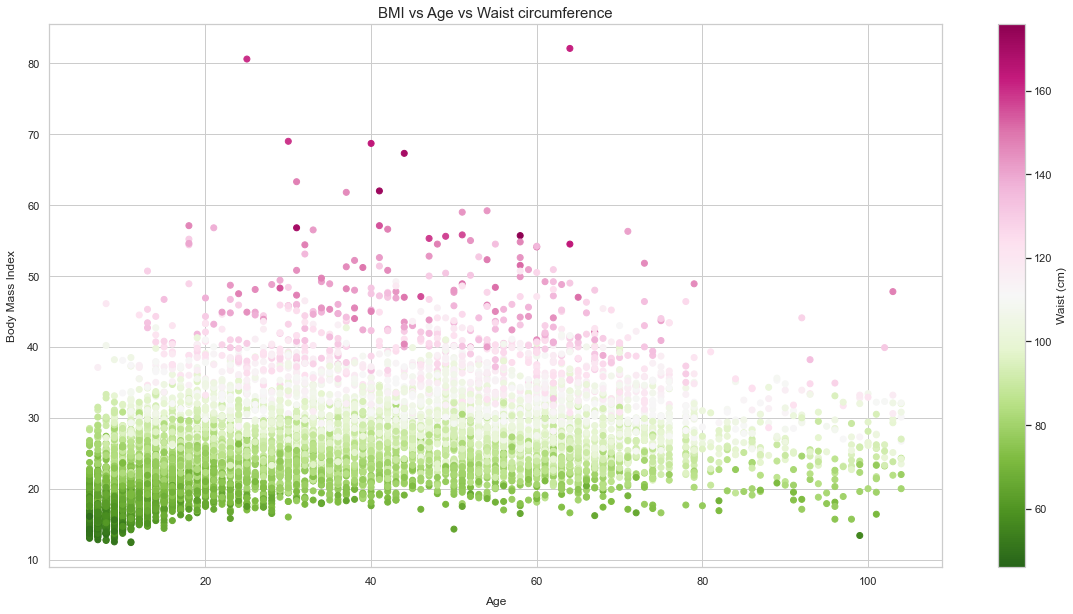

In [110]:
plt.figure(figsize=[20, 10])
plt.scatter(data=df, x='age', y='bmi', c='waist_cm', cmap='PiYG_r', alpha=1)
plt.colorbar(label='Waist (cm)');

plt.title('BMI vs Age vs Waist circumference', fontsize= 15)
plt.ylabel('Body Mass Index', labelpad=10)
plt.xlabel('Age', labelpad=10);

### (4 cat, 0 num) : ( gender, education, gen_health, smoker)

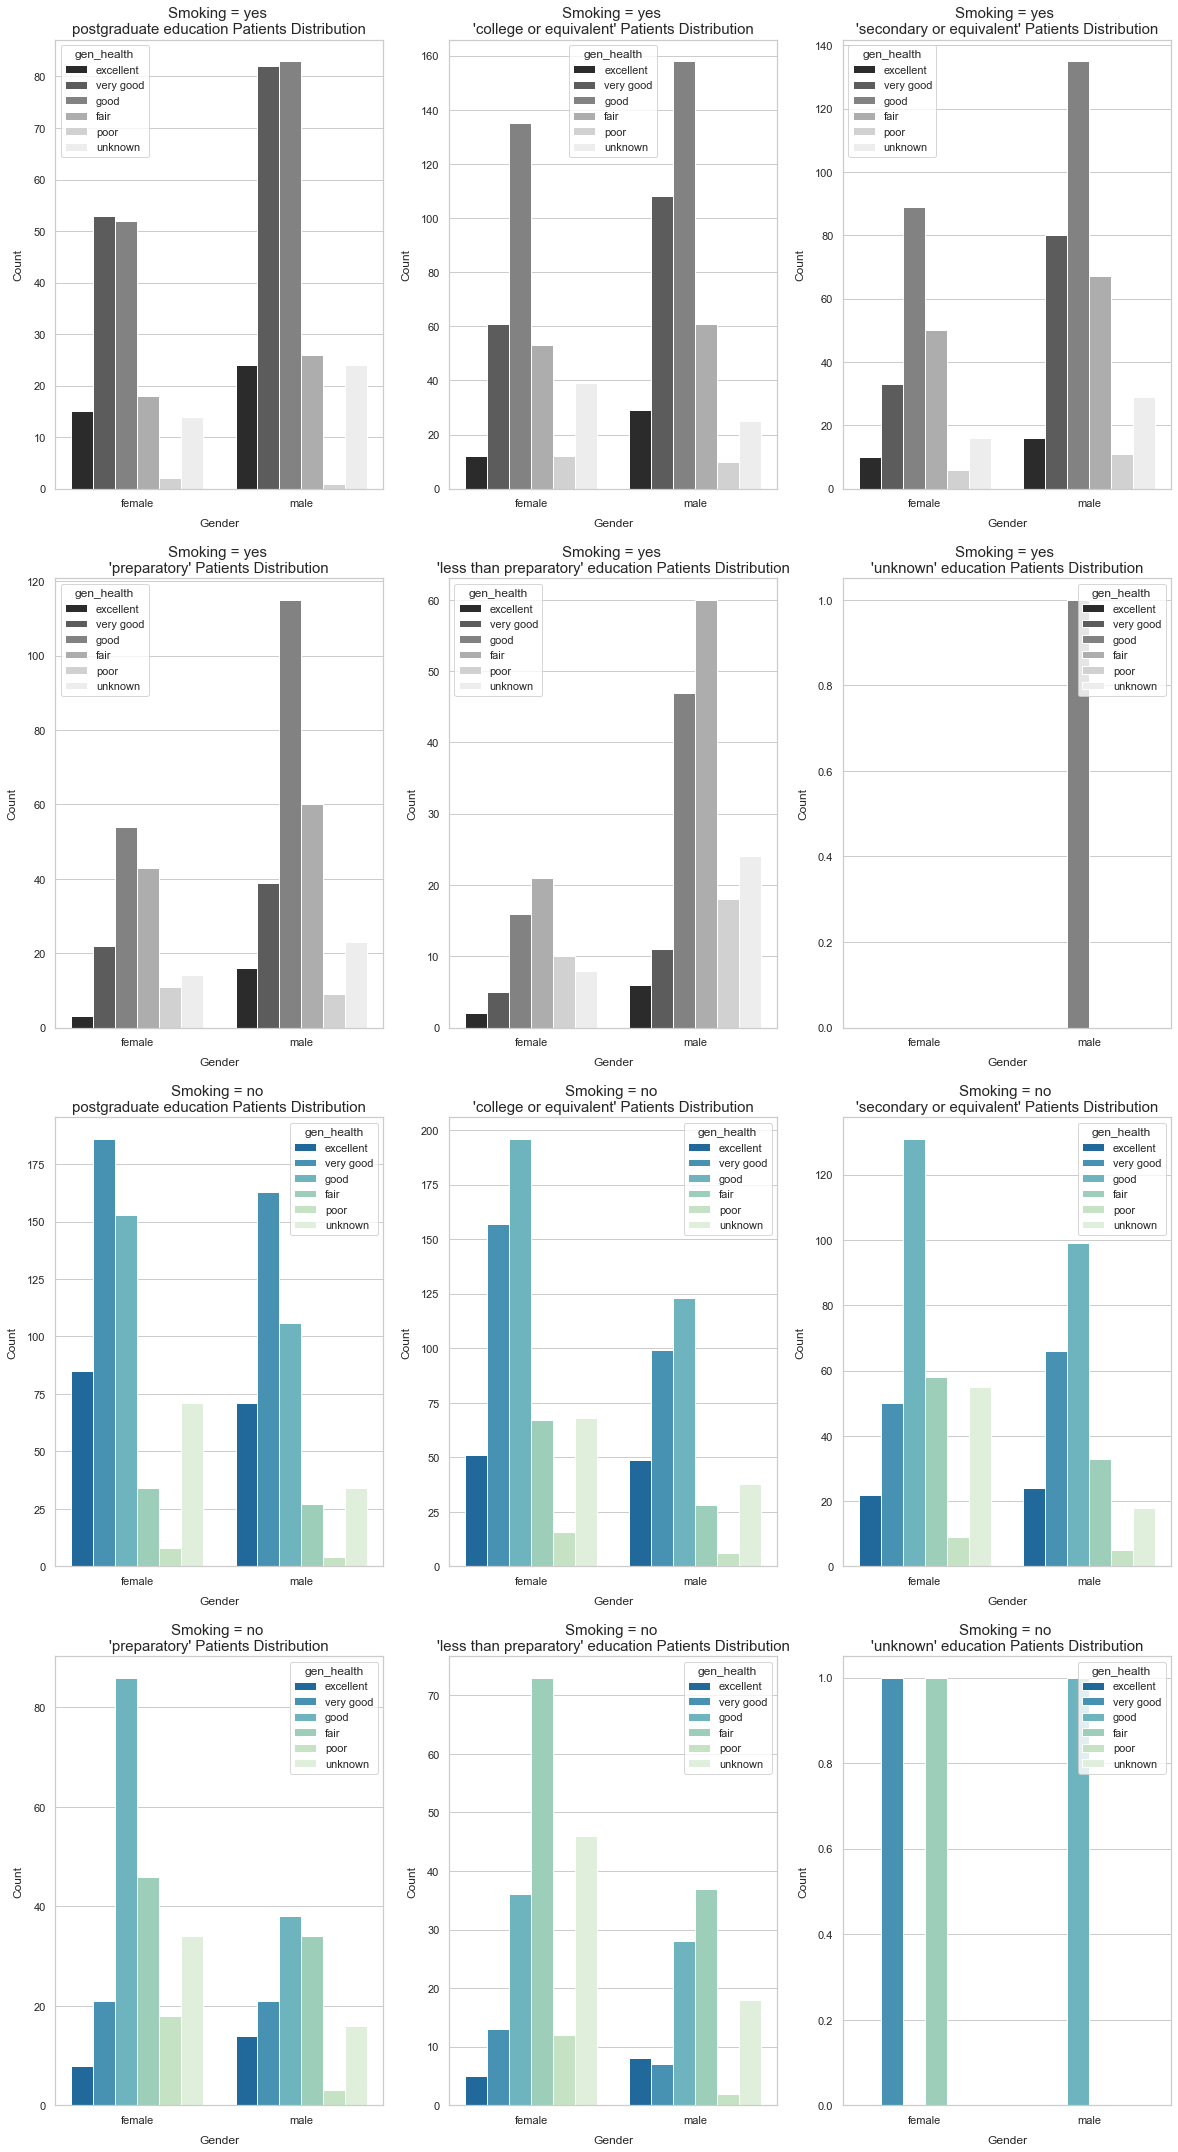

In [111]:
plt.figure(figsize=[20, 38])

sb.set_theme(style='whitegrid')

plt.subplot(4,3,1)
sb.countplot(data=df[(df.education == 'postgraduate education') & (df.smoker == 'yes')], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='Greys_r')

plt.xticks(rotation=0)
plt.title("Smoking = yes \npostgraduate education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,2)
sb.countplot(data=df[(df.education == 'college or equivalent') & (df.smoker == 'yes')], x='gender',
            order=['female', 'male'], hue='gen_health', palette='Greys_r')

plt.xticks(rotation=0)
plt.title("Smoking = yes \n'college or equivalent' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,3)
sb.countplot(data=df[(df.education == 'secondary or equivalent') & (df.smoker == 'yes')], x='gender',
            order=['female', 'male'], hue='gen_health', palette='Greys_r')

plt.xticks(rotation=0)
plt.title("Smoking = yes \n'secondary or equivalent' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,4)
sb.countplot(data=df[(df.education == 'preparatory') & (df.smoker == 'yes')], x='gender',
            order=['female', 'male'], hue='gen_health', palette='Greys_r')

plt.xticks(rotation=0)
plt.title("Smoking = yes \n'preparatory' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,5)
sb.countplot(data=df[(df.education == 'less than preparatory') & (df.smoker == 'yes')], x='gender',
            order=['female', 'male'], hue='gen_health', palette='Greys_r')

plt.xticks(rotation=0)
plt.title("Smoking = yes \n'less than preparatory' education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,6)
sb.countplot(data=df[(df.education == 'unknown') & (df.smoker == 'yes')], x='gender',
            order=['female', 'male'], hue='gen_health', palette='Greys_r')

plt.xticks(rotation=0)
plt.title("Smoking = yes \n'unknown' education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);
                     

#--------------------------------------------------------------------------------------
                     #----------------------------------------
                     

sb.set_theme(style='whitegrid')

plt.subplot(4,3,7)
sb.countplot(data=df[(df.education == 'postgraduate education') & (df.smoker == 'no')], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='GnBu_r')

plt.xticks(rotation=0)
plt.title("Smoking = no \npostgraduate education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,8)
sb.countplot(data=df[(df.education == 'college or equivalent') & (df.smoker == 'no')], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='GnBu_r')

plt.xticks(rotation=0)
plt.title("Smoking = no \n'college or equivalent' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,9)
sb.countplot(data=df[(df.education == 'secondary or equivalent') & (df.smoker == 'no')], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='GnBu_r')

plt.xticks(rotation=0)
plt.title("Smoking = no \n'secondary or equivalent' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,10)
sb.countplot(data=df[(df.education == 'preparatory') & (df.smoker == 'no')], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='GnBu_r')

plt.xticks(rotation=0)
plt.title("Smoking = no \n'preparatory' Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,11)
sb.countplot(data=df[(df.education == 'less than preparatory') & (df.smoker == 'no')], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='GnBu_r')

plt.xticks(rotation=0)
plt.title("Smoking = no \n'less than preparatory' education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

# --------------------------------------------------
plt.subplot(4,3,12)
sb.countplot(data=df[(df.education == 'unknown') & (df.smoker == 'no')], x='gender', order=['female', 'male'], 
             hue='gen_health', palette='GnBu_r')

plt.xticks(rotation=0)
plt.title("Smoking = no \n'unknown' education Patients Distribution", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Gender', labelpad=10);

### (3 cat, 1 num) : ( gender, education, gen_health, age)

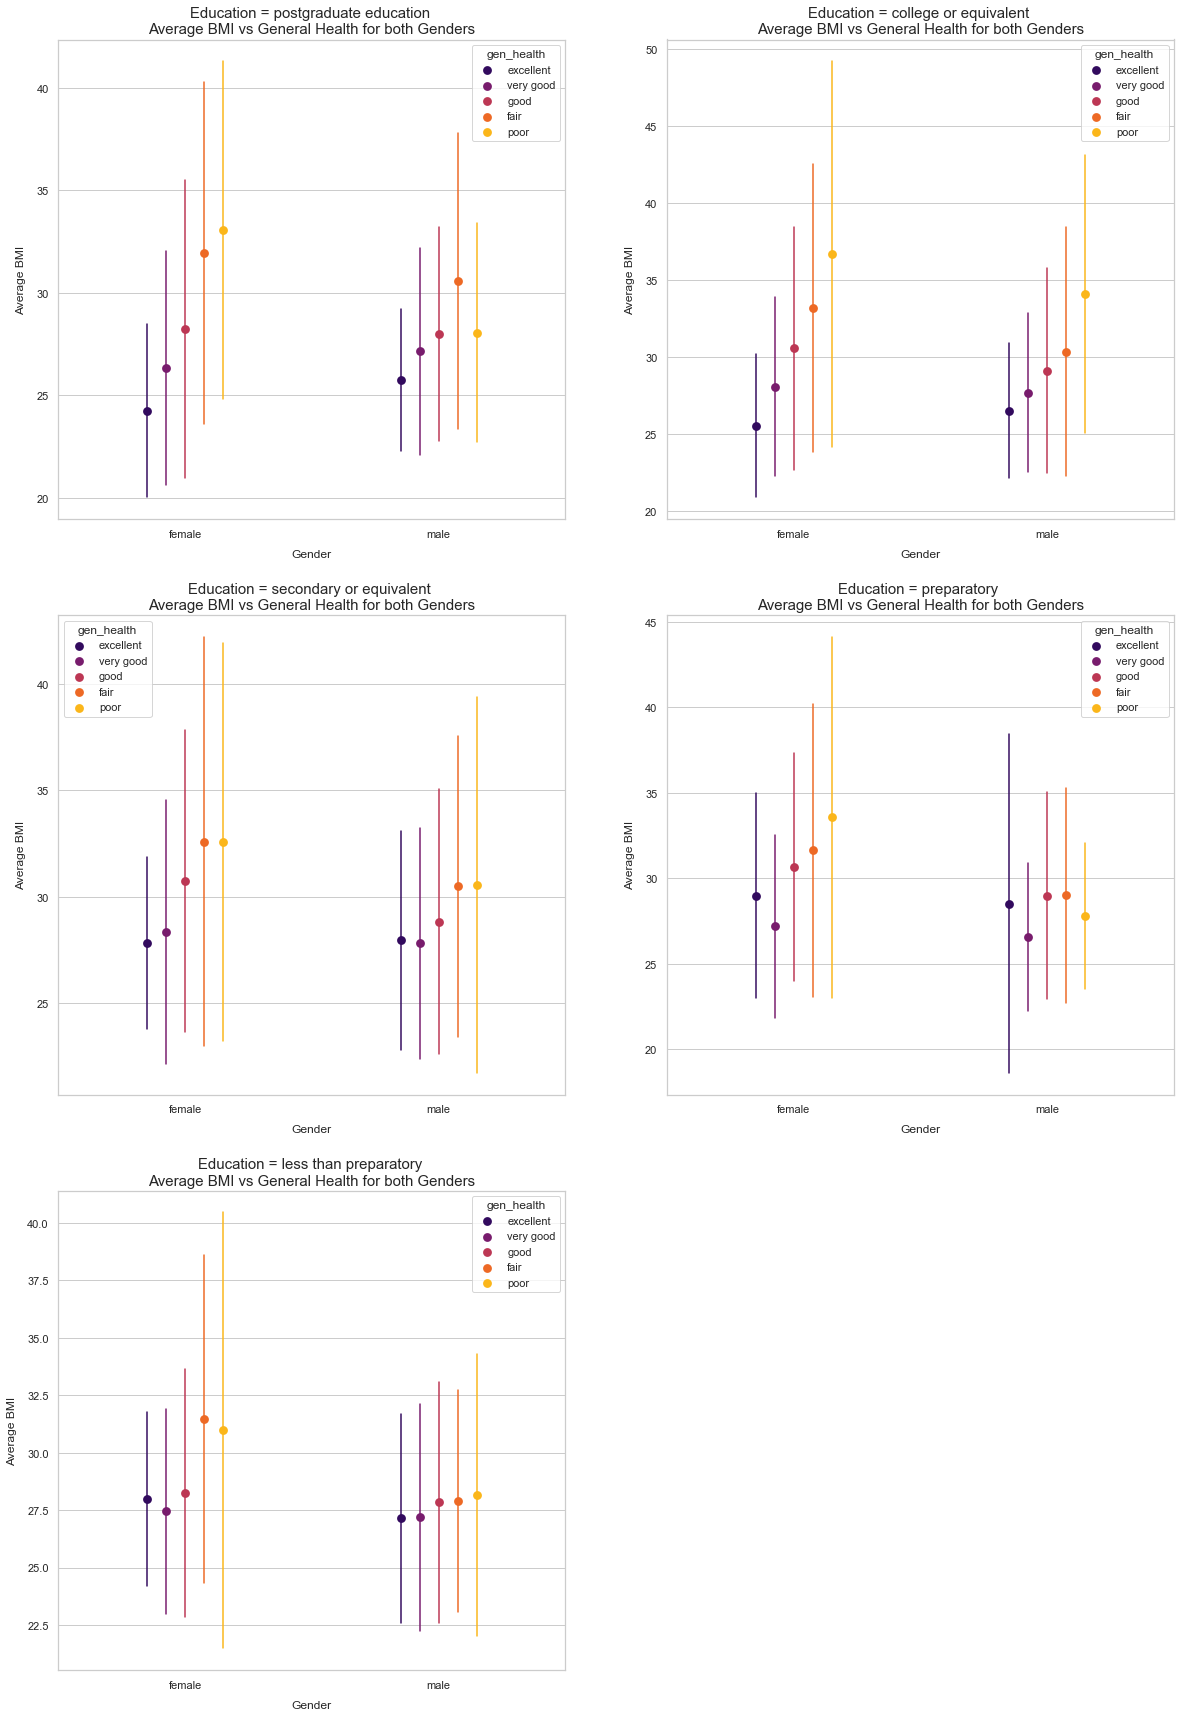

In [112]:
gender_order = ['female', 'male']
edu_order = ['postgraduate education', 'college or equivalent', 'secondary or equivalent',
             'preparatory', 'less than preparatory']

health_order = ['excellent', 'very good', 'good', 'fair', 'poor']

plt.figure(figsize=[20,30])

plt.subplot(3,2,1)
sb.pointplot(data=df[df.education == 'postgraduate education'], x='gender', y='bmi', hue='gen_health', linestyles="", ci='sd', 
             dodge=.3, order=gender_order, hue_order=health_order, palette='inferno', errwidth=1.5);

plt.xticks(rotation=0)
plt.title("Education = postgraduate education \nAverage BMI vs General Health for both Genders", fontsize= 15)
plt.ylabel('Average BMI', labelpad=10)
plt.xlabel('Gender', labelpad=10);

#---------------------------------------------------------------------------
plt.subplot(3,2,2)
sb.pointplot(data=df[df.education == 'college or equivalent'], x='gender', y='bmi', hue='gen_health', linestyles="", ci='sd', 
             dodge=.3, order=gender_order, hue_order=health_order, palette='inferno', errwidth=1.5);

plt.xticks(rotation=0)
plt.title("Education = college or equivalent \nAverage BMI vs General Health for both Genders", fontsize= 15)
plt.ylabel('Average BMI', labelpad=10)
plt.xlabel('Gender', labelpad=10);

#--------------------------------------------------------------------------------
plt.subplot(3,2,3)
sb.pointplot(data=df[df.education == 'secondary or equivalent'], x='gender', y='bmi', hue='gen_health', linestyles="", ci='sd', 
             dodge=.3, order=gender_order, hue_order=health_order, palette='inferno', errwidth=1.5);

plt.xticks(rotation=0)
plt.title("Education = secondary or equivalent \nAverage BMI vs General Health for both Genders", fontsize= 15)
plt.ylabel('Average BMI', labelpad=10)
plt.xlabel('Gender', labelpad=10);

#-----------------------------------------------------------------------------------
plt.subplot(3,2,4)
sb.pointplot(data=df[df.education == 'preparatory'], x='gender', y='bmi', hue='gen_health', linestyles="", ci='sd', 
             dodge=.3, order=gender_order, hue_order=health_order, palette='inferno', errwidth=1.5);

plt.xticks(rotation=0)
plt.title("Education = preparatory \nAverage BMI vs General Health for both Genders", fontsize= 15)
plt.ylabel('Average BMI', labelpad=10)
plt.xlabel('Gender', labelpad=10);
#---------------------------------------------------------------------------------
plt.subplot(3,2,5)
sb.pointplot(data=df[df.education == 'less than preparatory'], x='gender', y='bmi', hue='gen_health', linestyles="", ci='sd', 
             dodge=.3, order=gender_order, hue_order=health_order, palette='inferno', errwidth=1.5);

plt.xticks(rotation=0)
plt.title("Education = less than preparatory \nAverage BMI vs General Health for both Genders", fontsize= 15)
plt.ylabel('Average BMI', labelpad=10)
plt.xlabel('Gender', labelpad=10);

### (2 cat, 2 num) : ( gender, gen_health, age, weight)

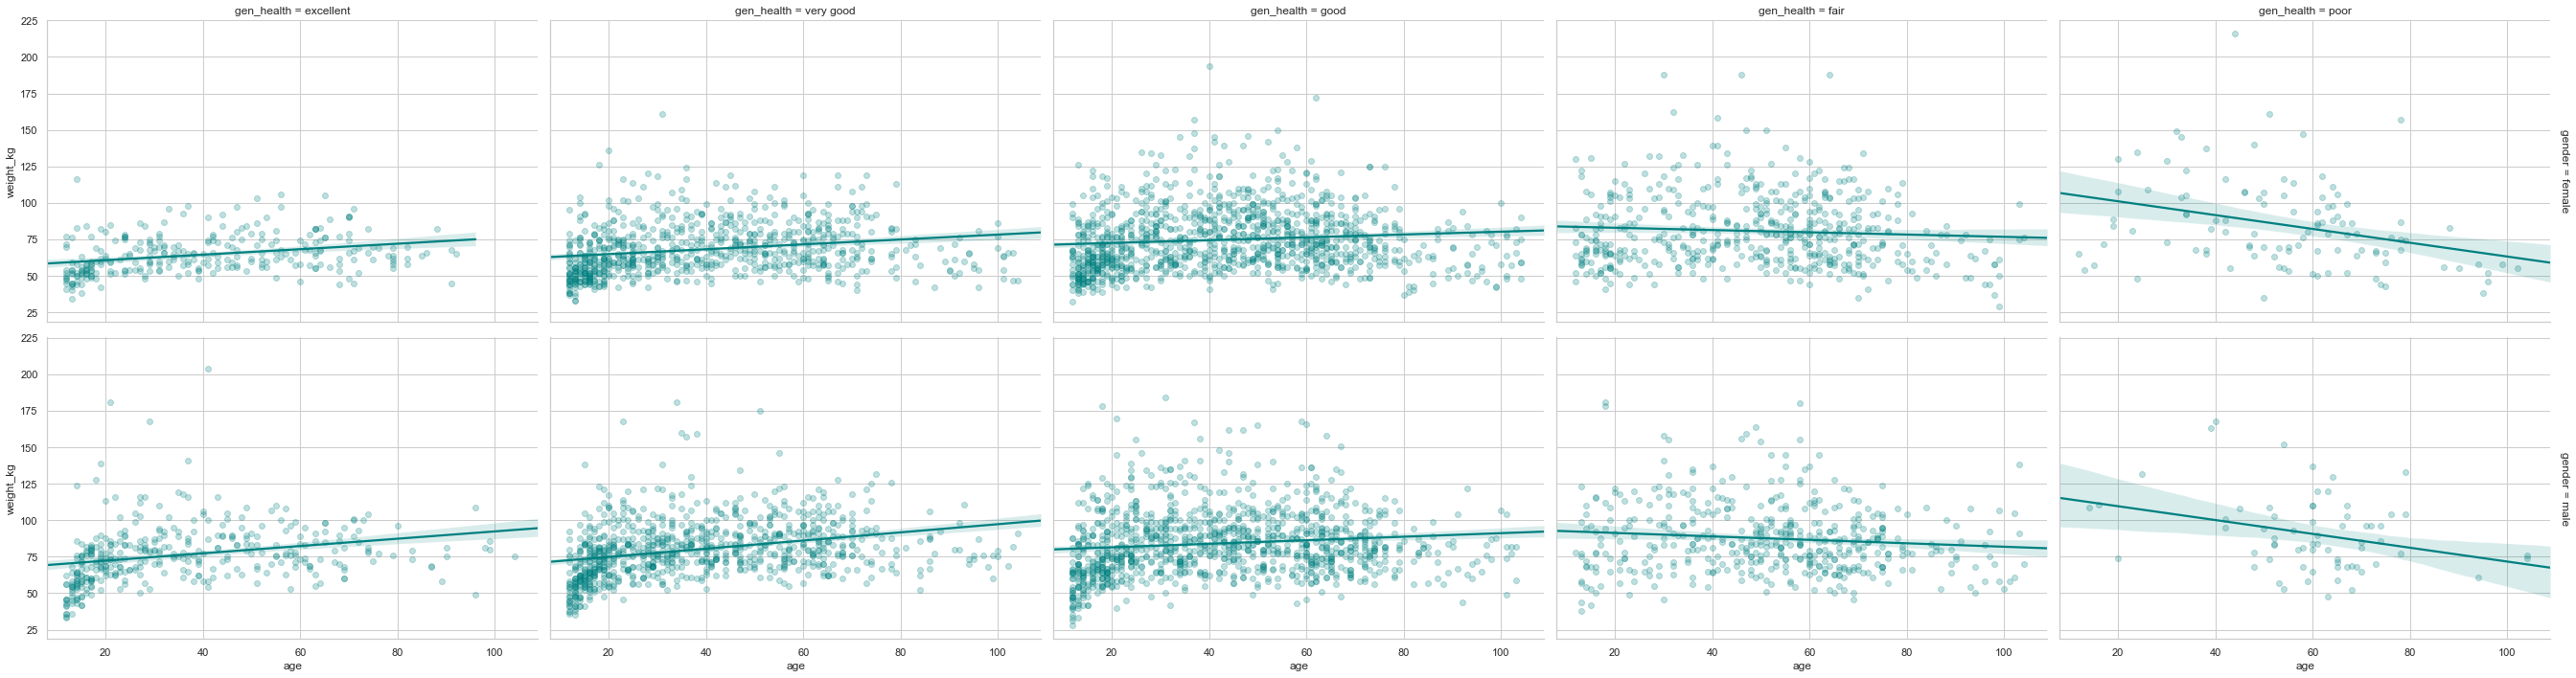

In [113]:
g = sb.FacetGrid(data=df, col='gen_health', col_order=health_order, 
                 row='gender', row_order=gender_order, margin_titles=True, height=5, aspect=1.5)
g.map(sb.regplot, 'age', 'weight_kg', scatter_kws={'alpha':.25}, truncate=False, color='teal');

### (1 cat, 3 num) : ( gen_health, bmi, waist, )

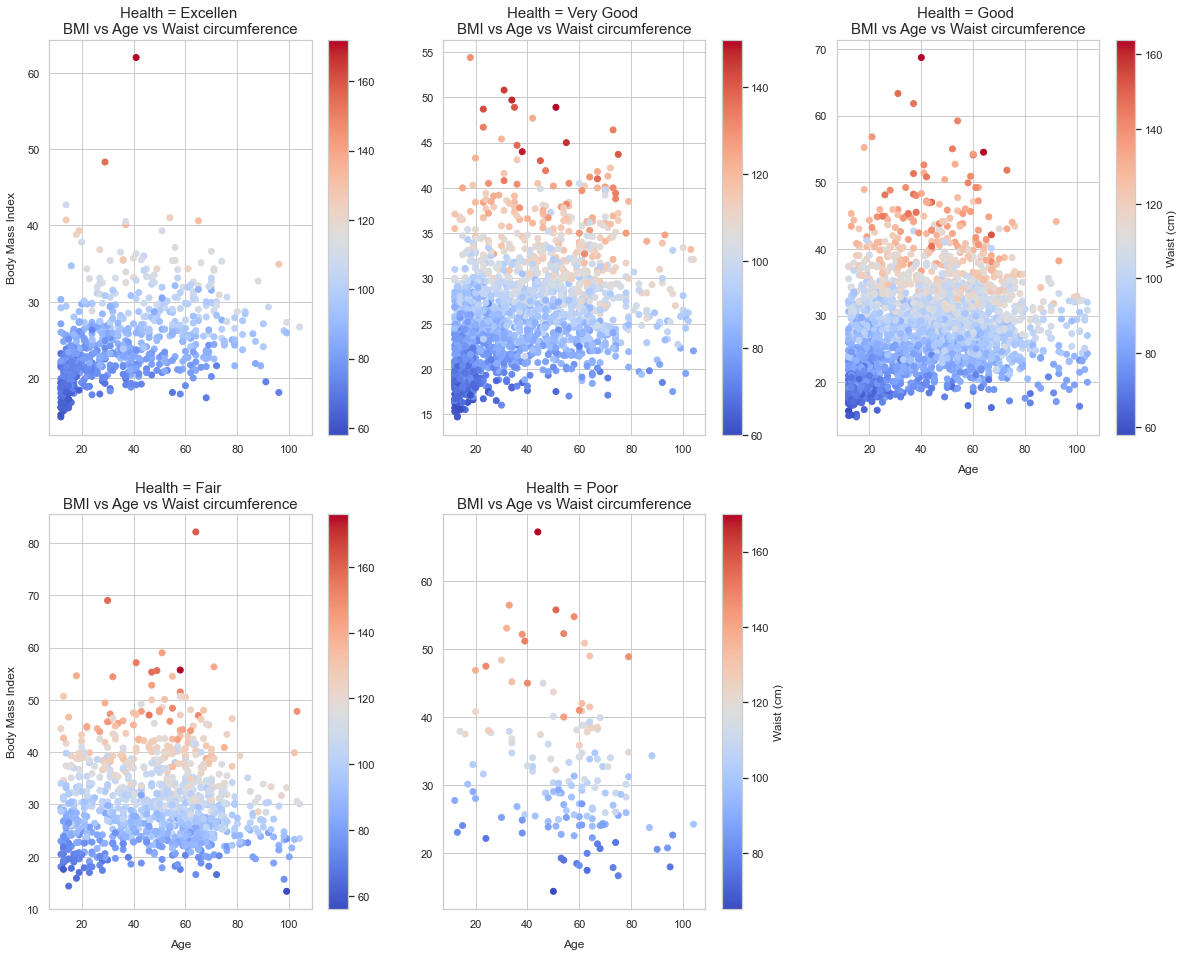

In [114]:
plt.figure(figsize=[20, 16])

plt.subplot(2,3,1)
plt.scatter(data=df[df.gen_health == health_order[0]], x='age', y='bmi', c='waist_cm', cmap='coolwarm', alpha=1)
plt.colorbar(label='');

plt.title('Health = Excellen \nBMI vs Age vs Waist circumference', fontsize= 15)
plt.ylabel('Body Mass Index', labelpad=10)
plt.xlabel('', labelpad=10);
#---------------------------------------------------------------------------
plt.subplot(2,3,2)
plt.scatter(data=df[df.gen_health == health_order[1]], x='age', y='bmi', c='waist_cm', cmap='coolwarm', alpha=1)
plt.colorbar(label='');

plt.title('Health = Very Good \nBMI vs Age vs Waist circumference', fontsize= 15)
plt.ylabel('', labelpad=10)
plt.xlabel('', labelpad=10);

#---------------------------------------------------------------------------
plt.subplot(2,3,3)
plt.scatter(data=df[df.gen_health == health_order[2]], x='age', y='bmi', c='waist_cm', cmap='coolwarm', alpha=1)
plt.colorbar(label='Waist (cm)');

plt.title('Health = Good \nBMI vs Age vs Waist circumference', fontsize= 15)
plt.ylabel('', labelpad=10)
plt.xlabel('Age', labelpad=10);

#---------------------------------------------------------------------------
plt.subplot(2,3,4)
plt.scatter(data=df[df.gen_health == health_order[3]], x='age', y='bmi', c='waist_cm', cmap='coolwarm', alpha=1)
plt.colorbar(label='');

plt.title('Health = Fair \nBMI vs Age vs Waist circumference', fontsize= 15)
plt.ylabel('Body Mass Index', labelpad=10)
plt.xlabel('Age', labelpad=10);

#---------------------------------------------------------------------------
plt.subplot(2,3,5)
plt.scatter(data=df[df.gen_health == health_order[4]], x='age', y='bmi', c='waist_cm', cmap='coolwarm', alpha=1)
plt.colorbar(label='Waist (cm)');

plt.title('Health = Poor \nBMI vs Age vs Waist circumference', fontsize= 15)
plt.ylabel('', labelpad=10)
plt.xlabel('Age', labelpad=10);

# 67 visuals